# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Team name on Driven Data: ***Dee_Mel_Nick***

### 1. Melba Raj Sathyaraj Mahila - [Melba.Raj.Sathyaraj.Mahila@vub.be](mailto:student1@ulb.ac.be) - Student ID 0574202
### 2. Deepika Chandrababu - [Deepika.Chandrababu@vub.be](mailto:student2@ulb.ac.be) - Student ID 0572230
### 3. Nicolas Boucher - [Nicolas.J.Boucher@ulb.be](mailto:student3@ulb.ac.be) - Student ID 000467388


### Video presentation: https://youtu.be/RzjeTtv1Ir8

### Link to github repository: https://github.com/27melba/statisticalFoundationsML_project2021.git

## **Pump it Up: Data Mining the Water Table**


# Introduction

The "Pump it Up: Data Mining the Water Table" is the dataset hosted by DrivenData where the goal is to predict the operating condition of a waterpoint for each record in the dataset ( [https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/ ] ). We were provided with a training dataset of 41 variables with 59400 rows and a test dataset of 40 variables with 14850 rows.

  Our team managed to build 5 models and crossvalidate them to see which model can predict the operating condition of the waterpoint more accurately. In order to make the data organized before creating the models, we have done data preprocessing, missing value imputation and feature engineering. Since this was a medium dataset with 40 features where most of them were categorical variables, we performed some feature selection techniques in order to build the model efficiently. We built 4 models from the libraries specified in section 5 and 1 model apart from the libraries specified in section 5.


In [1]:
library(ISwR)
install.packages('naniar')
library(naniar)
install.packages('dplyr')
library(dplyr)

library(readr)
library(caret)
library(mltools)
library(data.table)
library(dplyr)
library(randomForest)
library(e1071)
install.packages('ROSE')
library(ROSE) 

install.packages("UBL")
library(UBL)

install.packages("superml")
library(superml)

install.packages("VIM")
library(VIM)

install.packages('dummies')
install.packages("ggcorrplot")
install.packages('cleandata')
install.packages('lazy')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('mlbench')
install.packages('Boruta')
install.packages('nnet')
install.packages('devtools')
install.packages("kernlab")
install.packages("RSNNS")

install.packages('xgboost')
install.packages('Matrix')
install.packages('MatrixModels')
install.packages('data.table')

install.packages("party")

library(dummies)
library(ggcorrplot)
library(cleandata)
library(lazy)
library(rpart)
library(rpart.plot)
library(mlbench)
library(Boruta)
library('nnet')
library('devtools')
library('kernlab')
library('RSNNS')

library(xgboost)
library(Matrix)
library(MatrixModels)
library(data.table)

library("party")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'e1071'


The following object is masked from 'package:mltools':

    skewness


Loaded ROSE 0.0-3


Loading required package: MBA

Loading required package: gstat

Loading required package: automap

Loading required package: sp

Loading required package: R6

Loading required package: colorspace

Loading required package: grid

VIM is ready

# Step 1

## Dataset metadata description

source: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

| feature name | meaning |
|:--------------|:---------|
| amount_tsh | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate |
| wpt_name | Name of the waterpoint if there is one |
| num_private | No description |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga | Geographic location |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses |
| management | How the waterpoint is managed |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs |
| water_quality | The quality of the water |
| quality_group | The quality of the water |
| quantity | The quantity of water |
| quantity_group | The quantity of water |
| source | The source of the water |
| source_type | The source of the water |
| source_class | The source of the water |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

## Dataset import and overview

In this section, we read the provided data and merge some of them together for further convenience. We also visualized some of the variables here to see how are they distributed across the dataset.

In [2]:
# Reading 'training values.csv' dataset
train_val<-read.csv("dataset/training values.csv",na.strings=c("","NA"))
# Reading 'training labels.csv' data
train_label<-read.csv("dataset/training labels.csv")

# Reading 'test values.csv' dataset
test_val<-read.csv("dataset/test values.csv",na.strings=c("","NA"))

options(repr.matrix.max.cols=150, repr.matrix.max.rows=10)
head(train_val)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NA,GeoData Consultants Ltd,Other,NA,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NA,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NA,NA,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


In [3]:
# https://stackoverflow.com/questions/22196078/count-unique-values-for-every-column
# To get distinct counts in each column
cat("Number of distinct values in each column")
train_distinct<-apply(train_val, 2, function(x) length(unique(x)))
train_distinct                      

sapply(train_val,class)
sapply(train_label,class)

Number of distinct values in each column

id            amount_tsh         date_recorded 
                59400                    98                   356 
               funder            gps_height             installer 
                 1898                  2428                  2146 
            longitude              latitude              wpt_name 
                55366                 57517                 37400 
          num_private                 basin            subvillage 
                   65                     9                 19288 
               region           region_code         district_code 
                   21                    27                    20 
                  lga                  ward            population 
                  125                  2092                  1049 
       public_meeting           recorded_by     scheme_management 
                    3                     1                    13 
          scheme_name                permit     construction_year 
                 2697                     3                    55 
      extraction_type extraction_type_group extraction_type_class 
                   18                    13                     7 
           management      management_group               payment 
                   12                     5                     7 
         payment_type         water_quality         quality_group 
                    7                     8                     6 
             quantity        quantity_group                source 
                    5                     5                    10 
          source_type          source_class       waterpoint_type 
                    7                     3                     7 
waterpoint_type_group 
                    6

id            amount_tsh         date_recorded 
            "integer"             "numeric"           "character" 
               funder            gps_height             installer 
          "character"             "integer"           "character" 
            longitude              latitude              wpt_name 
            "numeric"             "numeric"           "character" 
          num_private                 basin            subvillage 
            "integer"           "character"           "character" 
               region           region_code         district_code 
          "character"             "integer"             "integer" 
                  lga                  ward            population 
          "character"           "character"             "integer" 
       public_meeting           recorded_by     scheme_management 
          "character"           "character"           "character" 
          scheme_name                permit     construction_year 
          "character"           "character"             "integer" 
      extraction_type extraction_type_group extraction_type_class 
          "character"           "character"           "character" 
           management      management_group               payment 
          "character"           "character"           "character" 
         payment_type         water_quality         quality_group 
          "character"           "character"           "character" 
             quantity        quantity_group                source 
          "character"           "character"           "character" 
          source_type          source_class       waterpoint_type 
          "character"           "character"           "character" 
waterpoint_type_group 
          "character"

id status_group 
   "integer"  "character"

Right away, we can make a few observations.

Most variables are categorical.

The number of rows in the training dataset amounts to 59400, but there are a few categorical variables containing a high number of distinct values: these categorical variables will have to be addressed. Directly using one-hot encoding on them would ensure a dimensionality explosion.

| feature name | #nb distinct values |
|:--------------|:---------|
|wpt_name | 37400 |
|subvillage | 19288 |
|scheme_name | 2697 |
|installer | 2146 |
|ward | 2092 |
|funder | 1898 |


On the other hand, the column "recorded_by" only contains one distinct value. 

| feature name | #nb distinct values |
|:--------------|:---------|
|recorded_by | 1 |

The same observations can be made on the test dataset:

In [4]:
test_distinct<-apply(test_val, 2, function(x) length(unique(x)))
test_distinct

id            amount_tsh         date_recorded 
                14850                    68                   331 
               funder            gps_height             installer 
                  981                  2157                  1092 
            longitude              latitude              wpt_name 
                14251                 14390                 10840 
          num_private                 basin            subvillage 
                   36                     9                  8444 
               region           region_code         district_code 
                   21                    26                    20 
                  lga                  ward            population 
                  125                  1959                   637 
       public_meeting           recorded_by     scheme_management 
                    3                     1                    12 
          scheme_name                permit     construction_year 
                 1790                     3                    55 
      extraction_type extraction_type_group extraction_type_class 
                   17                    13                     7 
           management      management_group               payment 
                   12                     5                     7 
         payment_type         water_quality         quality_group 
                    7                     8                     6 
             quantity        quantity_group                source 
                    5                     5                    10 
          source_type          source_class       waterpoint_type 
                    7                     3                     7 
waterpoint_type_group 
                    6

In [5]:
# Print the number of missing values in each column
cat("Number of missing values in each column")

options(repr.matrix.max.cols=30, repr.matrix.max.rows=15)
missing_vars_summary = miss_var_summary(train_val)
missing_vars_summary

Number of missing values in each column

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
scheme_name,28166,47.4175084
scheme_management,3877,6.5269360
installer,3655,6.1531987
funder,3635,6.1195286
public_meeting,3334,5.6127946
permit,3056,5.1447811
subvillage,371,0.6245791
id,0,0.0000000
...,...,...


In [ ]:
barplot(height = missing_vars_summary$pct_miss, names = missing_vars_summary$variable, col= "blue",cex.names = 0.6,cex.axis = 0.8,las=2,
xlab= "Variables names", ylab ="Percentage of missing values")

In [6]:
# Merge the training data with the labels

train_label_val<-merge(train_val,train_label,by = "id")
options(repr.matrix.max.cols=30, repr.matrix.max.rows=10)
head(train_label_val)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,...,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,...,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,...,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,...,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,...,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,...,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,...,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


We plotted a bar chart to see how the classes in "status_group" is divided across the training set.The plotted bar chart is shown below. We found that more than half of the dataset belong to the "functional" class(approx. 54.3%) and approx. 38.42% belongs to "non functional" class. Also we see that the distribution of "functional needs repair" class is much lowered when compared to the other 2 classes (approx. 7.27%). Since the dataset seems imbalanced, we planned to do upsampling later with the best model. However, due to time constraints, we only did upsampling with one of our models, the decision tree.


             functional functional needs repair          non functional 
             0.54308081              0.07267677              0.38424242 

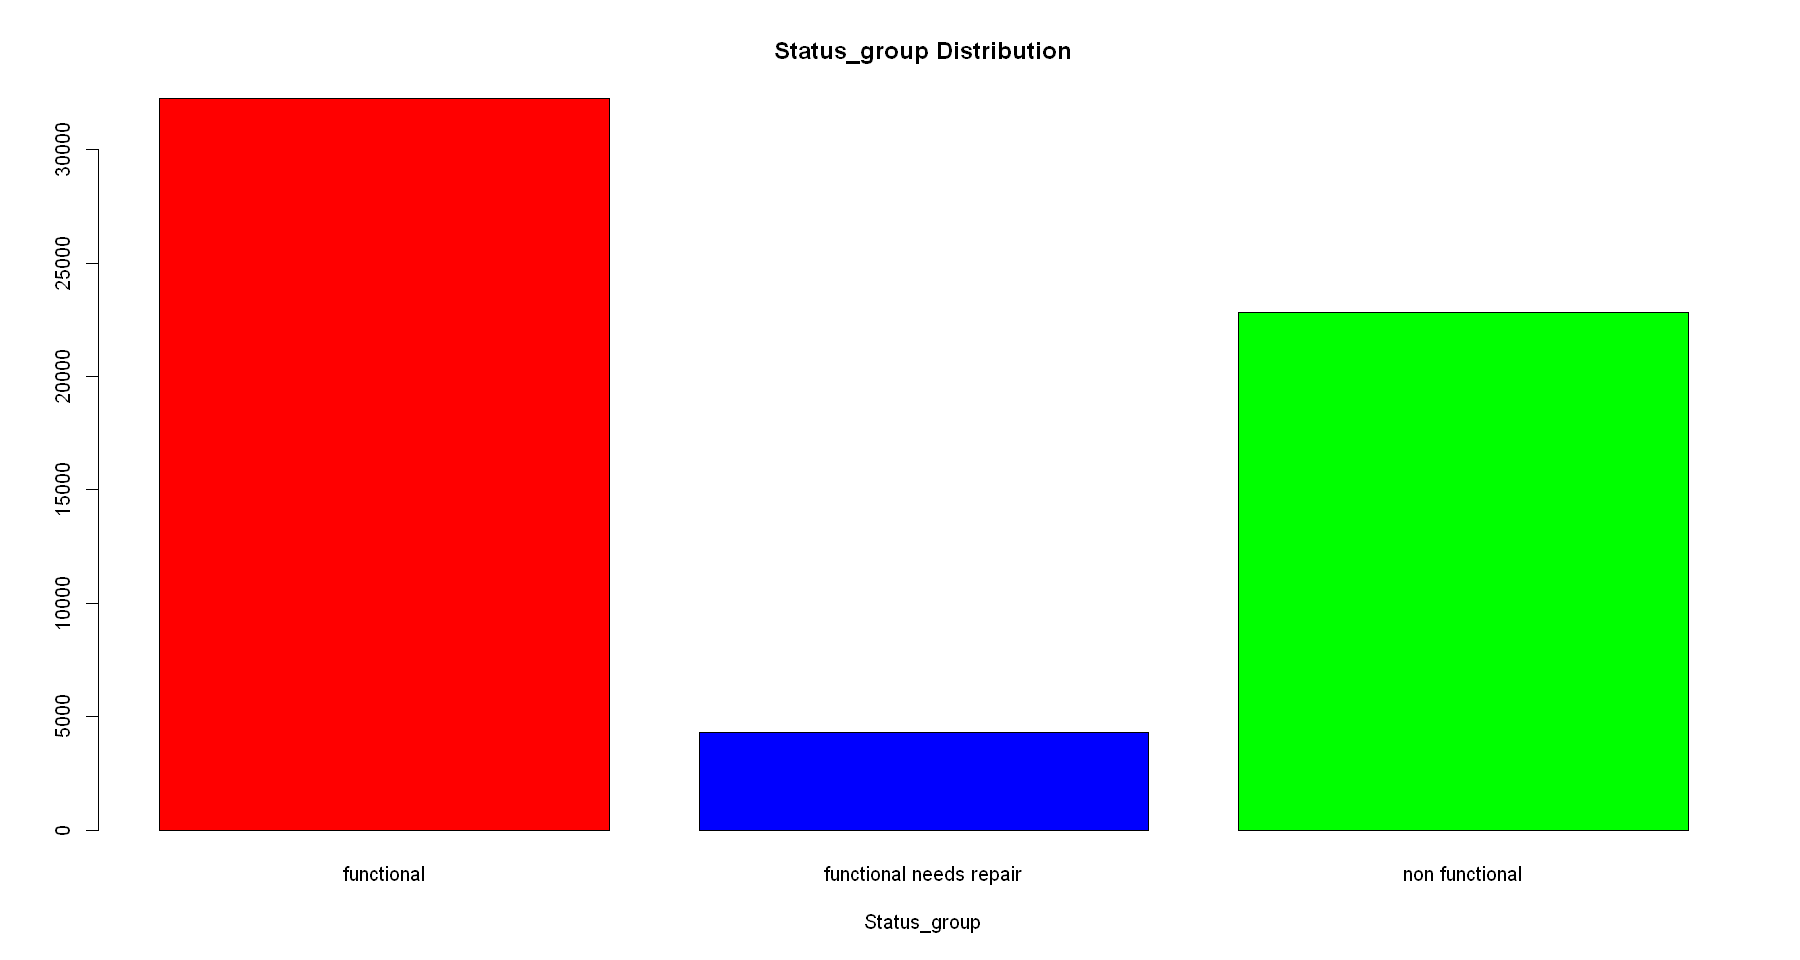

In [8]:
# Distribution of Status_group in the training dataset

counts <- table(train_label_val$status_group)
barplot(counts, main="Status_group Distribution",
   xlab="Status_group",col=c("red","blue","green"))

prop.table(table(train_label_val$status_group))

## Preprocessing the data

### Missing values imputation

When we analyzed the data, we came to know that the data are missing only in categorical variables. So, we did some research to see how can we deal with the missing categorical variables. We saw a couple to techniques for this. We handled the missing values using two techniques:

1.   "permit" and "public_meeting" were the two columns which contained logical variables "True" and "False". So we replaced the missing values in these columns with the majority number variable in the respective column.
2.   For other columns with missing values, we found that they contain many distinct values and didn't find any dominant ones. Also there were too many missing values. So we created a new "unknown" class for the missing categorical variables in each resplective columns and replaced them with the "unknown" class.
The respective columns are: "scheme_name", "scheme_management", "installer", "funder", "public_meeting", "permit", "subvillage".


*   We added an extra column "recorded_year" to both the training and test datasets to check whether the year extracted from the "date_recorded" column would have any interesting correlation with the status of the waterpoints in Tanzania.
*   The type of "date_recorded" was originally "factor". We converted it into numeric to build the model conveniently later. We considered the parameter "origin" with an old date so that the "date_recorded" can be coerced to a Date object.

Reference:
[https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)

In [9]:
# handling of missing values: replacement with fixed value

train_label_val$scheme_name[is.na(train_label_val$scheme_name)]<-"other scheme"
train_label_val$scheme_management[is.na(train_label_val$scheme_management)]<-"unknown management"
train_label_val$installer[is.na(train_label_val$installer)]<-"unknown installer"
train_label_val$funder[is.na (train_label_val$funder)]<-"unknown funder"
train_label_val$public_meeting[is.na (train_label_val$public_meeting)]<-"True"
train_label_val$permit[is.na (train_label_val$permit)]<-"True"
train_label_val$subvillage[is.na (train_label_val$subvillage)]<-"other subvillage"

test_val$scheme_name[is.na(test_val$scheme_name)]<-"other scheme"
test_val$scheme_management[is.na(test_val$scheme_management)]<-"unknown management"
test_val$installer[is.na(test_val$installer)]<-"unknown installer"
test_val$funder[is.na (test_val$funder)]<-"unknown funder"
test_val$public_meeting[is.na (test_val$public_meeting)]<-"True"
test_val$permit[is.na (test_val$permit)]<-"True"
test_val$subvillage[is.na (test_val$subvillage)]<-"other subvillage"

### Reshaping the recorded year into new features

In [10]:
# Exctracting the year from the dates

recorded_year_train<-as.numeric(substring(train_label_val$date_recorded,1,4))
recorded_year_test<-as.numeric(substring(test_val$date_recorded,1,4))
head(recorded_year_train)

[1] 2012 2011 2011 2013 2011 2011

In [11]:
# Transforming dates into a double format

train_label_val$date_recorded<-as.numeric(as.Date(train_label_val$date_recorded, origin = "1970-01-01"))
test_val$date_recorded<-as.numeric(as.Date(test_val$date_recorded, origin = "1970-01-01"))
head(train_label_val$date_recorded)

[1] 15657 15038 15060 15859 15055 15031

In [12]:
# Adding the extracted dates as an additional column

train_label_val_merged<-cbind(train_label_val,recorded_year=recorded_year_train)
test_val_merged<-cbind(test_val,recorded_year=recorded_year_test)

In [13]:
# Check whether there are still any missing values in training and testing dataset

miss_var_summary(train_label_val_merged)
miss_var_summary(test_val_merged)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
id,0,0
amount_tsh,0,0
date_recorded,0,0
funder,0,0
gps_height,0,0
...,...,...
source_class,0,0
waterpoint_type,0,0
waterpoint_type_group,0,0


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
id,0,0
amount_tsh,0,0
date_recorded,0,0
funder,0,0
gps_height,0,0
...,...,...
source_type,0,0
source_class,0,0
waterpoint_type,0,0


### Saving the current dataset as csv

In [14]:
write.csv(train_label_val_merged,"dataset/train_label_val_merged.csv")
write.csv(test_val_merged,"dataset/test_val_merged.csv")

## Feature engineering

In this section, we did the following:


*   We didn't take into account the columns with large number of distinct values:

'funder','installer','wpt_name','subvillage',
'scheme_name','ward','payment', 'quantity','waterpoint_type_group','X','lga'

*   We didn't take into account of "recorded_by" since it containts only one distinct value
*   We found that some of the columns are near duplicates of some others. We only took one column of each redundant group into account:


1.   "payment" and "payment_type" contain different string values, but with a direct mapping between them. 
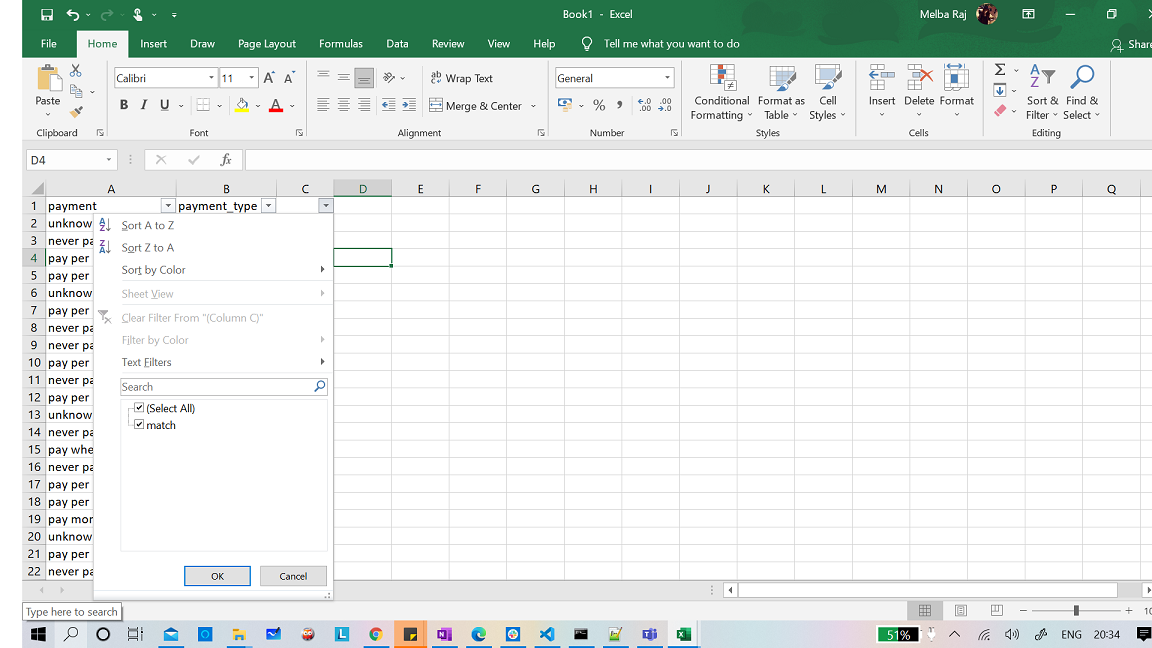


2.   "quanitity" and "quantity_group" contain the exact same values.
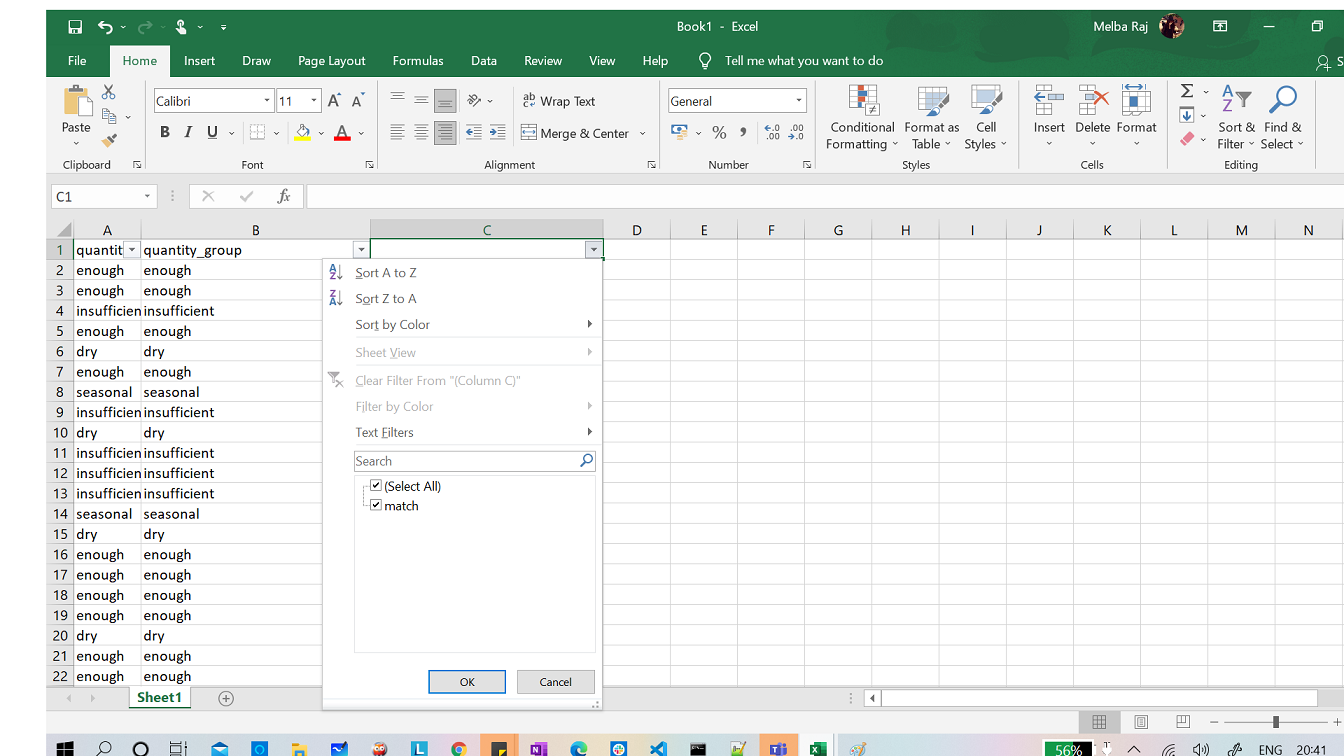


3.   "waterpoint_type" and "waterpoint_type_group" different string values, direct mapping again.
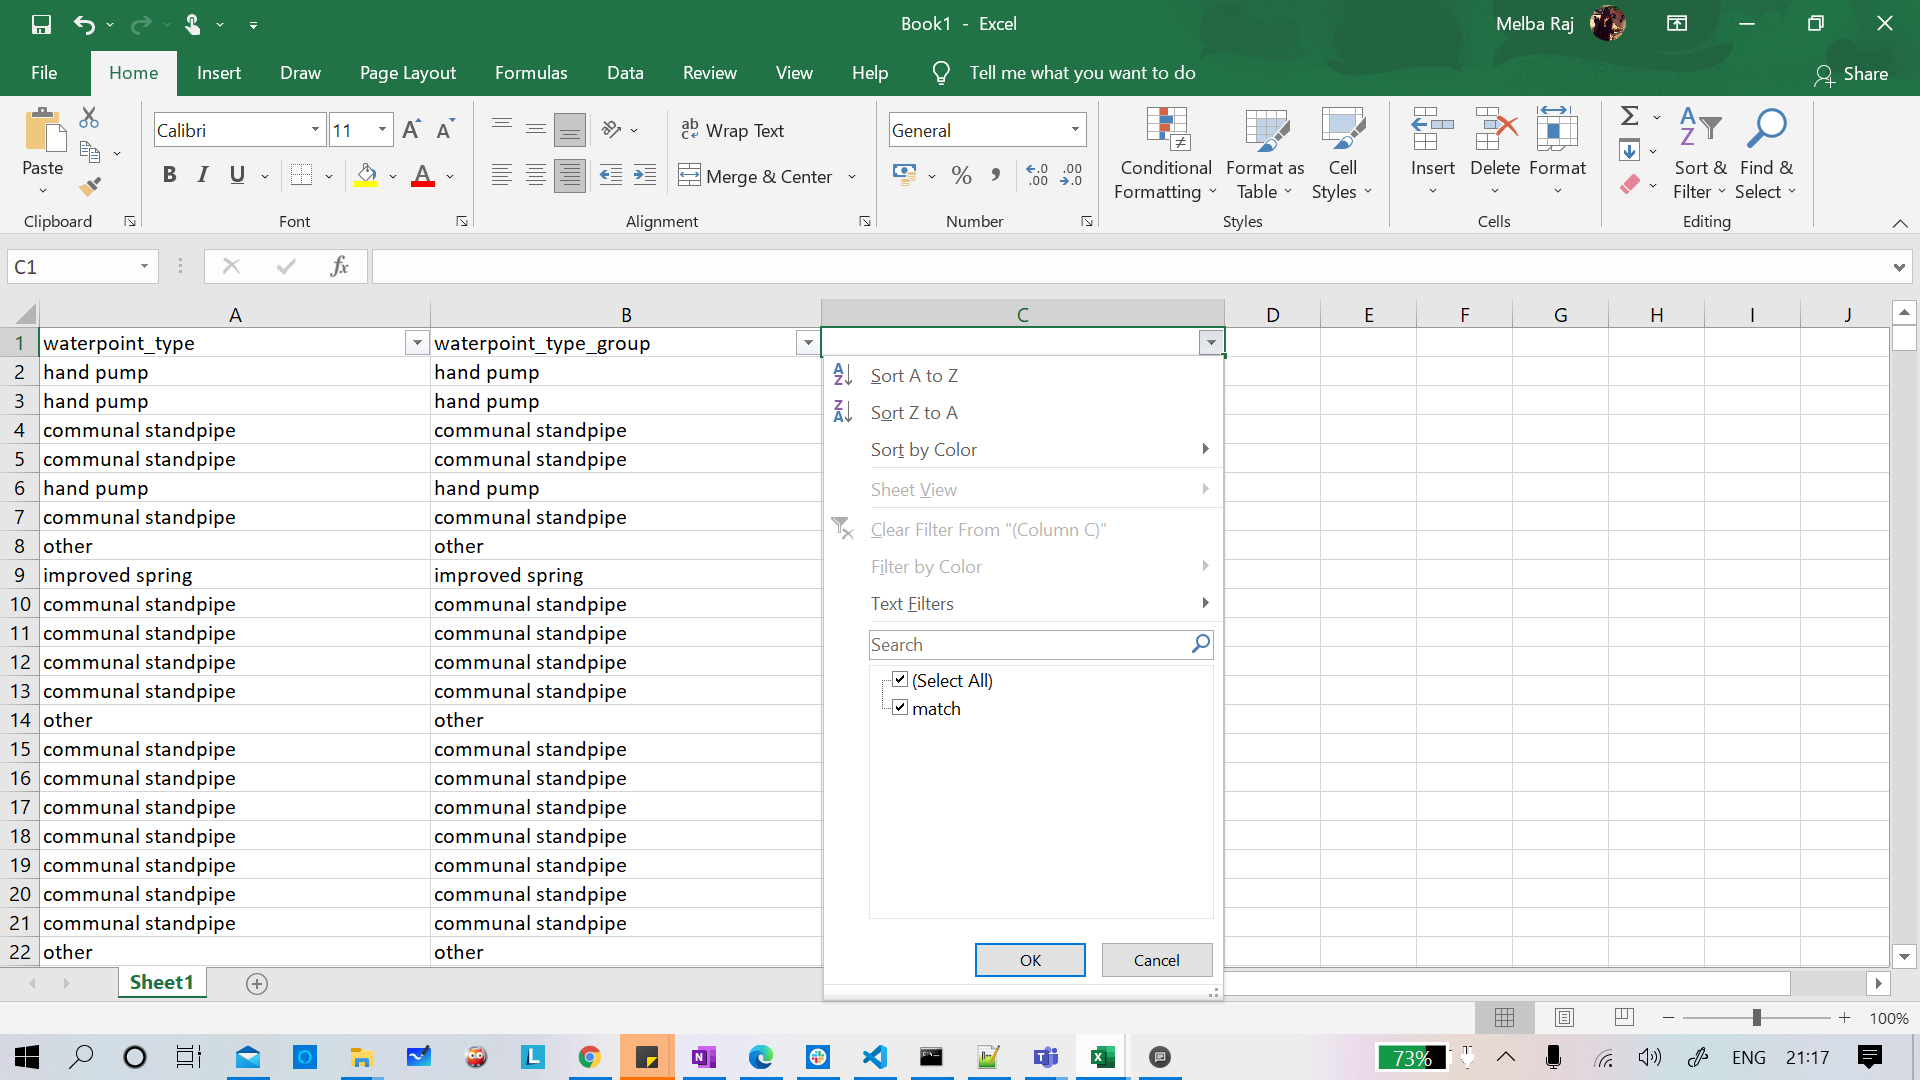


*   We label encoded 3 variables:


1.   "permit" --> since it contained "True" and "False"
2.   "public_meeting" --> since it contained "True" and "False"
3.   "status_group" --> It's the target variable


*   We preferred one hot encoding for all other categorical variables:

'basin','region','scheme_management','extraction_type','extraction_type_group'',extraction_type_class',
'management','management_group','payment_type','water_quality','quality_group','quantity_group','source',
'source_type','source_class','waterpoint_type'

### Reading the csv, converting all strings to factors

In [16]:
train_label_val_merged<-read.csv("dataset/train_label_val_merged.csv",stringsAsFactors = T)
dim(train_label_val_merged)
test_val_merged<-read.csv("dataset/test_val_merged.csv",stringsAsFactors = T)
dim(test_val_merged)

[1] 59400    43

[1] 14850    42

### Handling the features with large amounts of distinct values

In [17]:
length(unique(train_label_val$scheme_name))
length(unique(train_label_val$wpt_name))
length(unique(train_label_val$installer))
length(unique(train_label_val$funder))
length(unique(train_label_val$subvillage))
length(unique(train_label_val$lga))
length(unique(train_label_val$ward))

[1] 2697

[1] 37400

[1] 2146

[1] 1898

[1] 19288

[1] 125

[1] 2092

In [18]:
#eliminating irrelevant columns (target encoding)
# notkeep_col<-c("wpt_name","subvillage","recorded_by","payment","quantity","waterpoint_type_group","X")

#eliminating irrelevant columns (no target encoding)
notkeep_col<-c("wpt_name","subvillage","recorded_by","payment","quantity","waterpoint_type_group","scheme_name","installer","funder","lga","ward","X")


clean_train_label_val<-train_label_val_merged[,
                              setdiff(colnames(
                                train_label_val_merged),notkeep_col)]

colnames(clean_train_label_val)
dim(clean_train_label_val)

clean_test_val<-test_val_merged[,
                              setdiff(colnames(
                                test_val_merged),notkeep_col)]

[1] "id"                    "amount_tsh"            "date_recorded"        
 [4] "gps_height"            "longitude"             "latitude"             
 [7] "num_private"           "basin"                 "region"               
[10] "region_code"           "district_code"         "population"           
[13] "public_meeting"        "scheme_management"     "permit"               
[16] "construction_year"     "extraction_type"       "extraction_type_group"
[19] "extraction_type_class" "management"            "management_group"     
[22] "payment_type"          "water_quality"         "quality_group"        
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "status_group"         
[31] "recorded_year"

[1] 59400    31

### Label encoding

In [19]:
# Label encoding "public_meeting" and "permit" into logical since they contain "TRUE" and "FALSE" in training set

clean_train_label_val$public_meeting<-as.integer(as.logical(clean_train_label_val$public_meeting))
clean_train_label_val$permit<-as.integer(as.logical(clean_train_label_val$permit))

clean_test_val$public_meeting<-as.integer(as.logical(clean_test_val$public_meeting))
clean_test_val$permit<-as.integer(as.logical(clean_test_val$permit))

In [20]:
# Fetch the correct index of the target variable
status_group_idx<-grep("status_group", colnames(clean_train_label_val))

# Label encoding the "status_group" in training set
# 'functional'->1
# 'functional needs repair'->2, 
# 'non functional'->3, 
clean_train_label_val[,status_group_idx]<- encode_ordinal(clean_train_label_val[,status_group_idx,drop = FALSE], 
                                            order = c('functional', 'functional needs repair', 'non functional'))
typeof(clean_train_label_val$status_group)
head(clean_train_label_val$status_group)

typeof(clean_train_label_val$status_group)
head(clean_train_label_val$status_group)

status_group<-as.numeric(clean_train_label_val[,status_group_idx])

# typeof(status_group)
clean_train_label_val$status_group = status_group

                  status_group  
 functional             :32259  
 functional needs repair: 4317  
 non functional         :22824  
coded 1 cols 3 levels 
 status_group
 1:32259     
 2: 4317     
 3:22824     


[1] "integer"

[1] 3 1 1 1 3 1
Levels: 1 2 3

[1] "integer"

[1] 3 1 1 1 3 1
Levels: 1 2 3

In [21]:
options(repr.matrix.max.cols=15, repr.matrix.max.rows=5)
clean_train_label_val

id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,status_group,recorded_year
<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
0,0,15657,0,33.12583,-5.118154,0,Lake Tanganyika,...,enough,shallow well,shallow well,groundwater,hand pump,3,2012
1,0,15038,1978,34.77072,-9.395642,0,Rufiji,...,enough,shallow well,shallow well,groundwater,hand pump,1,2011
2,0,15060,0,36.11506,-6.279268,0,Wami / Ruvu,...,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,1,2011
...,...,...,...,...,...,...,...,,...,...,...,...,...,...,...
74246,50,15040,1428,35.63048,-7.710549,0,Rufiji,...,dry,spring,spring,groundwater,communal standpipe,3,2011
74247,50,15752,965,35.43300,-10.639270,0,Ruvuma / Southern Coast,...,dry,river,river/lake,surface,communal standpipe,3,2013


### One hot encoding
We preferred one hot encoding for the remaining categorical variables. Because, we came to know from wpo sessions and other materials that label encoding codes the numerical values according to alphabetical order. Rather than giving numerical values as per the alphabetical order, we thought one hot encoding will be a greater approach to maintain the categorical nature of the values.

Reference:

* WPO session 5
* [https://www.youtube.com/watch?v=ZTeGJpOSrQo](https://www.youtube.com/watch?v=ZTeGJpOSrQo)

In [22]:
# https://community.rstudio.com/t/how-to-get-a-full-set-of-dummy-variables/21682/2

# One hot encoding the remaining factor columns present in the training dataset

data_onehot = 
  model.matrix( ~ ., data=clean_train_label_val, contrasts.arg = 
    lapply(data.frame(clean_train_label_val[,sapply(data.frame(clean_train_label_val), is.factor)]),
                                             contrasts, contrasts = FALSE))

dim(data_onehot)
head(data_onehot)

[1] 59400   167

,(Intercept),id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,...,waterpoint_typecommunal standpipe multiple,waterpoint_typedam,waterpoint_typehand pump,waterpoint_typeimproved spring,waterpoint_typeother,status_group,recorded_year
1,1,0,0,15657,0,33.12583,-5.118154,0,...,0,0,1,0,0,3,2012
2,1,1,0,15038,1978,34.77072,-9.395642,0,...,0,0,1,0,0,1,2011
3,1,2,0,15060,0,36.11506,-6.279268,0,...,1,0,0,0,0,1,2011
...,...,...,...,...,...,...,...,...,,...,...,...,...,...,...,...
5,1,4,0,15055,0,36.16489,-6.099289,0,...,0,0,1,0,0,3,2011
6,1,5,50,15031,28,39.28612,-6.972403,0,...,1,0,0,0,0,1,2011


In [23]:
# One hot encoding the remaining factor columns present in the test dataset

test_data_onehot = 
  model.matrix( ~ ., data=clean_test_val, contrasts.arg = 
    lapply(data.frame(clean_test_val[,sapply(data.frame(clean_test_val), is.factor)]),
                                             contrasts, contrasts = FALSE))

dim(test_data_onehot)
head(test_data_onehot)

[1] 14850   164

,(Intercept),id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,...,waterpoint_typecommunal standpipe,waterpoint_typecommunal standpipe multiple,waterpoint_typedam,waterpoint_typehand pump,waterpoint_typeimproved spring,waterpoint_typeother,recorded_year
1,1,50785,0,15740,1996,35.29080,-4.059696,0,...,0,0,0,0,0,1,2013
2,1,51630,0,15740,1569,36.65671,-3.309214,0,...,1,0,0,0,0,0,2013
3,1,17168,0,15737,1567,34.76786,-5.004344,0,...,0,0,0,0,0,1,2013
...,...,...,...,...,...,...,...,...,,...,...,...,...,...,...,...
5,1,49871,500,15791,1260,35.00612,-10.95041,0,...,1,0,0,0,0,0,2013
6,1,52449,0,15768,1685,36.68528,-3.30242,0,...,1,0,0,0,0,0,2013


In [24]:
# Eliminating the "Intercept" column in training and test datasets

data_preprocessed<-cbind(data_onehot[,-1])
dim(data_preprocessed)
test_data_preprocessed<-cbind(test_data_onehot[,-1])
dim(test_data_preprocessed)

[1] 59400   166

[1] 14850   163

In [25]:
# preparing input and target variables for feature selection
merge_num_status<-data_preprocessed

X<-as.data.frame(merge_num_status[,setdiff(colnames(merge_num_status),"status_group")])  ### input variables
Y<-merge_num_status[,"status_group"] ### target variable

# replacing the symbols: (" ", "-", "/") in training set to "_" for a consistent column name in training set
colnames(X) <- gsub(colnames(X),pattern = " ", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "-", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "/", replacement = "_")

Nr<-nrow(X) #N
Nc<-ncol(X) #n

dim(X)

[1] 59400   165

In [26]:
# replacing the symbols: (" ", "-", "/") in training set to "_" for a consistent column name in test set

colnames(test_data_preprocessed) <- gsub(colnames(test_data_preprocessed),pattern = " ", replacement = "_")
colnames(test_data_preprocessed) <- gsub(colnames(test_data_preprocessed),pattern = "-", replacement = "_")
colnames(test_data_preprocessed) <- gsub(colnames(test_data_preprocessed),pattern = "/", replacement = "_")
dim(test_data_preprocessed)

[1] 14850   163

In [27]:
# Detecting which are the column names in test set that are different from training input dataset(X).
# Two of the columns are missing and one column has column name mismatch

dim(test_data_preprocessed)
setdiff(colnames(X),colnames(test_data_preprocessed))

[1] 14850   163

[1] "scheme_managementNone"                   
[2] "extraction_typeother___mkulima_shinyanga"

In [28]:
# adding the missed columns to test dataset with default value "zero" to avoid future conflict
test_data_preprocessed1 <- cbind(test_data_preprocessed,scheme_managementNone=0,extraction_typeother___mkulima_shinyanga=0)

## Feature selection

In this section, we performed some feature selection techniques:

1. Correlation
2. mRMR

### 1. Correlation
We chose Correlation as one of our feature selection techniques.

We referred this code from the wpo session of this course. We use 10 folds to calculate the average cross validation error. We got a mean error of 0.0614. Features are ranked according to the correlation calculated. For this project, we took the first 50 ranked features from correlation to train the further models.

In [29]:
# correlation linear model
cv_fold<-10

cv_size<-floor(Nr/cv_fold)

cv_error<-matrix(0,nrow = Nc,ncol = cv_fold)

for(i in cv_fold){
  
  # Test set
  test_set<-(((i-1)*cv_size+1):(i*cv_size))
  X_ts<-X[test_set,] ### input variables of test set
  Y_ts<-Y[test_set]  ### target variable of test set
  
  # Train set
  train_set<-setdiff((1:Nr),test_set)
  X_tr<-X[train_set,]
  Y_tr<-Y[train_set]
  
  # correlation of all input variables to the target var
  correlation<-abs(cor(X_tr,Y_tr))
  
  #rank the calcolated correlation
  rank_correlation<-sort(correlation,decreasing = TRUE,index.return=T)$ix
  
  for(features in 1:Nc){
    
    dataStruct<-cbind(X_tr[,rank_correlation[1:features],drop = F],status_group=Y_tr)
    
    options(warn=-1)
    lin_corr_Model<-lm(status_group~.,dataStruct)
    
    Y_hat_ts<-predict(lin_corr_Model,X_ts[,rank_correlation[1:features],drop=F])
    
    cv_error[features,i]<-mean((Y_hat_ts-Y_ts)^2)
    
  }
  
}
#     rank_correlation
# mean((Y_hat_ts-Y_ts)^2)
print(paste("#Features: ",c(1:Nc)," ; CV error=",round(apply(cv_error,1,mean),digits=4),
            " ; std dev=",round(apply(cv_error,1,sd),digits=4)))

rank_correlation
colnames(X)[rank_correlation]
options(warn=1)

  [1] "#Features:  1  ; CV error= 0.0764  ; std dev= 0.2416"  
  [2] "#Features:  2  ; CV error= 0.0704  ; std dev= 0.2226"  
  [3] "#Features:  3  ; CV error= 0.0698  ; std dev= 0.2208"  
  [4] "#Features:  4  ; CV error= 0.0698  ; std dev= 0.2208"  
  [5] "#Features:  5  ; CV error= 0.0698  ; std dev= 0.2208"  
  [6] "#Features:  6  ; CV error= 0.0691  ; std dev= 0.2184"  
  [7] "#Features:  7  ; CV error= 0.0681  ; std dev= 0.2153"  
  [8] "#Features:  8  ; CV error= 0.0679  ; std dev= 0.2148"  
  [9] "#Features:  9  ; CV error= 0.0678  ; std dev= 0.2145"  
 [10] "#Features:  10  ; CV error= 0.0678  ; std dev= 0.2145" 
 [11] "#Features:  11  ; CV error= 0.0673  ; std dev= 0.2127" 
 [12] "#Features:  12  ; CV error= 0.0673  ; std dev= 0.2127" 
 [13] "#Features:  13  ; CV error= 0.0673  ; std dev= 0.2127" 
 [14] "#Features:  14  ; CV error= 0.0673  ; std dev= 0.2127" 
 [15] "#Features:  15  ; CV error= 0.0673  ; std dev= 0.2127" 
 [16] "#Features:  16  ; CV error= 0.0673  ; std dev= 0

[1] 133 164  66  81  91 134 114 159 126 132  20  60  76  88 125 129 102 113
 [19]   4 160 112 146 154  38 117  65  80  89  15 118 104 162  29  24 140  50
 [37]  52  90  64  79 145 153 137  53  99  17  14  41 105 141  39   9 148 123
 [55] 131  32  36   2  10 144 106 163  26  13  56 115 143 151  49 138 149  54
 [73]  57  75  23  95  46 101 110  30  12  55  47  97  19 107  11 156 155   3
 [91]   8  16  35  34 120  25 136 111  63  98 109  45 152 128  61  77  68 165
[109]  40  69  84  92 116  59  82  85  93 103   6  42  74  87  94 158  27  83
[127]  62  78  28  96 135 122 130 121  72  86  33  67  44  31 124  22  21  70
[145]  48 161 147 119 127   5  58   7  51  43  71 100  18 150 157   1 139  73
[163] 108  37 142

[1] "quantity_groupdry"                         
  [2] "waterpoint_typeother"                      
  [3] "extraction_typeother"                      
  [4] "extraction_type_groupother"                
  [5] "extraction_type_classother"                
  [6] "quantity_groupenough"                      
  [7] "payment_typenever_pay"                     
  [8] "waterpoint_typecommunal_standpipe"         
  [9] "water_qualityunknown"                      
 [10] "quality_groupunknown"                      
 [11] "regionIringa"                              
 [12] "extraction_typegravity"                    
 [13] "extraction_type_groupgravity"              
 [14] "extraction_type_classgravity"              
 [15] "water_qualitysoft"                         
 [16] "quality_groupgood"                         
 [17] "managementvwc"                             
 [18] "payment_typemonthly"                       
 [19] "gps_height"                                
 [20] "waterpoint_typecommunal_standpipe_multiple"
 [21] "payment_typeannually"                      
 [22] "sourcespring"                              
 [23] "source_typespring"                         
 [24] "region_code"                               
 [25] "payment_typeper_bucket"                    
 [26] "extraction_typenira_tanira"                
 [27] "extraction_type_groupnira_tanira"          
 [28] "extraction_type_classhandpump"             
 [29] "basinRuvuma___Southern_Coast"              
 [30] "payment_typeunknown"                       
 [31] "managementwater_board"                     
 [32] "waterpoint_typehand_pump"                  
 [33] "regionMtwara"                              
 [34] "regionLindi"                               
 [35] "sourcelake"                                
 [36] "scheme_managementVWC"                      
 [37] "scheme_managementWater_Board"              
 [38] "extraction_type_classmotorpump"            
 [39] "extraction_typemono"                       
 [40] "extraction_type_groupmono"                 
 [41] "sourceshallow_well"                        
 [42] "source_typeshallow_well"                   
 [43] "quantity_groupunknown"                     
 [44] "scheme_managementWUA"                      
 [45] "managementprivate_operator"                
 [46] "regionArusha"                              
 [47] "basinRufiji"                               
 [48] "public_meeting"                            
 [49] "managementwua"                             
 [50] "sourcemachine_dbh"                         
 [51] "district_code"                             
 [52] "basinLake_Nyasa"                           
 [53] "source_typeborehole"                       
 [54] "water_qualitysalty"                        
 [55] "quality_groupsalty"                        
 [56] "regionRukwa"                               
 [57] "regionTabora"                              
 [58] "amount_tsh"                                
 [59] "basinLake_Rukwa"                           
 [60] "sourceriver"                               
 [61] "managementwug"                             
 [62] "waterpoint_typeimproved_spring"            
 [63] "regionMara"                                
 [64] "basinPangani"                              
 [65] "construction_year"                         
 [66] "payment_typeon_failure"                    
 [67] "sourcerainwater_harvesting"                
 [68] "source_typerainwater_harvesting"           
 [69] "scheme_managementunknown_management"       
 [70] "sourcedam"                                 
 [71] "source_typedam"                            
 [72] "scheme_managementWUG"                      
 [73] "extraction_typeafridev"                    
 [74] "extraction_type_groupafridev"              
 [75] "regionKilimanjaro"                         
 [76] "managementcompany"                         
 [77] "scheme_managementPrivate_operator"         
 [78] "managementunknown"                         
 [79] "management_groupu

In [30]:
# Taking the first 50 features
corr_col_num<-c(rank_correlation[1:50])

# merging them with the "id" column
correlation_fs<-cbind(X[,1], X[,(corr_col_num)])

# change the first colname to "id"
colnames(correlation_fs)[1] <- "id"

dim(correlation_fs)

# writing the features selected to file(training dataset)
write.csv(as.data.frame(correlation_fs),"dataset/corr_feature_selected.csv")

[1] 59400    51

In [31]:
# Feature selecting from test dataset

# take the intersection of column names to get features selected in test dataset
common_corr_cols <- intersect(colnames(correlation_fs), colnames(test_data_preprocessed1))

# saving those columns to test_correlation_fs
test_correlation_fs<- test_data_preprocessed1[,(common_corr_cols)]

dim(test_correlation_fs)

# writing the features selected to file(test dataset)
write.csv(as.data.frame(test_correlation_fs),"dataset/test_corr_feature_selected.csv")

mean(cv_error)
sd(cv_error)

[1] 14850    51

[1] 0.06142336

[1] 0.1846032

### 2. mRMR - Minimum Redundancy Maximum Relevance (33.24 min)

We referred this code from the wpo session of this course. We use 10 folds to calculate the average cross validation error. We got a mean error of 0.6108. Features are ranked according to the correlation calculated and redundancy of variables. For this project, we took the first 50 ranked features from mRMR to train the further models.

In [32]:
# mRMR Linear model
CV_folds <- 10

size_CV <-floor(Nr/CV_folds)

CV_err<-matrix(0,nrow=Nc,ncol=CV_folds)

for (i in 1:CV_folds) {
  
  test_set<-(((i-1)*size_CV+1):(i*size_CV))  
  X_ts<-X[test_set,]  ### input variables of test set
  Y_ts<-Y[test_set]  ### target variables of test set
  
  train_set<-setdiff(1:Nr,test_set) ### idx_tr represents  indices of the training sefor the i-th fold
  X_tr<-X[train_set,]  ### input variables of train set
  Y_tr<-Y[train_set]   ### target variables of train set               
  
  # Computing the correlation between input variables and output variable on the training set
  correlation<-abs(cor(X_tr,Y_tr))
  
  # Initialization : No variables are selected and all the variables are candidates
  selected<-c()
  candidates<-1:Nc
  
  #mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
  for (j in 1:Nc) {
    redundancy_score<-numeric(length(candidates))
    
    if (length(selected)>0) {
      # Compute the correlation between the selected variables and the candidates on the training set
      cor_selected_candidates<-cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])
      # Compute the mean correlation for each candidate variable, across the selected variables
      redundancy_score<-apply(cor_selected_candidates,2,mean)
    }
    
    # mRMR: minimum Redundancy Maximum Relevancy
    mRMR_score<-correlation[candidates]-redundancy_score
    
    # Select the candidate variable that maximises the mRMR score
    selected_current<-candidates[which.max(mRMR_score)]
    selected<-c(selected,selected_current)
    
    # Remove the selected variables from the candidates
    candidates<-setdiff(candidates,selected_current)
  }
  # print(length(selected))
  ranking <- selected
  
  for (nb_features in 1:length(ranking)) {
    # Create a dataset including only the first nb_features selected variables
    DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],status_group=Y_tr)
    # dataStruct<-cbind(X_tr[,rank_correlation[1:features],drop = F],status_group=Y_tr)
    
    options(warn=-1)
    # Model fit (using lm function)
    mRMR_model<- lm(status_group~.,DS)
    
    # Model prediction
    Y_hat_ts<- predict(mRMR_model,X_ts[,ranking[1:nb_features],drop=F])
    
    # Cross-validation error = MSE
    CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
  }
}  

print(paste("#Features: ",c(1:Nc)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

selected
colnames(X)[selected]
options(warn=1)

  [1] "#Features:  1  ; CV error= 0.7593  ; std dev= 0.0069"  
  [2] "#Features:  2  ; CV error= 0.7476  ; std dev= 0.006"   
  [3] "#Features:  3  ; CV error= 0.7477  ; std dev= 0.006"   
  [4] "#Features:  4  ; CV error= 0.6889  ; std dev= 0.0058"  
  [5] "#Features:  5  ; CV error= 0.6842  ; std dev= 0.006"   
  [6] "#Features:  6  ; CV error= 0.6728  ; std dev= 0.007"   
  [7] "#Features:  7  ; CV error= 0.67  ; std dev= 0.0072"    
  [8] "#Features:  8  ; CV error= 0.6669  ; std dev= 0.0072"  
  [9] "#Features:  9  ; CV error= 0.6648  ; std dev= 0.0072"  
 [10] "#Features:  10  ; CV error= 0.6648  ; std dev= 0.0072" 
 [11] "#Features:  11  ; CV error= 0.6635  ; std dev= 0.007"  
 [12] "#Features:  12  ; CV error= 0.6635  ; std dev= 0.007"  
 [13] "#Features:  13  ; CV error= 0.6635  ; std dev= 0.007"  
 [14] "#Features:  14  ; CV error= 0.6534  ; std dev= 0.0074" 
 [15] "#Features:  15  ; CV error= 0.6456  ; std dev= 0.0079" 
 [16] "#Features:  16  ; CV error= 0.6423  ; std dev= 0

[1] 133 134 135 164 159  89  66 160  60  81 162  76  91 117 114  20 126 125
 [19]  65 113 132 129 123  88 141  80 102 118 112 104  38  90  99   4 145 146
 [37] 140  15 148 154 153 144  53  52  50 106  64 131  17 137 143  14  24  29
 [55]   9  36  41  79  10 105  54  32  13 163  26 115   2 151 138  16  57  39
 [73]  49  95  12  11  23  46   8  30 156  19  47  34  56  75 149  55 136 155
 [91] 152  85  27 120 101  98 111 107  61  25  72  63  97 109  69 110  35  28
[109]  21 116  77  68 103  93  86 128  96  45  82 122  74  59   3  37  84 158
[127]  62  40  42  33   6  22  83 119 121 124 130  87  92  67  31  48  78 147
[145]   7 161  43  70  51  71 142   1  58 127  94  44   5 139  73  18 165 100
[163] 150 157 108

[1] "quantity_groupdry"                         
  [2] "quantity_groupenough"                      
  [3] "quantity_groupinsufficient"                
  [4] "waterpoint_typeother"                      
  [5] "waterpoint_typecommunal_standpipe"         
  [6] "extraction_type_classhandpump"             
  [7] "extraction_typeother"                      
  [8] "waterpoint_typecommunal_standpipe_multiple"
  [9] "extraction_typegravity"                    
 [10] "extraction_type_groupother"                
 [11] "waterpoint_typehand_pump"                  
 [12] "extraction_type_groupgravity"              
 [13] "extraction_type_classother"                
 [14] "payment_typeper_bucket"                    
 [15] "payment_typenever_pay"                     
 [16] "regionIringa"                              
 [17] "water_qualityunknown"                      
 [18] "water_qualitysoft"                         
 [19] "extraction_typenira_tanira"                
 [20] "payment_typemonthly"                       
 [21] "quality_groupunknown"                      
 [22] "quality_groupgood"                         
 [23] "water_qualitysalty"                        
 [24] "extraction_type_classgravity"              
 [25] "sourcemachine_dbh"                         
 [26] "extraction_type_groupnira_tanira"          
 [27] "managementvwc"                             
 [28] "payment_typeunknown"                       
 [29] "payment_typeannually"                      
 [30] "managementwater_board"                     
 [31] "region_code"                               
 [32] "extraction_type_classmotorpump"            
 [33] "managementprivate_operator"                
 [34] "gps_height"                                
 [35] "sourceshallow_well"                        
 [36] "sourcespring"                              
 [37] "sourcelake"                                
 [38] "basinRuvuma___Southern_Coast"              
 [39] "source_typeborehole"                       
 [40] "source_typespring"                         
 [41] "source_typeshallow_well"                   
 [42] "sourceriver"                               
 [43] "scheme_managementWUA"                      
 [44] "scheme_managementWater_Board"              
 [45] "scheme_managementVWC"                      
 [46] "managementwug"                             
 [47] "extraction_typemono"                       
 [48] "quality_groupsalty"                        
 [49] "regionArusha"                              
 [50] "quantity_groupunknown"                     
 [51] "sourcerainwater_harvesting"                
 [52] "basinRufiji"                               
 [53] "regionLindi"                               
 [54] "regionMtwara"                              
 [55] "basinLake_Nyasa"                           
 [56] "regionTabora"                              
 [57] "public_meeting"                            
 [58] "extraction_type_groupmono"                 
 [59] "basinLake_Rukwa"                           
 [60] "managementwua"                             
 [61] "scheme_managementWUG"                      
 [62] "regionRukwa"                               
 [63] "basinPangani"                              
 [64] "waterpoint_typeimproved_spring"            
 [65] "regionMara"                                
 [66] "payment_typeon_failure"                    
 [67] "amount_tsh"                                
 [68] "source_typerainwater_harvesting"           
 [69] "sourcedam"                                 
 [70] "basinWami___Ruvu"                          
 [71] "extraction_typeafridev"                    
 [72] "district_code"                             
 [73] "scheme_managementunknown_management"       
 [74] "managementcompany"                         
 [75] "basinLake_Victoria"                        
 [76] "basinLake_Tanganyika"                      
 [77] "regionKilimanjaro"                         
 [78] "scheme_managementPrivate_operator"         
 [79] "basinInternal"   

In [33]:
mean(CV_err)
sd(CV_err)
selected

[1] 0.6108475

[1] 0.03416531

[1] 133 134 135 164 159  89  66 160  60  81 162  76  91 117 114  20 126 125
 [19]  65 113 132 129 123  88 141  80 102 118 112 104  38  90  99   4 145 146
 [37] 140  15 148 154 153 144  53  52  50 106  64 131  17 137 143  14  24  29
 [55]   9  36  41  79  10 105  54  32  13 163  26 115   2 151 138  16  57  39
 [73]  49  95  12  11  23  46   8  30 156  19  47  34  56  75 149  55 136 155
 [91] 152  85  27 120 101  98 111 107  61  25  72  63  97 109  69 110  35  28
[109]  21 116  77  68 103  93  86 128  96  45  82 122  74  59   3  37  84 158
[127]  62  40  42  33   6  22  83 119 121 124 130  87  92  67  31  48  78 147
[145]   7 161  43  70  51  71 142   1  58 127  94  44   5 139  73  18 165 100
[163] 150 157 108

In [34]:
# Taking the first 50 features
mRMR_col_num<-c(selected[1:50])

# merging them with the "id" column
mRMR_fs<-cbind(X[,1], X[,(mRMR_col_num)])

# change the first colname to "id"
colnames(mRMR_fs)[1] <- "id"
colnames(mRMR_fs)
# as.data.frame(mRMR_fs)

# writing the features selected to file(training dataset)
write.csv(as.data.frame(mRMR_fs),"dataset/mRMR_feature_selected.csv")

[1] "id"                                        
 [2] "quantity_groupdry"                         
 [3] "quantity_groupenough"                      
 [4] "quantity_groupinsufficient"                
 [5] "waterpoint_typeother"                      
 [6] "waterpoint_typecommunal_standpipe"         
 [7] "extraction_type_classhandpump"             
 [8] "extraction_typeother"                      
 [9] "waterpoint_typecommunal_standpipe_multiple"
[10] "extraction_typegravity"                    
[11] "extraction_type_groupother"                
[12] "waterpoint_typehand_pump"                  
[13] "extraction_type_groupgravity"              
[14] "extraction_type_classother"                
[15] "payment_typeper_bucket"                    
[16] "payment_typenever_pay"                     
[17] "regionIringa"                              
[18] "water_qualityunknown"                      
[19] "water_qualitysoft"                         
[20] "extraction_typenira_tanira"                
[21] "payment_typemonthly"                       
[22] "quality_groupunknown"                      
[23] "quality_groupgood"                         
[24] "water_qualitysalty"                        
[25] "extraction_type_classgravity"              
[26] "sourcemachine_dbh"                         
[27] "extraction_type_groupnira_tanira"          
[28] "managementvwc"                             
[29] "payment_typeunknown"                       
[30] "payment_typeannually"                      
[31] "managementwater_board"                     
[32] "region_code"                               
[33] "extraction_type_classmotorpump"            
[34] "managementprivate_operator"                
[35] "gps_height"                                
[36] "sourceshallow_well"                        
[37] "sourcespring"                              
[38] "sourcelake"                                
[39] "basinRuvuma___Southern_Coast"              
[40] "source_typeborehole"                       
[41] "source_typespring"                         
[42] "source_typeshallow_well"                   
[43] "sourceriver"                               
[44] "scheme_managementWUA"                      
[45] "scheme_managementWater_Board"              
[46] "scheme_managementVWC"                      
[47] "managementwug"                             
[48] "extraction_typemono"                       
[49] "quality_groupsalty"                        
[50] "regionArusha"                              
[51] "quantity_groupunknown"

In [35]:
# Feature selecting from test dataset

# take the intersection of column names to get features selected in test dataset
common_mRMR_cols <- intersect(colnames(mRMR_fs), colnames(test_data_preprocessed1))

# saving those columns to test_mRMR_fs
test_mRMR_fs<- test_data_preprocessed1[,(common_mRMR_cols)]
dim(test_mRMR_fs)

# writing the features selected to file(test dataset)
write.csv(as.data.frame(test_mRMR_fs),"dataset/test_mRMR_feature_selected.csv")

[1] 14850    51

### Reading the saved CSVs

In [29]:
corr_data<-read.csv("dataset/corr_feature_selected.csv")
corr_test<-read.csv("dataset/test_corr_feature_selected.csv")


corr_X<-as.data.frame(corr_data[,-1])  ### input variables

corr_Y<-train_label_val_merged[,"status_group"] ### target variable


corr_data_merge<-cbind(as.data.frame(corr_data[,-1]),train_label_val_merged[,"status_group"])
colnames(corr_data_merge)[52] <- "status_group"

corr_Nr<-nrow(corr_X) #N
corr_Nc<-ncol(corr_X) #n
dim(corr_X)
dim(corr_test)

[1] 59400    51

[1] 14850    52

In [30]:
mRMR_data<-read.csv("dataset/mRMR_feature_selected.csv")
mRMR_test<-read.csv("dataset/test_mRMR_feature_selected.csv")


mRMR_X<-as.data.frame(mRMR_data[,-1])  ### input variables

mRMR_Y<-train_label_val_merged[,"status_group"] ### target variable


mRMR_data_merge<-cbind(as.data.frame(mRMR_data[,-1]),train_label_val_merged[,"status_group"])
colnames(mRMR_data_merge)[52] <- "status_group"

mNr<-nrow(mRMR_X) #N
mNc<-ncol(mRMR_X) #n
dim(mRMR_X)
dim(mRMR_test)
# corr_test
# corr_Y
# corr_test_merge
mNr
mNc

[1] 59400    51

[1] 14850    52

[1] 59400

[1] 51

# Step 2 - Models

In this section, We built 4 models with the features selected in step 1:

1. Decision Tree
2. Random Forest
3. Neural Network
4. SVM (Support Vector Machine)

We compared the models using crossvalidation, assessing their missclassification rate and accuracy.

We later used upsampling on the decision tree as an attempt to address the large class imbalance and assess the impact of such a technique on the missclassification, accuracy, sensitivity and specificity.

## Models: utility functions

We'll use several metrics to compare our models. The accuracy and misclassification rate, which will be explained further down, as well as the sensitivity and specificity of each of the classes. Due to the high class imbalance in the data, only focusing on accuracy and misclassification rate wouldn't be enough to have a good idea of the performance of the models: if a model classifies the class "functional" very well, it will boost its accuracy even if it's mediocre at classifying the other classes. Sensitivity and specificity allow us to see the percentage of true positives and true negatives for each of the classes.

The formulas used are the following:

Sensitivity functional = %percentage of functional pumps that were correctly classified as functional


Specificity_functional = %percentage of needsRepair/nonFunctional pumps that were correctly NOT classified as functional


False negatives functional = nb of functional pumps that were NOT classified as functional


True positives functional = nb of functional pumps that were classified as functional


\begin{equation}
Sensitivity_{class} = \frac{True\_Positives_{class}}{True\_Positives_{class} + False\_Negatives_{class}}
\end{equation}


\begin{equation}
Specificity_{class} = \frac{True\_Negatives_{class}}{True\_Negatives_{class} + False\_Positives_{class}}
\end{equation}



In [31]:
# Computes the sensitivity and specificity of each class of the dataset after classification

compute_sensitivity_specificity <- function(Y, Y_pred) {
        
    Y_pred_as_strings<-lapply(as.data.frame(table(Y_pred)),as.character)$Y_pred
        
    # In this confusion matrix:
    #     - ROWS are the real classes
    #     - COLS are the predicted classes
    confusion_matrix = table(Y, Y_pred)

    if('functional needs repair' %in% Y_pred_as_strings){
    
        # Sensitivity_functional = %percentage of functional pumps that were correctly classified as functional
        #                        = True positives / ( True positives + False Negatives )
        # True positives = nb of functional pumps that were classified as functional
        # False negatives = nb of functional pumps that were NOT classified as functional

        sensitivity_functional = confusion_matrix[1,1]/sum(confusion_matrix[1,])

        # Specificity_functional = %percentage of needsRepair/nonFunctional pumps that were correctly NOT classified as functional
        # = True Negatives / (True Negatives + False positives)
        # True negatives = nb of needsRepair/nonFunctional pumps that were NOT classified as functional
        # False positives = nb of needsRepair/nonFunctional pumps that were classified as functional

        functional_true_negatives = confusion_matrix[2,2] + confusion_matrix[2,3] +
                                    confusion_matrix[3,2] + confusion_matrix[3,3]
        functional_false_positives = confusion_matrix[2,1] + confusion_matrix[3,1]
        specificity_functional = functional_true_negatives / (functional_true_negatives + functional_false_positives)


        sensitivity_needsrepair = confusion_matrix[2,2]/sum(confusion_matrix[2,])
        needsrepair_true_negatives = confusion_matrix[1,1] + confusion_matrix[1,3] +
                                    confusion_matrix[3,1] + confusion_matrix[3,3]
        needsrepair_false_positives = confusion_matrix[1,2] + confusion_matrix[3,2]
        specificity_needsrepair = needsrepair_true_negatives / (needsrepair_true_negatives + needsrepair_false_positives)


        sensitivity_nonfunctional = confusion_matrix[3,3]/sum(confusion_matrix[3,])
        nonfunctional_true_negatives = confusion_matrix[1,1] + confusion_matrix[1,2] +
                                    confusion_matrix[2,1] + confusion_matrix[2,2]
        nonfunctional_false_positives = confusion_matrix[1,3] + confusion_matrix[2,3]
        specificity_nonfunctional = nonfunctional_true_negatives / (nonfunctional_true_negatives + nonfunctional_false_positives)
        
    }
    else {
        # Some models sometimes don't classify for needsrepair at all during crossvalidation (generally neural network), 
        # so we need to compute the following values in a 3x2 matrix
        sensitivity_functional = confusion_matrix[1,1]/sum(confusion_matrix[1,])
        functional_true_negatives = 0 + confusion_matrix[2,2] +
                                    0 + confusion_matrix[3,2]
        functional_false_positives = confusion_matrix[2,1] + confusion_matrix[3,1]
        specificity_functional = functional_true_negatives / (functional_true_negatives + functional_false_positives)

        sensitivity_needsrepair = 0
        needsrepair_true_negatives = confusion_matrix[1,1] + confusion_matrix[1,2] +
                                    confusion_matrix[3,1] + confusion_matrix[3,2]
        needsrepair_false_positives = 0
        specificity_needsrepair = needsrepair_true_negatives / (needsrepair_true_negatives + needsrepair_false_positives)

        sensitivity_nonfunctional = confusion_matrix[3,2]/sum(confusion_matrix[3,])
        nonfunctional_true_negatives = confusion_matrix[1,1] + 0 +
                                    confusion_matrix[2,1] + 0
        nonfunctional_false_positives = confusion_matrix[1,2] + confusion_matrix[2,2]
        specificity_nonfunctional = nonfunctional_true_negatives / (nonfunctional_true_negatives + nonfunctional_false_positives)
        
    }
    
    ret_values <- list("sensitivity_functional" = sensitivity_functional,
                       "specificity_functional" = specificity_functional,
                       "sensitivity_needsrepair" = sensitivity_needsrepair,
                       "specificity_needsrepair" = specificity_needsrepair,
                       "sensitivity_nonfunctional" = sensitivity_nonfunctional,
                       "specificity_nonfunctional" = specificity_nonfunctional                     
                      )
    return(ret_values)
    
}

# Models: Using feature selection

## Model 1 : Decision Tree

The first model we choose is "Decision Tree". We choose this model because, it is a good choice to build classification models in the form of tree structure. We referred some of the lecture slides (chapter:Learning algorithms for nonlinear regression) and some other websites for this model. We tried this model with two datasets which contains the features selected from correlation and mRMR.

References:

Lecture slide (chapter:Learning algorithms for nonlinear regression (slide no: 45-46)
Wpo session 3, 5
https://www.saedsayad.com/decision_tree.htm#:~:text=Decision%20tree%20builds%20classification%20or,decision%20tree%20is%20incrementally%20developed.&text=Decision%20trees%20can%20handle%20both%20categorical%20and%20numerical%20data.
https://stackoverflow.com/questions/24540999/decision-tree-not-classifying-3-categories-variable
https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart

### Decision Tree + Correlation

#### Computing the misclassification rate

We referred this code from the wpo session of this course. We calculate the misclassification rate for crossvalidation. We divided the dataset into 10 parts where each part will behave as test set and remaining as training set in each iteration. Then we created confusion matrix of each combination of this training dataset and divided the sum of diagonal values by the sum of confusion matrix to find the accuracy. Then we took it's difference with one and considered as "misclassification rate".

The formulas we used are given below:

\begin{equation}
Accuracy_{Multiclass} = \frac{True\_positives_{class\_1} + True\_positives_{class\_2} + True\_positives_{class\_3}}{Confusion\_Matrix\_Total\_Sum}
\end{equation}


\begin{equation}
Misclassification\_Rate_{Multiclass} = 1 - Accuracy_{Multiclass}       
\end{equation}     

In [40]:
# decision Tree correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)

accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set for the i-th fold
     X_ts<-corr_X[idx_ts,]  
     Y_ts<-corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:corr_Nr,idx_ts) ### idx_tr represents the indices of the training set for the i-th fold
     X_tr<-corr_X[idx_tr,]
     Y_tr<-corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using rpart function)
     corr_dt_model<- rpart(status_group~.,DS,method = 'class',control = rpart.control(cp = 0.002))
     
     # Model prediction 
     Y_hat_ts<- predict(corr_dt_model,X_ts, type='class')

    # confusion matrix
    corr_dt_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_dt_cm)
    # print(n_r)

    # compute the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_dt_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_dt_cm)
    missclassification_rate_dt_corr <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_dt_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

dt_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
dt_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", dt_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", dt_corr_mean_misclass))

dt_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
dt_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",dt_corr_mean_specificity_fun,"\nmean sensitivity:",dt_corr_mean_sensitivity_fun))

dt_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
dt_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",dt_corr_mean_specificity_repair,"\nmean sensitivity:",dt_corr_mean_sensitivity_repair))

dt_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
dt_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",dt_corr_mean_specificity_nonfun,"\nmean sensitivity:",dt_corr_mean_sensitivity_nonfun))

options(warn=1)

[1] "Fold 1 misclassification rate: 0.275757575757576"
[1] "Fold 2 misclassification rate: 0.271212121212121"
[1] "Fold 3 misclassification rate: 0.271548821548822"
[1] "Fold 4 misclassification rate: 0.280976430976431"
[1] "Fold 5 misclassification rate: 0.282323232323232"
[1] "Fold 6 misclassification rate: 0.293939393939394"
[1] "Fold 7 misclassification rate: 0.275252525252525"
[1] "Fold 8 misclassification rate: 0.282491582491582"
[1] "Fold 9 misclassification rate: 0.287878787878788"
[1] "Fold 10 misclassification rate: 0.278282828282828"

Mean accuracy : 0.72
Mean misclassification rate : 0.28
[Functional]
mean specificity: 0.9427 
mean sensitivity: 0.4769
[Functional needs repair]
mean specificity: 0.063 
mean sensitivity: 0.996
[Non functional]
mean specificity: 0.5298 
mean sensitivity: 0.9397

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9427,0.4769
2,functional needs repair,0.0630,0.9960
3,non functional,0.5298,0.9397


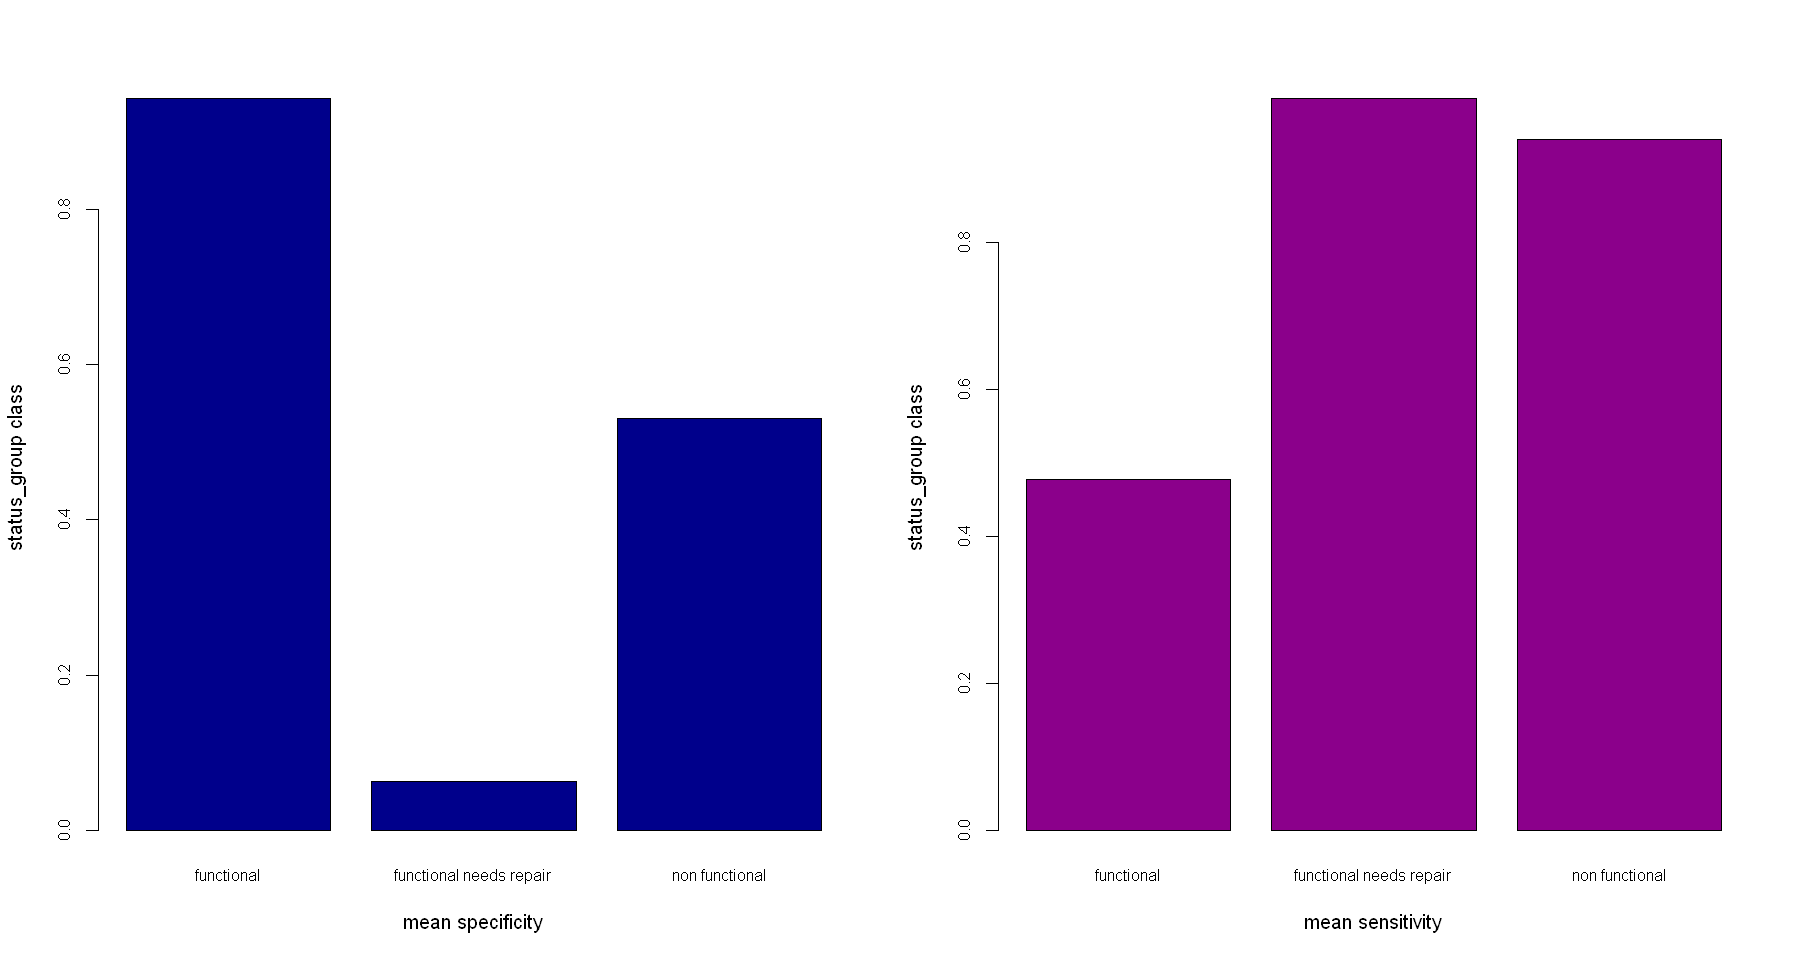

In [66]:
dt_corr_class<-c("functional","functional needs repair","non functional")
dt_corr_mean_sensitivity<-c(dt_corr_mean_sensitivity_fun,dt_corr_mean_sensitivity_repair,dt_corr_mean_sensitivity_nonfun)
dt_corr_mean_specificity<-c(dt_corr_mean_specificity_fun,dt_corr_mean_specificity_repair,dt_corr_mean_specificity_nonfun)
dt_corr_ss<-cbind("class"=dt_corr_class,"mean_specificity"=dt_corr_mean_specificity,"mean_sensitivity"=dt_corr_mean_sensitivity)
write.csv(dt_corr_ss,"dataset/results_dataframes/dt_corr_ss.csv")

dt_corr_ss_df<-read.csv("dataset/results_dataframes/dt_corr_ss.csv")
dt_corr_ss_df
par(mfrow=c(1,2))
barplot(height = dt_corr_ss_df$mean_specificity, names = dt_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = dt_corr_ss_df$mean_sensitivity, names = dt_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

The mean specificity of the class "functional needs repair" is very low. This is expected due to the imbalance in the dataset, the same reasoning applies to why non-functional isn't very high in specificity either. This is something that will be commonly observed across all the models.

#### Building the model

We used the "rpart" function to create the model. We used 0.002 for the complexity parameter so that it would consider all the 3 values in status_group. We did some external tuning for complexity parameter and found that 0.002 works better than others.

In [41]:
# Building model using entire training dataset

corr_model_dt_train<-rpart(status_group ~ . ,data = corr_data_merge[,-1],method = 'class',control = rpart.control(cp = 0.002))

In [43]:
# predicting using the model created using the entire training dataset

corr_dt <- predict(corr_model_dt_train, corr_test[-1], type='class')

In [45]:
# saving the results to file

corr_dt1<-cbind(corr_test$id,data.frame(corr_dt))
colnames(corr_dt1)[1]<-"id"
colnames(corr_dt1)[2]<-"status_group"
corr_dt1
write.csv(corr_dt1,"dataset/test_corr_dt1.csv")

,id,status_group
,<int>,<fct>
1,50785,non functional
2,51630,functional
3,17168,non functional
...,...,...
14849,33492,functional
14850,68707,non functional


### Decision Tree + mRMR
Using the dataset on which mRMR feature selection was applied.

#### Computing the misclassification rate
We're crossvalidating this model the same way we did for the decision tree with correlation. All the further models are crossvalidated in this same way.

In [46]:
# decision Tree mRMR model
CV_folds <- 10

size_CV <-floor(mNr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-mRMR_X[idx_ts,]  
     Y_ts<-mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:mNr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-mRMR_X[idx_tr,]
     Y_tr<-mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using rpart function)
     mRMR_dt_model<- rpart(status_group~.,DS, method = 'class',control = rpart.control(cp = 0.002))
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_dt_model,X_ts, type='class')

    # confusion matrix
    mRMR_dt_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_dt_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+mRMR_dt_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_dt_cm)
    missclassification_rate_dt_mRMR <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_dt_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

dt_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
dt_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", dt_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", dt_mRMR_mean_misclass))

dt_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
dt_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",dt_mRMR_mean_specificity_fun,"\nmean sensitivity:",dt_mRMR_mean_sensitivity_fun))

dt_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
dt_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",dt_mRMR_mean_specificity_repair,"\nmean sensitivity:",dt_mRMR_mean_sensitivity_repair))

dt_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
dt_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",dt_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",dt_mRMR_mean_sensitivity_nonfun))

options(warn=1)

[1] "Fold 1 misclassification rate: 0.28013468013468"
[1] "Fold 2 misclassification rate: 0.277272727272727"
[1] "Fold 3 misclassification rate: 0.275084175084175"
[1] "Fold 4 misclassification rate: 0.27979797979798"
[1] "Fold 5 misclassification rate: 0.287878787878788"
[1] "Fold 6 misclassification rate: 0.293939393939394"
[1] "Fold 7 misclassification rate: 0.277777777777778"
[1] "Fold 8 misclassification rate: 0.283164983164983"
[1] "Fold 9 misclassification rate: 0.288383838383838"
[1] "Fold 10 misclassification rate: 0.278282828282828"

Mean accuracy : 0.7178
Mean misclassification rate : 0.2822
[Functional]
mean specificity: 0.9433 
mean sensitivity: 0.4712
[Functional needs repair]
mean specificity: 0.063 
mean sensitivity: 0.996
[Non functional]
mean specificity: 0.5231 
mean sensitivity: 0.9403

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9433,0.4712
2,functional needs repair,0.0630,0.9960
3,non functional,0.5231,0.9403


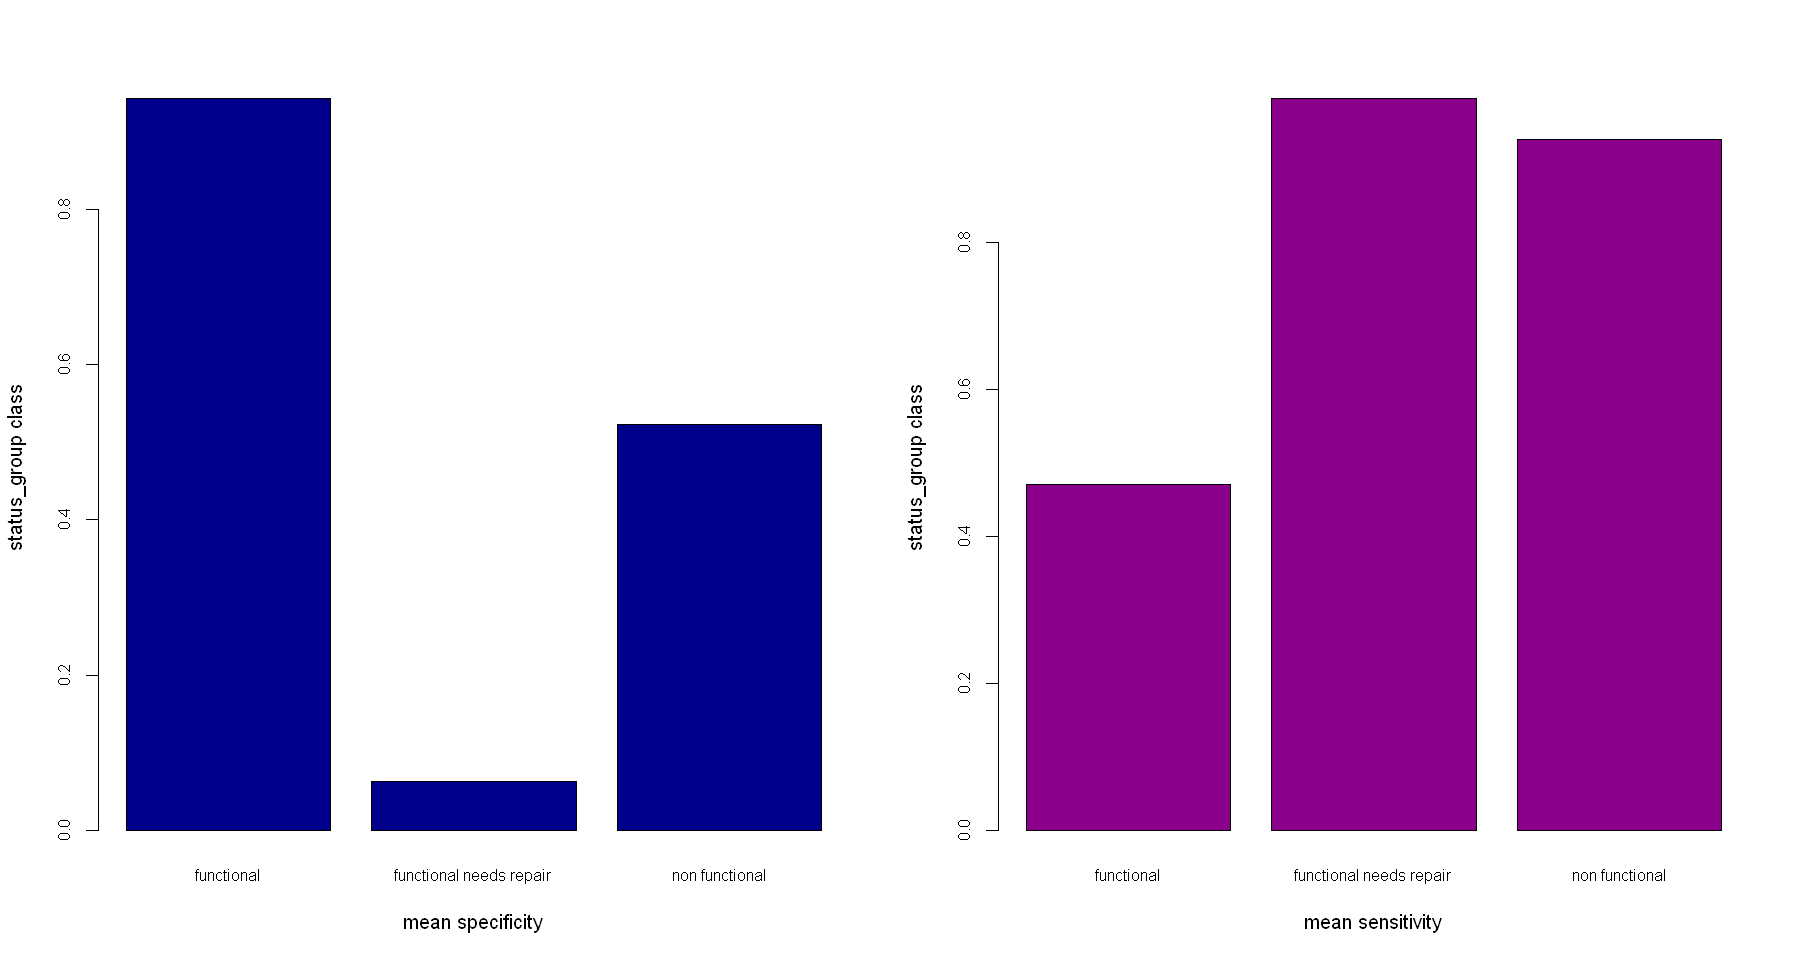

In [65]:
dt_mRMR_class<-c("functional","functional needs repair","non functional")
dt_mRMR_mean_sensitivity<-c(dt_mRMR_mean_sensitivity_fun,dt_mRMR_mean_sensitivity_repair,dt_mRMR_mean_sensitivity_nonfun)
dt_mRMR_mean_specificity<-c(dt_mRMR_mean_specificity_fun,dt_mRMR_mean_specificity_repair,dt_mRMR_mean_specificity_nonfun)
dt_mRMR_ss<-cbind("class"=dt_mRMR_class,"mean_specificity"=dt_mRMR_mean_specificity,"mean_sensitivity"=dt_mRMR_mean_sensitivity)
write.csv(dt_mRMR_ss,"dataset/results_dataframes/dt_mRMR_ss.csv")

dt_mRMR_ss_df<-read.csv("dataset/results_dataframes/dt_mRMR_ss.csv")
dt_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = dt_mRMR_ss_df$mean_specificity, names = dt_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = dt_mRMR_ss_df$mean_sensitivity, names = dt_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

Using a different feature selection technique wasn't expected to have any high impact on the mean specificities, which can be confirmed here. Across all models, there isn't much of a change in the barplots of sensitivity and specificity between the two classification techniques.

#### Building the model

In [47]:
# Building model using entire training dataset

dt_mRMR_train<-rpart(status_group ~ . ,data = mRMR_data_merge[,-1],method = 'class',control = rpart.control(cp = 0.002))

In [49]:
# predicting using the model created using the entire training dataset

mRMR_dt <- predict(dt_mRMR_train, mRMR_test[-1], type='class')

In [50]:
# saving results to file

mRMR_dt1<-cbind(mRMR_test$id,data.frame(mRMR_dt))
colnames(mRMR_dt1)[1]<-"id"
colnames(mRMR_dt1)[2]<-"status_group"
# mRMR_test$id
mRMR_dt1
write.csv(mRMR_dt1,"dataset/test_mRMR_dt2.csv")

,id,status_group
,<int>,<fct>
1,50785,non functional
2,51630,functional
3,17168,non functional
...,...,...
14849,33492,functional
14850,68707,non functional


## Model 2 : Random Forest

The second model we choose is "Random Forest". We choose this model because, it is a good choice to build classification models in the form of tree structures. Also, they do not require complex tuning to perfrom reasonably well on a brand new task. And it was easy to use with both numerical and categorical variables. We referred some of the lecture slides (chapter:Learning algorithms for nonlinear regression) and some other websites for this model. We tried this model with two datasets which contains the features selected from correlation and mRMR.

References:

* Lecture slide (chapter:Learning algorithms for nonlinear regression (slide no:57-60))
* Wpo session 3
* [https://www.youtube.com/watch?v=dJclNIN-TPo](https://www.youtube.com/watch?v=dJclNIN-TPo)
* [https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest](https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest)

### Random Forest + Correlation

Using the dataset on which the Correlation feature selection was applied.

#### Computing the misclassification rate

In [51]:
# Random Forest correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-corr_X[idx_ts,]  
     Y_ts<-corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:corr_Nr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-corr_X[idx_tr,]
     Y_tr<-corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using randomForest function)
     corr_rf_model<- randomForest(status_group ~ . ,data = DS,ntree = 500,
                      importance=TRUE)
     
     # Model prediction 
     Y_hat_ts<- predict(corr_rf_model,X_ts, type='class')

    # confusion matrix
    corr_rf_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_rf_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_rf_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_rf_cm)
    missclassification_rate_rf_corr <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_rf_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

rf_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
rf_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", rf_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", rf_corr_mean_misclass))

rf_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
rf_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",rf_corr_mean_specificity_fun,"\nmean sensitivity:",rf_corr_mean_sensitivity_fun))

rf_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
rf_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",rf_corr_mean_specificity_repair,"\nmean sensitivity:",rf_corr_mean_sensitivity_repair))

rf_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
rf_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",rf_corr_mean_specificity_nonfun,"\nmean sensitivity:",rf_corr_mean_sensitivity_nonfun))

options(warn=1)    

[1] "Fold 1 misclassification rate: 0.231986531986532"
[1] "Fold 2 misclassification rate: 0.238047138047138"
[1] "Fold 3 misclassification rate: 0.236363636363636"
[1] "Fold 4 misclassification rate: 0.239057239057239"
[1] "Fold 5 misclassification rate: 0.242087542087542"
[1] "Fold 6 misclassification rate: 0.243602693602694"
[1] "Fold 7 misclassification rate: 0.22996632996633"
[1] "Fold 8 misclassification rate: 0.238888888888889"
[1] "Fold 9 misclassification rate: 0.242760942760943"
[1] "Fold 10 misclassification rate: 0.241750841750842"

Mean accuracy : 0.7615
Mean misclassification rate : 0.2385
[Functional]
mean specificity: 0.9317 
mean sensitivity: 0.5847
[Functional needs repair]
mean specificity: 0.1004 
mean sensitivity: 0.9947
[Non functional]
mean specificity: 0.6461 
mean sensitivity: 0.9289

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9317,0.5847
2,functional needs repair,0.1004,0.9947
3,non functional,0.6461,0.9289


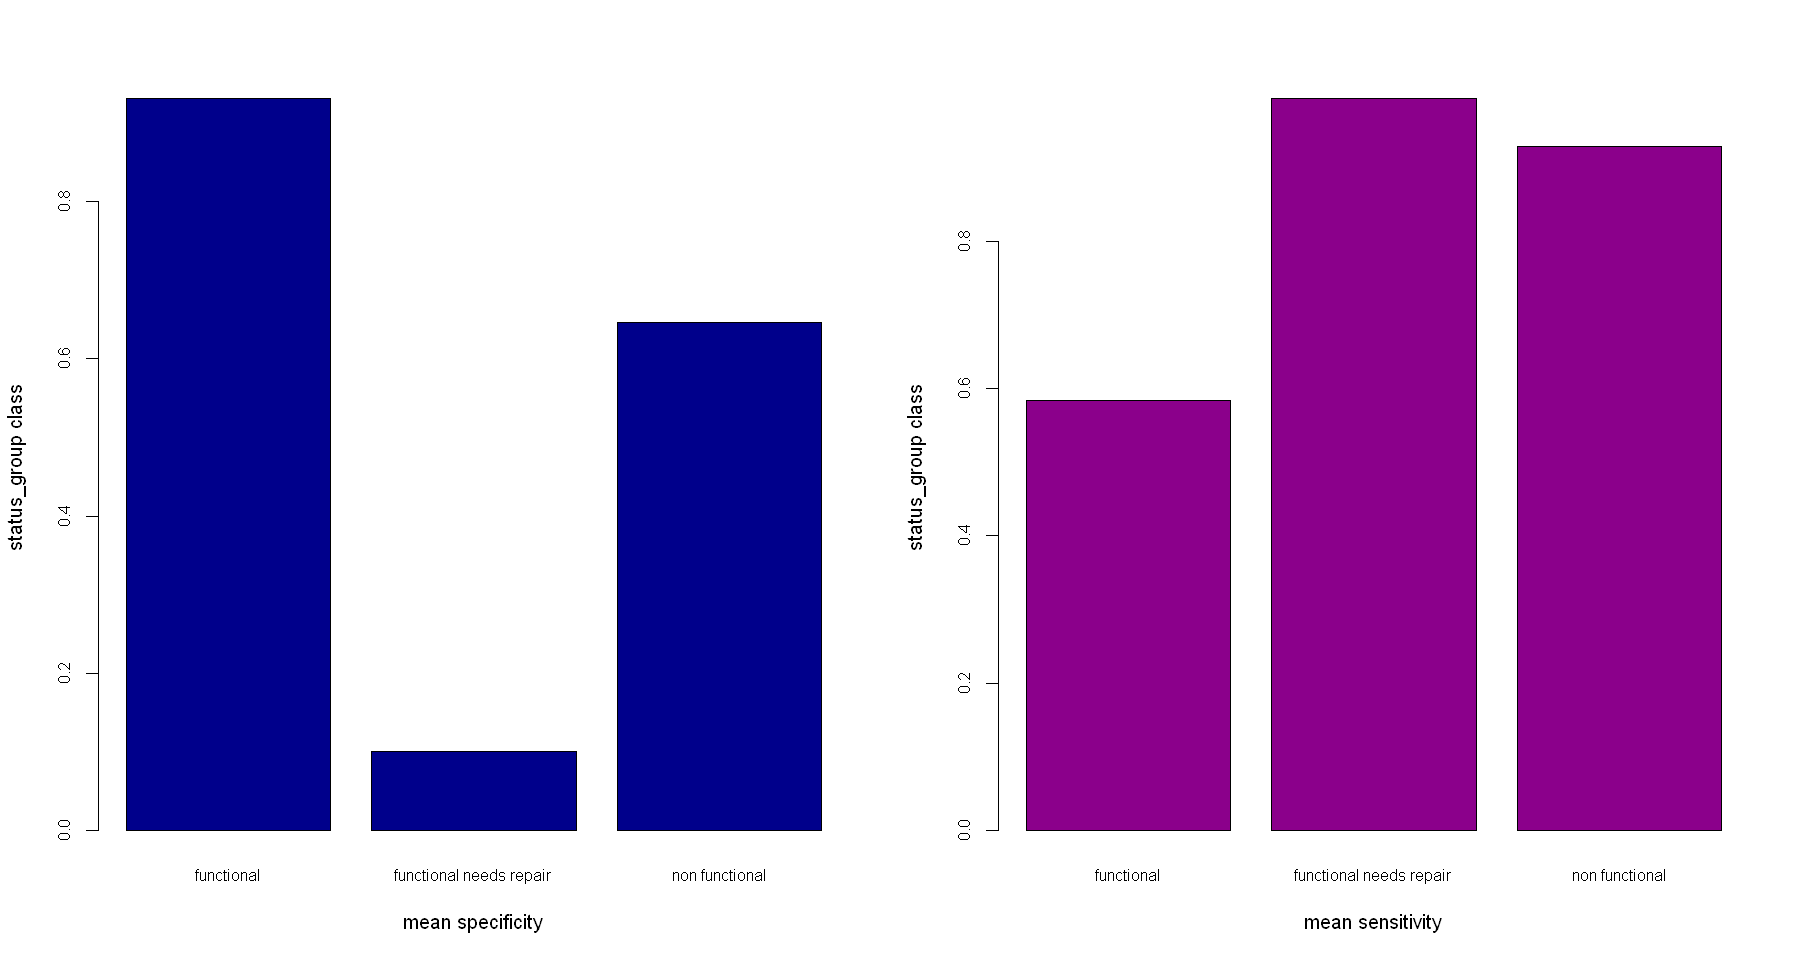

In [64]:
rf_corr_class<-c("functional","functional needs repair","non functional")
rf_corr_mean_sensitivity<-c(rf_corr_mean_sensitivity_fun,rf_corr_mean_sensitivity_repair,rf_corr_mean_sensitivity_nonfun)
rf_corr_mean_specificity<-c(rf_corr_mean_specificity_fun,rf_corr_mean_specificity_repair,rf_corr_mean_specificity_nonfun)
rf_corr_ss<-cbind("class"=rf_corr_class,"mean_specificity"=rf_corr_mean_specificity,"mean_sensitivity"=rf_corr_mean_sensitivity)
write.csv(rf_corr_ss,"dataset/results_dataframes/rf_corr_ss.csv")

rf_corr_ss_df<-read.csv("dataset/results_dataframes/rf_corr_ss.csv")
rf_corr_ss_df
par(mfrow=c(1,2))
barplot(height = rf_corr_ss_df$mean_specificity, names = rf_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = rf_corr_ss_df$mean_sensitivity, names = rf_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

The random forest exhibits very similar results on specificity and sensitivity when compared to the decision tree.

#### Building the model
We used the "randomForest" function to create the model using 500 trees.

In [52]:
# Building model using entire training dataset

corr_model_rf_train<-randomForest(status_group ~ . ,data = corr_data_merge[,-1],ntree = 500,
                      importance=TRUE)

In [53]:
corr_rf <- predict(corr_model_rf_train, corr_test[-1])
summary(corr_rf)

functional functional needs repair          non functional 
                  10326                     170                    4354

In [54]:
# saving results to file 

corr_rf1<-cbind(corr_test$id,data.frame(corr_rf))
colnames(corr_rf1)[1]<-"id"
colnames(corr_rf1)[2]<-"status_group"
write.csv(corr_rf1,"dataset/test_corr_rf1_tree500.csv")

### Random Forest + mRMR

Using the dataset on which the mRMR feature selection was applied.

#### Computing the misclassification rate

In [55]:
# random Forest mRMR model
CV_folds <- 10

size_CV <-floor(mNr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-mRMR_X[idx_ts,]  
     Y_ts<-mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:mNr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-mRMR_X[idx_tr,]
     Y_tr<-mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using randomForest function)
     mRMR_rf_model<- randomForest(status_group ~ . ,data = DS,ntree = 500,
                      importance=TRUE)
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_rf_model,X_ts, type='class')

    # confusion matrix
    mRMR_rf_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_rf_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+mRMR_rf_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_rf_cm)
    missclassification_rate_rf_mRMR <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_rf_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

rf_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
rf_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", rf_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", rf_mRMR_mean_misclass))

rf_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
rf_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",rf_mRMR_mean_specificity_fun,"\nmean sensitivity:",rf_mRMR_mean_sensitivity_fun))

rf_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
rf_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",rf_mRMR_mean_specificity_repair,"\nmean sensitivity:",rf_mRMR_mean_sensitivity_repair))

rf_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
rf_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",rf_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",rf_mRMR_mean_sensitivity_nonfun))

options(warn=1)

[1] "Fold 1 misclassification rate: 0.229292929292929"
[1] "Fold 2 misclassification rate: 0.231818181818182"
[1] "Fold 3 misclassification rate: 0.235185185185185"
[1] "Fold 4 misclassification rate: 0.237037037037037"
[1] "Fold 5 misclassification rate: 0.243939393939394"
[1] "Fold 6 misclassification rate: 0.240740740740741"
[1] "Fold 7 misclassification rate: 0.231313131313131"
[1] "Fold 8 misclassification rate: 0.238215488215488"
[1] "Fold 9 misclassification rate: 0.244781144781145"
[1] "Fold 10 misclassification rate: 0.236026936026936"

Mean accuracy : 0.7632
Mean misclassification rate : 0.2368
[Functional]
mean specificity: 0.932 
mean sensitivity: 0.5884
[Functional needs repair]
mean specificity: 0.1011 
mean sensitivity: 0.9946
[Non functional]
mean specificity: 0.6498 
mean sensitivity: 0.9289

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9320,0.5884
2,functional needs repair,0.1011,0.9946
3,non functional,0.6498,0.9289


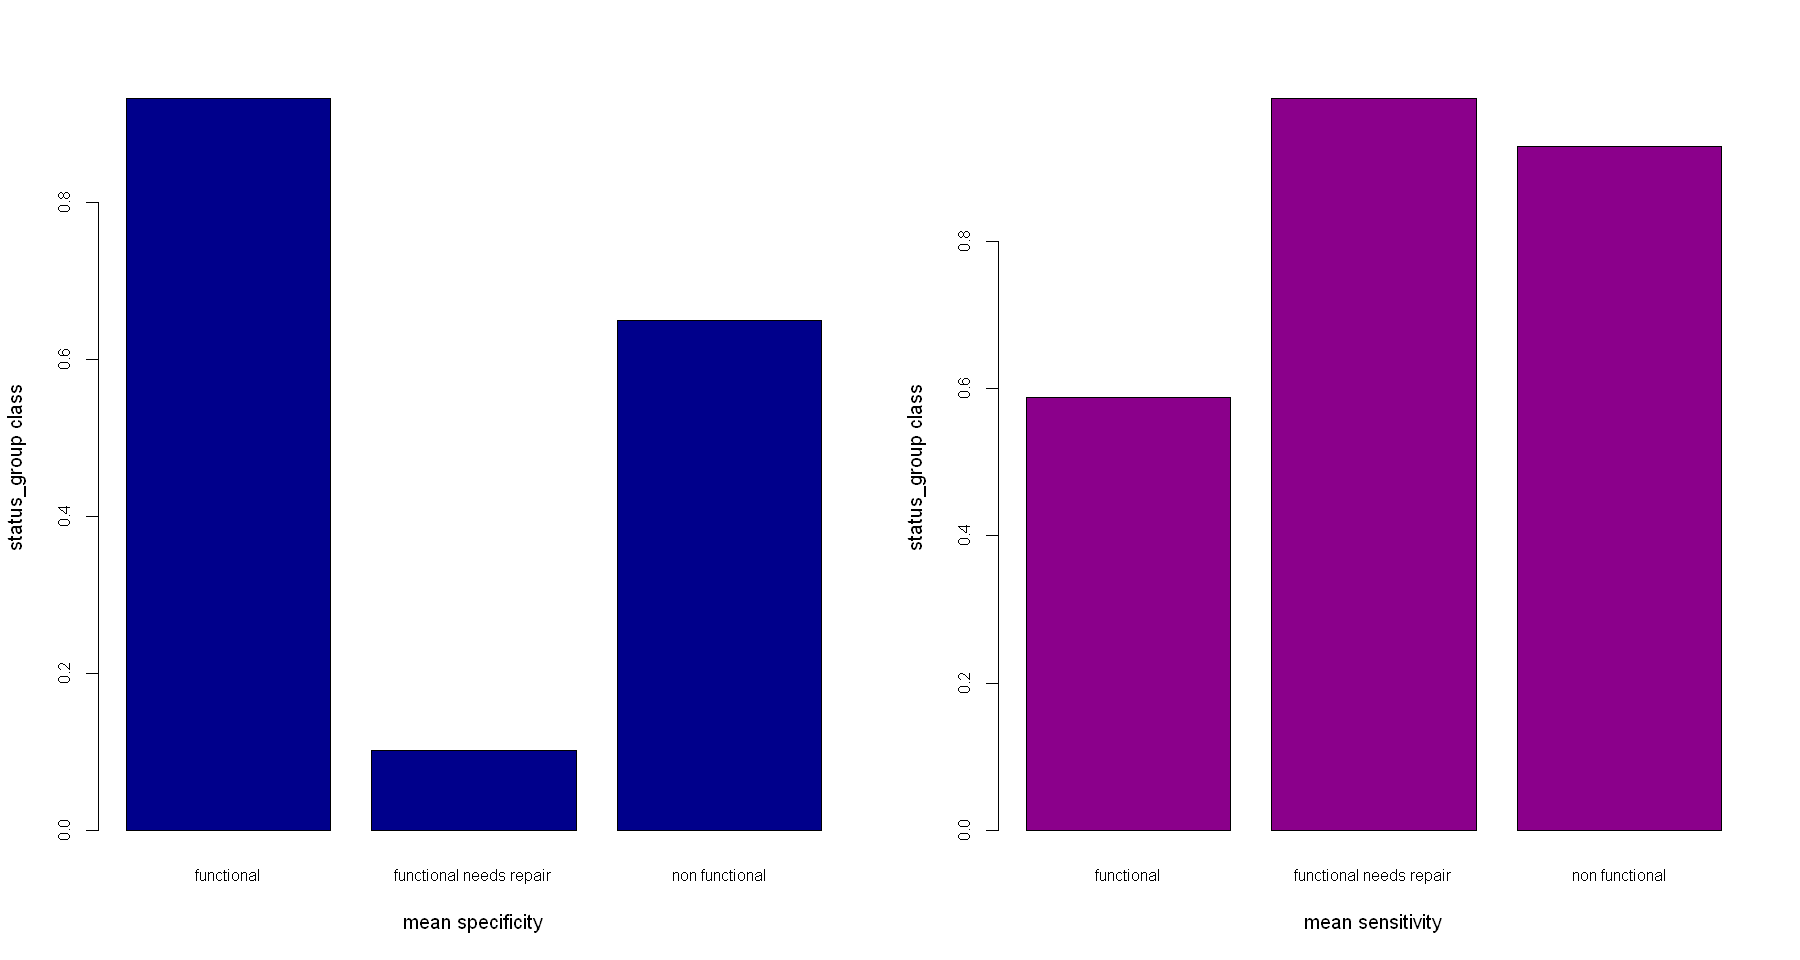

In [63]:
rf_mRMR_class<-c("functional","functional needs repair","non functional")
rf_mRMR_mean_sensitivity<-c(rf_mRMR_mean_sensitivity_fun,rf_mRMR_mean_sensitivity_repair,rf_mRMR_mean_sensitivity_nonfun)
rf_mRMR_mean_specificity<-c(rf_mRMR_mean_specificity_fun,rf_mRMR_mean_specificity_repair,rf_mRMR_mean_specificity_nonfun)
rf_mRMR_ss<-cbind("class"=rf_mRMR_class,"mean_specificity"=rf_mRMR_mean_specificity,"mean_sensitivity"=rf_mRMR_mean_sensitivity)
write.csv(rf_mRMR_ss,"dataset/results_dataframes/rf_mRMR_ss.csv")

rf_mRMR_ss_df<-read.csv("dataset/results_dataframes/rf_mRMR_ss.csv")
rf_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = rf_mRMR_ss_df$mean_specificity, names = rf_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = rf_mRMR_ss_df$mean_sensitivity, names = rf_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

#### Building the model
The model is trained with the same hyperparameters as for the previous model that used correlation.

In [56]:
# Building model using entire training dataset

rf_mRMR_train<-randomForest(status_group ~ . ,data = mRMR_data_merge[,-1],ntree = 500,
                      importance=TRUE)

In [57]:
# predicting using the model created using the entire training dataset

mRMR_rf_pred <- predict(rf_mRMR_train, mRMR_test[-1])

In [58]:
# saving results to file 

mRMR_rf_pred1<-cbind(mRMR_test$id,data.frame(mRMR_rf_pred))
colnames(mRMR_rf_pred1)[1]<-"id"
colnames(mRMR_rf_pred1)[2]<-"status_group"
write.csv(mRMR_rf_pred1,"dataset/test_mRMR_rf1.csv")

## Model 3 : Neural Network (Warning: execution time > 4 hours)

The third model we choose is a "Neural Network". We chose this model as we came to know from the lecture that neural networks are fault tolerent. Corruption, outliers or erroenous data in some of the features won't affect the target as much. It took longer to execute when compared to other models. We referred some of the lecture slides (chapter:Learning algorithms for nonlinear regression) and some other websites for this model. We tried this model with two datasets which contains the features selected from correlation and mRMR.

References:

* Lecture slide (chapter:Learning algorithms for nonlinear regression (slide no:8-29))
* Wpo session 4, 5
* [https://www.youtube.com/watch?v=-Vs9Vae2KI0](https://www.youtube.com/watch?v=-Vs9Vae2KI0)
* [https://wiki.pathmind.com/neural-network](https://wiki.pathmind.com/neural-network)
* [https://www.rdocumentation.org/packages/nnet/versions/7.3-15/topics/nnet](https://www.rdocumentation.org/packages/nnet/versions/7.3-15/topics/nnet)
* [Artificial Neural Networks Advantages and Disadvantages](https://www.linkedin.com/pulse/artificial-neural-networks-advantages-disadvantages-maad-m-mijwel/)

### Neural Network + Correlation
Using the data onto which the Correlation feature selection method was applied.

#### Computing the misclassification rate

In [96]:
# Neural Network correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-corr_X[idx_ts,]  
     Y_ts<-corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:corr_Nr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-corr_X[idx_tr,]
     Y_tr<-corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    head(DS)
    options(warn=-1)
     # Model fit (using nnet function)
     corr_nn_model<- nnet(status_group ~ .,DS,skip=FALSE,
                size=30, maxit=5000,trace=F,rang=0.2,MaxNWts=10000)
     
     # Model prediction 
     Y_hat_ts<- predict(corr_nn_model,X_ts)
     Y_hat_ts2<- predict(corr_nn_model,X_ts,type="class")

    # confusion matrix
    corr_nn_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_nn_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_nn_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_nn_cm)
    missclassification_rate_nn_corr <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_nn_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts2)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

nn_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
nn_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", nn_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", nn_corr_mean_misclass))

nn_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
nn_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",nn_corr_mean_specificity_fun,"\nmean sensitivity:",nn_corr_mean_sensitivity_fun))

nn_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
nn_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",nn_corr_mean_specificity_repair,"\nmean sensitivity:",nn_corr_mean_sensitivity_repair))

nn_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
nn_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",nn_corr_mean_specificity_nonfun,"\nmean sensitivity:",nn_corr_mean_sensitivity_nonfun))

options(warn=1) 

[1] "Fold 1 misclassification rate: 0.463973063973064"
[1] "Fold 2 misclassification rate: 0.264814814814815"
[1] "Fold 3 misclassification rate: 0.266161616161616"
[1] "Fold 4 misclassification rate: 0.272390572390572"
[1] "Fold 5 misclassification rate: 0.270875420875421"
[1] "Fold 6 misclassification rate: 0.276936026936027"
[1] "Fold 7 misclassification rate: 0.269191919191919"
[1] "Fold 8 misclassification rate: 0.492087542087542"
[1] "Fold 9 misclassification rate: 0.278451178451179"
[1] "Fold 10 misclassification rate: 0.280639730639731"

Mean accuracy : 0.6864
Mean misclassification rate : 0.3136
[Functional]
mean specificity: 0.9102 
mean sensitivity: 0.4932
[Functional needs repair]
mean specificity: 0.0056 
mean sensitivity: 0.9979
[Non functional]
mean specificity: 0.5538 
mean sensitivity: 0.9041

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9102,0.4932
2,functional needs repair,0.0056,0.9979
3,non functional,0.5538,0.9041


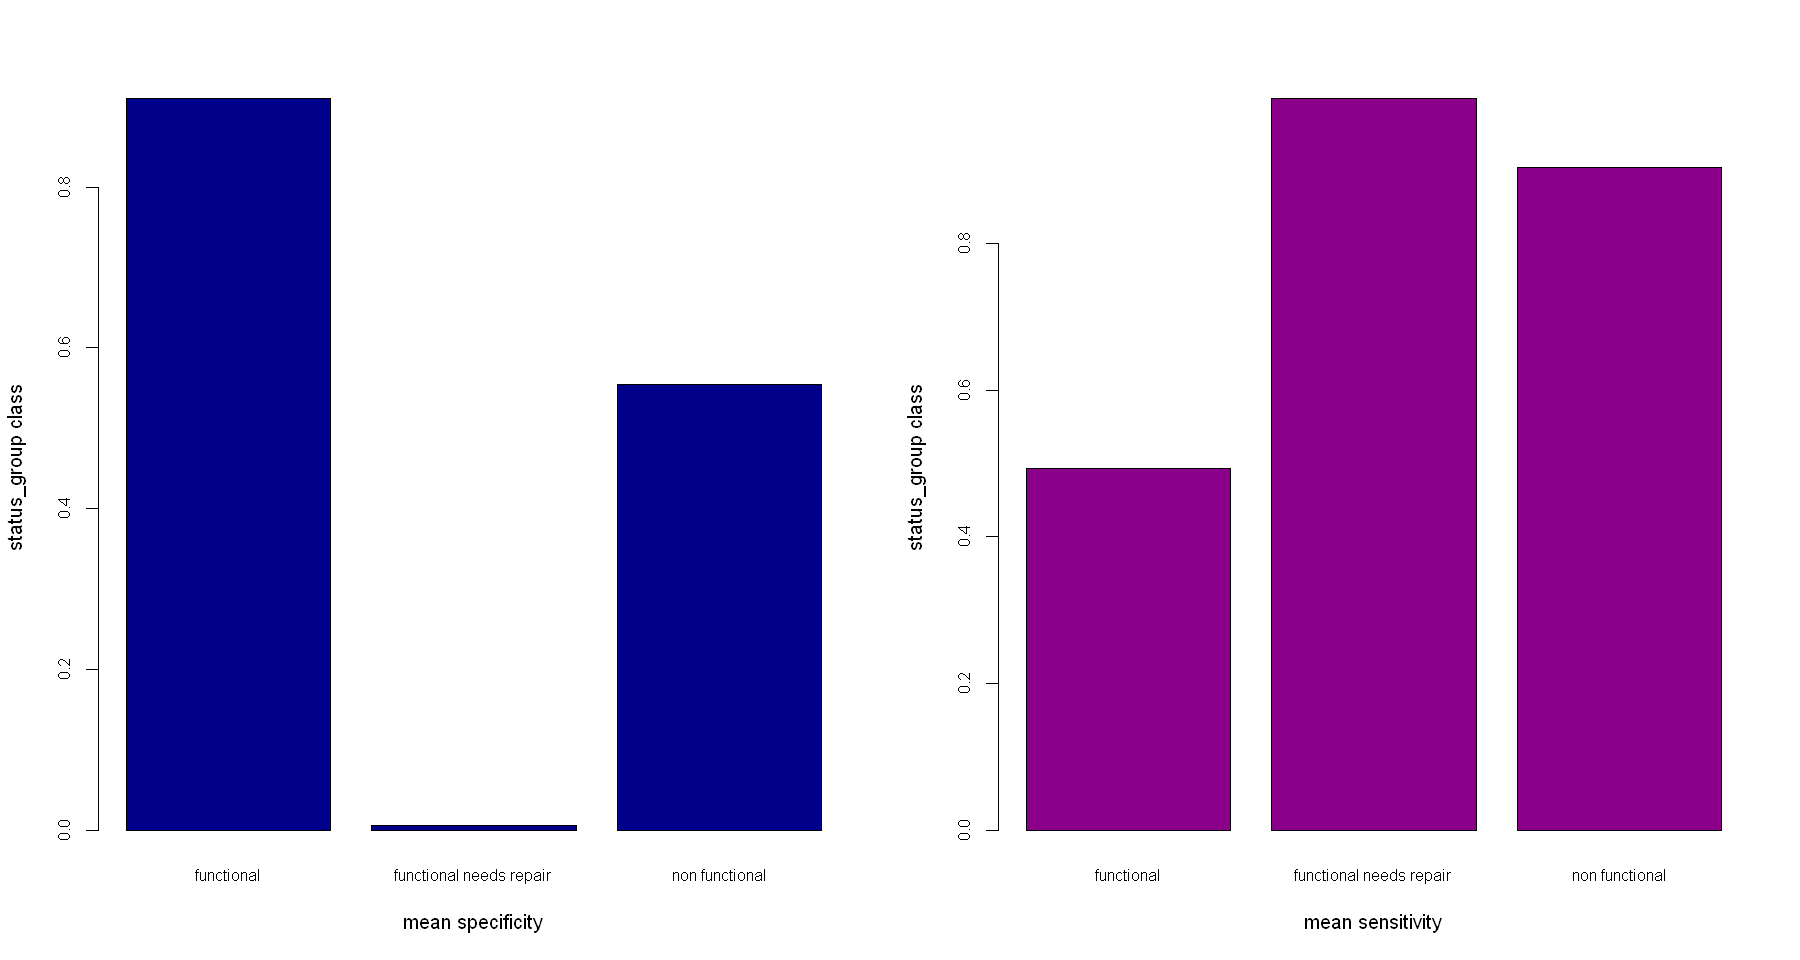

In [62]:
nn_corr_class<-c("functional","functional needs repair","non functional")
nn_corr_mean_sensitivity<-c(nn_corr_mean_sensitivity_fun,nn_corr_mean_sensitivity_repair,nn_corr_mean_sensitivity_nonfun)
nn_corr_mean_specificity<-c(nn_corr_mean_specificity_fun,nn_corr_mean_specificity_repair,nn_corr_mean_specificity_nonfun)
nn_corr_ss<-cbind("class"=nn_corr_class,"mean_specificity"=nn_corr_mean_specificity,"mean_sensitivity"=nn_corr_mean_sensitivity)
write.csv(nn_corr_ss,"dataset/results_dataframes/nn_corr_ss.csv")

nn_corr_ss_df<-read.csv("dataset/results_dataframes/nn_corr_ss.csv")
nn_corr_ss_df
par(mfrow=c(1,2))
barplot(height = nn_corr_ss_df$mean_specificity, names = nn_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = nn_corr_ss_df$mean_sensitivity, names = nn_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

#### Building the model
We used the "nnet" function to create the model. We used a size of 30 with this model, we first used a size of 10 but the classification exclusively classified the results as functional, so we increased it.

In [98]:
nnet_corr_train<-nnet(status_group ~ .,corr_data_merge[,-1],skip=FALSE,
                size=30, maxit=5000,trace=F,rang=0.2,MaxNWts=10000)

In [99]:
corr_nnet_train_pred<-predict(nnet_corr_train,corr_test[,-1],type="class")

In [100]:
corr_nnet_train_pred1<-cbind(corr_test$id,data.frame(corr_nnet_train_pred))
colnames(corr_nnet_train_pred1)[1]<-"id"
colnames(corr_nnet_train_pred1)[2]<-"status_group"
corr_nnet_train_pred1
write.csv(corr_nnet_train_pred1,"dataset/test_corr_nnet1_size30.csv")

# score:0.7479 (size= 30)

id,status_group
<int>,<chr>
50785,functional
51630,functional
17168,non functional
...,...
33492,functional
68707,non functional


### Neural Network + mRMR
Using the data onto which the mRMR feature selection method was applied.

#### Computing the misclassification rate

In [101]:
# Neural Network mRMR model
CV_folds <- 10

size_CV <-floor(mNr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-mRMR_X[idx_ts,]  
     Y_ts<-mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:mNr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-mRMR_X[idx_tr,]
     Y_tr<-mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using nnet function)
     mRMR_nn_model<- nnet(status_group ~ .,DS,skip=FALSE,
                size=30, maxit=5000,trace=F,rang=0.2,MaxNWts=10000)
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_nn_model,X_ts)
     Y_hat_ts2<- predict(mRMR_nn_model,X_ts,type="class")

    # confusion matrix
    mRMR_nn_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_nn_cm)
    print(n_r)
    mRMR_nn_cm

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i] + mRMR_nn_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_nn_cm)
    missclassification_rate_nn_mRMR <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_nn_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts2)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

nn_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
nn_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", nn_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", nn_mRMR_mean_misclass))

nn_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
nn_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",nn_mRMR_mean_specificity_fun,"\nmean sensitivity:",nn_mRMR_mean_sensitivity_fun))

nn_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
nn_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",nn_mRMR_mean_specificity_repair,"\nmean sensitivity:",nn_mRMR_mean_sensitivity_repair))

nn_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
nn_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",nn_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",nn_mRMR_mean_sensitivity_nonfun))

options(warn=1)

[1] 2
[1] "Fold 1 misclassification rate: 0.49006734006734"
[1] 3
[1] "Fold 2 misclassification rate: 0.273569023569024"
[1] 2
[1] "Fold 3 misclassification rate: 0.474747474747475"
[1] 2
[1] "Fold 4 misclassification rate: 0.482828282828283"
[1] 3
[1] "Fold 5 misclassification rate: 0.274915824915825"
[1] 2
[1] "Fold 6 misclassification rate: 0.497811447811448"
[1] 2
[1] "Fold 7 misclassification rate: 0.496632996632997"
[1] 2
[1] "Fold 8 misclassification rate: 0.49949494949495"
[1] 3
[1] "Fold 9 misclassification rate: 0.27962962962963"
[1] 3
[1] "Fold 10 misclassification rate: 0.272558922558923"

Mean accuracy : 0.5958
Mean misclassification rate : 0.4042
[Functional]
mean specificity: 0.9141 
mean sensitivity: 0.4857
[Functional needs repair]
mean specificity: 0.0036 
mean sensitivity: 0.9993
[Non functional]
mean specificity: 0.5478 
mean sensitivity: 0.9069

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9141,0.4857
2,functional needs repair,0.0036,0.9993
3,non functional,0.5478,0.9069


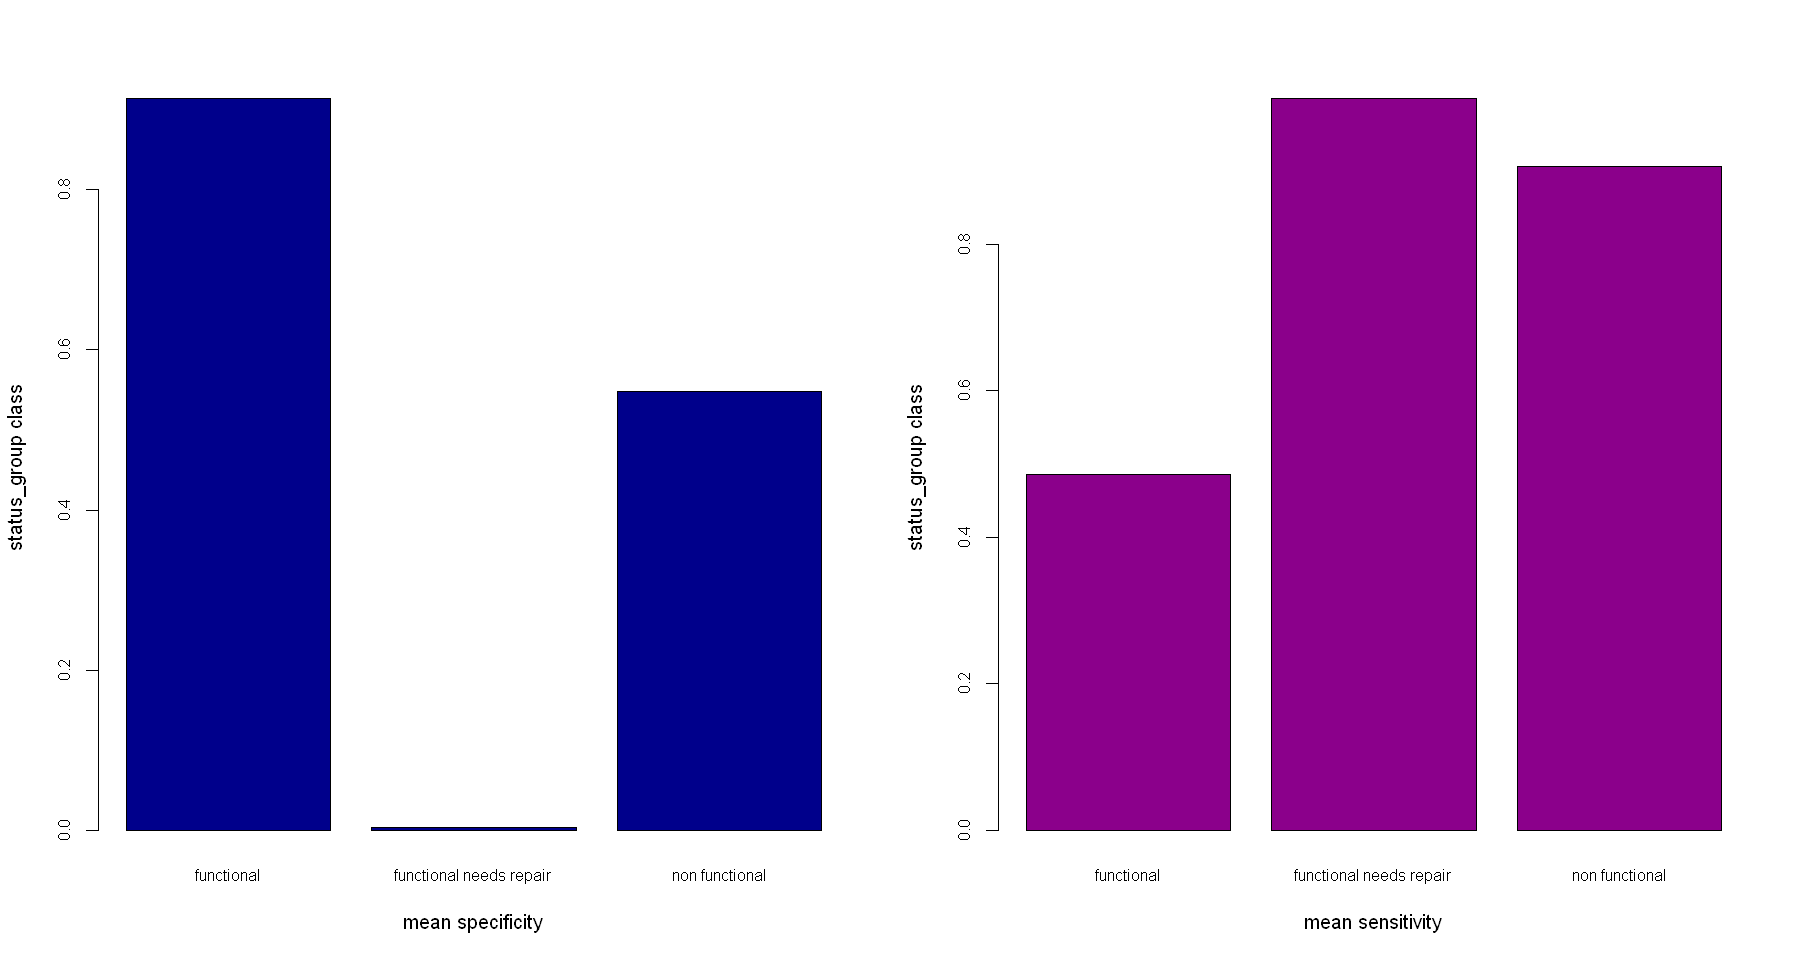

In [61]:
nn_mRMR_class<-c("functional","functional needs repair","non functional")
nn_mRMR_mean_sensitivity<-c(nn_mRMR_mean_sensitivity_fun,nn_mRMR_mean_sensitivity_repair,nn_mRMR_mean_sensitivity_nonfun)
nn_mRMR_mean_specificity<-c(nn_mRMR_mean_specificity_fun,nn_mRMR_mean_specificity_repair,nn_mRMR_mean_specificity_nonfun)
nn_mRMR_ss<-cbind("class"=nn_mRMR_class,"mean_specificity"=nn_mRMR_mean_specificity,"mean_sensitivity"=nn_mRMR_mean_sensitivity)
write.csv(nn_mRMR_ss,"dataset/results_dataframes/nn_mRMR_ss.csv")

nn_mRMR_ss_df<-read.csv("dataset/results_dataframes/nn_mRMR_ss.csv")
nn_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = nn_mRMR_ss_df$mean_specificity, names = nn_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = nn_mRMR_ss_df$mean_sensitivity, names = nn_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

#### Building the model
We're building this model the same way we did for the neural network with correlation.

In [102]:
nnet_mRMR_train<-nnet(status_group ~ .,mRMR_data_merge[,-1],skip=FALSE,
                size=30, maxit=5000,trace=F,rang=0.2,MaxNWts=10000)
                # 16.3 mmin

In [103]:
mRMR_nnet_train_pred<-predict(nnet_mRMR_train,mRMR_test[,-1],type="class")

In [104]:
mRMR_nnet_train_pred1<-cbind(mRMR_test$id,data.frame(mRMR_nnet_train_pred))
colnames(mRMR_nnet_train_pred1)[1]<-"id"
colnames(mRMR_nnet_train_pred1)[2]<-"status_group"
mRMR_nnet_train_pred1
write.csv(mRMR_nnet_train_pred1,"dataset/test_mRMR_nnet1_size30.csv")

# score:0.7544 (size= 30)

id,status_group
<int>,<chr>
50785,non functional
51630,functional
17168,non functional
...,...
33492,functional
68707,non functional


## Model 4 : Support Vector Machine (RBF kernel)  (Warning: execution time > 10 hours)

Due to the high number of features, we decided to also try to build a support vector machine model using a radial basis function kernel which should work well in high dimensional datasets.

Hyperparameter tuning was done on the gamma and cost via the tune function of the library. We couldn't try many different values as the time required to run it increased much too fast. We compared two values for gamma (0.01 and 0.1), and two for the cost (10 and 100). In an ideal situation we would have liked to have wider ranges for both of these parameters, 10^-3 to 10^1 for gamma and 10^-1 to 10^3 for cost would have possibly helped fnding better values.

The code below has been ran once, the result of which has been screenshotted and pasted below. The best values for gamma and cost were respectively 0.01 and 100. 
Warning, the tuning took more than three hours to execute on our machines.

In [105]:
# Hyperparameter tuning

The tuning of the hyperparameters is done on the entirety of the train dataset (no splits training/validation)
svm_tuning <- tune(svm, status_group~., 
                data = corr_data_merge, 
                type = "C-classification",
                kernel = "radial",
                ranges = list(gamma = 10^(-2:-1), cost = 10^(1:2)),
                tunecontrol = tune.control(sampling = "fix")
                )
summary(svm_tuning)
plot(svm_tuning)

<img src="pictures/svm_tune_picture.png">

### SVM + Correlation
Using the dataset onto which the Correlation feature selection method was applied.

#### Computing the misclassification rate

In [32]:
# SVM correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-corr_X[idx_ts,]  
     Y_ts<-corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:corr_Nr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-corr_X[idx_tr,]
     Y_tr<-corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using svm function)
    
    corr_svm_model = svm(formula = status_group ~ ., 
                        data = DS, 
                        type = "C-classification",
                        kernel = "radial", 
                        gamma = 0.01,
                        cost = 100, 
                        scale = FALSE)
     
     # Model prediction 
     Y_hat_ts<- predict(corr_svm_model,X_ts, type='class')

    # confusion matrix
    corr_svm_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_svm_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_svm_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_svm_cm)
    missclassification_rate_svm_corr <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_svm_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

svm_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
svm_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", svm_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", svm_corr_mean_misclass))

svm_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
svm_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",svm_corr_mean_specificity_fun,"\nmean sensitivity:",svm_corr_mean_sensitivity_fun))

svm_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
svm_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",svm_corr_mean_specificity_repair,"\nmean sensitivity:",svm_corr_mean_sensitivity_repair))

svm_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
svm_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",svm_corr_mean_specificity_nonfun,"\nmean sensitivity:",svm_corr_mean_sensitivity_nonfun))

options(warn=1) 

[1] "Fold 1 misclassification rate: 0.456734006734007"
[1] "Fold 2 misclassification rate: 0.446632996632997"
[1] "Fold 3 misclassification rate: 0.452188552188552"
[1] "Fold 4 misclassification rate: 0.454377104377104"
[1] "Fold 5 misclassification rate: 0.461952861952862"
[1] "Fold 6 misclassification rate: 0.473905723905724"
[1] "Fold 7 misclassification rate: 0.457912457912458"
[1] "Fold 8 misclassification rate: 0.456397306397306"
[1] "Fold 9 misclassification rate: 0.45016835016835"
[1] "Fold 10 misclassification rate: 0.461111111111111"

Mean accuracy : 0.5429
Mean misclassification rate : 0.4571
[Functional]
mean specificity: 0.9996 
mean sensitivity: 4e-04
[Functional needs repair]
mean specificity: 0 
mean sensitivity: 1
[Non functional]
mean specificity: 4e-04 
mean sensitivity: 0.9996

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.9996,0.0004
2,functional needs repair,0.0000,1.0000
3,non functional,0.0004,0.9996


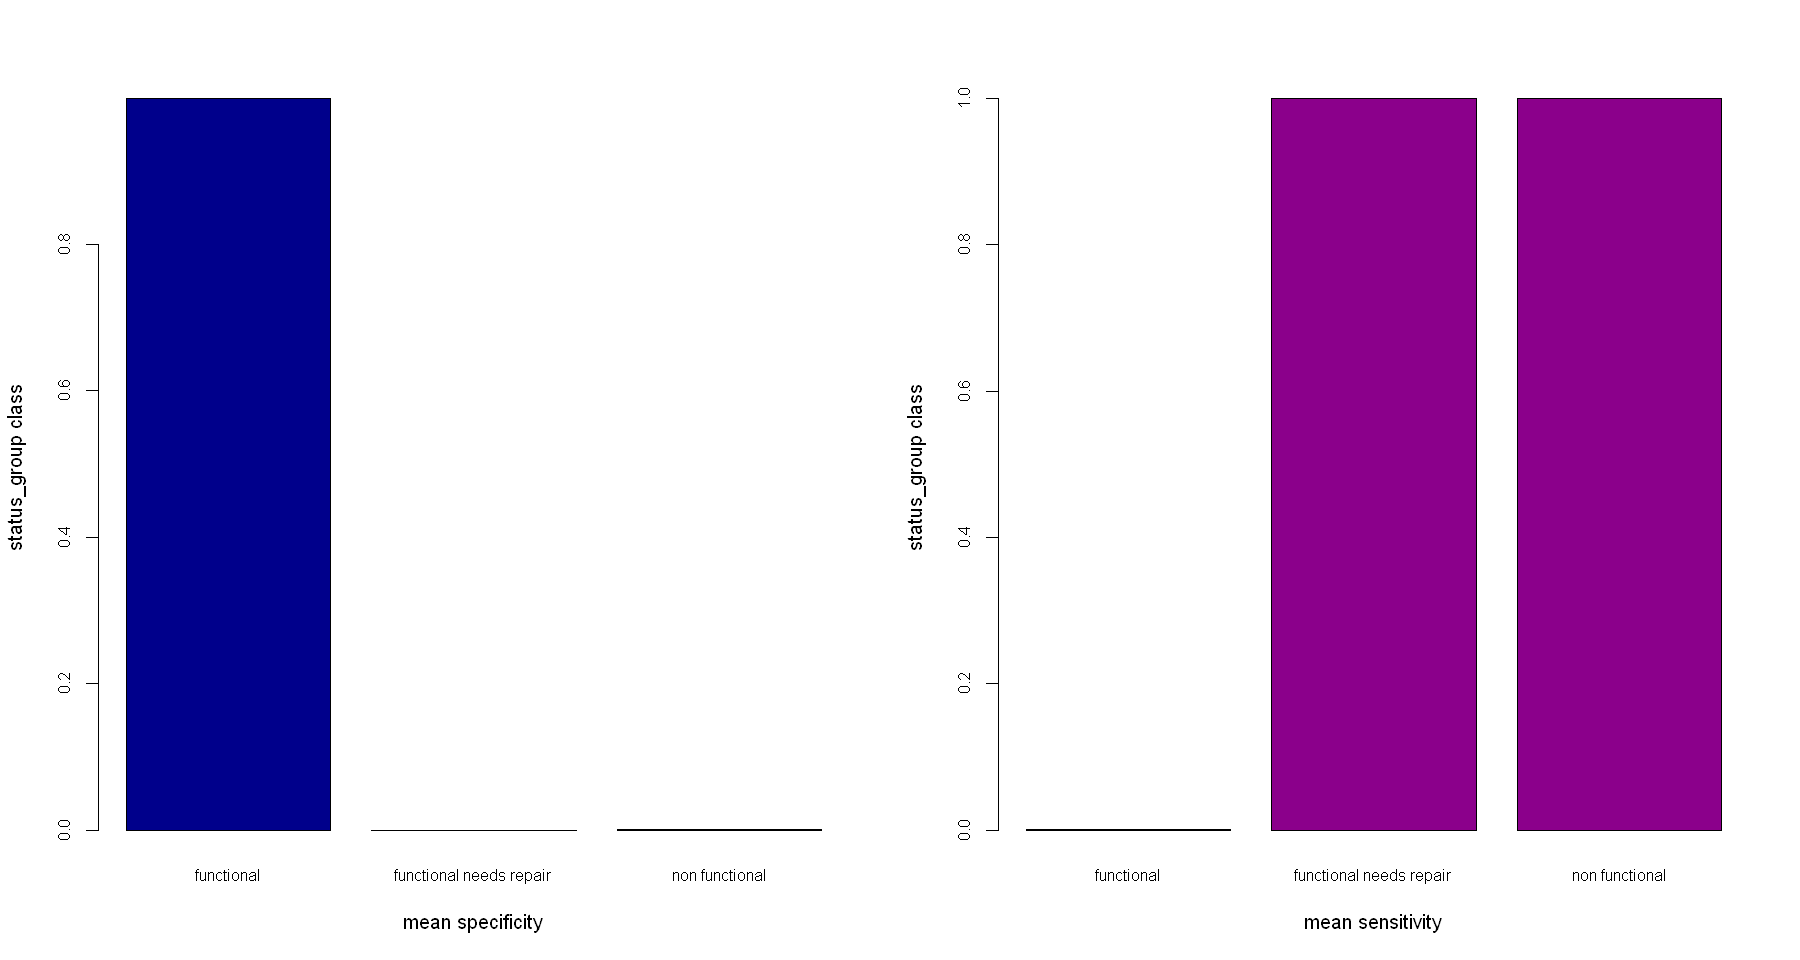

In [58]:
svm_corr_class<-c("functional","functional needs repair","non functional")
svm_corr_mean_sensitivity<-c(svm_corr_mean_sensitivity_fun,svm_corr_mean_sensitivity_repair,svm_corr_mean_sensitivity_nonfun)
svm_corr_mean_specificity<-c(svm_corr_mean_specificity_fun,svm_corr_mean_specificity_repair,svm_corr_mean_specificity_nonfun)
svm_corr_ss<-cbind("class"=svm_corr_class,"mean_specificity"=svm_corr_mean_specificity,"mean_sensitivity"=svm_corr_mean_sensitivity)
write.csv(svm_corr_ss,"dataset/results_dataframes/svm_corr_ss.csv")

svm_corr_ss_df<-read.csv("dataset/results_dataframes/svm_corr_ss.csv")
svm_corr_ss_df
par(mfrow=c(1,2))
barplot(height = svm_corr_ss_df$mean_specificity, names = svm_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = svm_corr_ss_df$mean_sensitivity, names = svm_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

#### Building the model

In [33]:
# Building model using entire training dataset

corr_model_svm_train<-svm(formula = status_group ~ ., 
                        data = corr_data_merge[,-1], 
                        type = "C-classification",
                        kernel = "radial", 
                        gamma = 0.01,
                        cost = 100, 
                        scale = FALSE)

In [34]:
corr_svm <- predict(corr_model_svm_train, corr_test[-1])
summary(corr_svm)

functional functional needs repair          non functional 
                   9413                     425                    5012

In [35]:
# saving results to file 

corr_svm1<-cbind(corr_test$id,data.frame(corr_svm))
colnames(corr_svm1)[1]<-"id"
colnames(corr_svm1)[2]<-"status_group"
write.csv(corr_svm1,"dataset/test_corr_svm1.csv")

### SVM + mRMR
Using the dataset onto which the mRMR feature selection method was applied.

#### Computing the misclassification rate

In [ ]:
# SVM mRMR model
CV_folds <- 10

size_CV <-floor(mNr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-mRMR_X[idx_ts,]  
     Y_ts<-mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:mNr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-mRMR_X[idx_tr,]
     Y_tr<-mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using randomForest function)
    
    mRMR_svm_model = svm(formula = status_group ~ ., 
                        data = DS, 
                        type = "C-classification",
                        kernel = "radial", 
                        gamma = 0.01,
                        cost = 100, 
                        scale = FALSE)
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_svm_model,X_ts, type='class')
     

    # confusion matrix
    mRMR_svm_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_svm_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+mRMR_svm_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_svm_cm)
    missclassification_rate_svm_mRMR <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_svm_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

svm_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
svm_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", svm_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", svm_mRMR_mean_misclass))

svm_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
svm_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",svm_mRMR_mean_specificity_fun,"\nmean sensitivity:",svm_mRMR_mean_sensitivity_fun))

svm_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
svm_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",svm_mRMR_mean_specificity_repair,"\nmean sensitivity:",svm_mRMR_mean_sensitivity_repair))

svm_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
svm_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",svm_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",svm_mRMR_mean_sensitivity_nonfun))

options(warn=1)

The following is a screenshot of the execution, which was executed in a copy of this notebook in parallel to other models to lower the combined execution time.

<img src="pictures/svm_mrmr_results1.png">

In [ ]:
svm_mRMR_class<-c("functional","functional needs repair","non functional")
svm_mRMR_mean_sensitivity<-c(svm_mRMR_mean_sensitivity_fun,svm_mRMR_mean_sensitivity_repair,svm_mRMR_mean_sensitivity_nonfun)
svm_mRMR_mean_specificity<-c(svm_mRMR_mean_specificity_fun,svm_mRMR_mean_specificity_repair,svm_mRMR_mean_specificity_nonfun)
svm_mRMR_ss<-cbind("class"=svm_mRMR_class,"mean_specificity"=svm_mRMR_mean_specificity,"mean_sensitivity"=svm_mRMR_mean_sensitivity)
write.csv(svm_mRMR_ss,"dataset/results_dataframes/svm_mRMR_ss.csv")

svm_mRMR_ss_df<-read.csv("dataset/results_dataframes/svm_mRMR_ss.csv")
svm_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = svm_mRMR_ss_df$mean_specificity, names = svm_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = svm_mRMR_ss_df$mean_sensitivity, names = svm_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

The following is a screenshot of the execution, which was executed in a copy of this notebook in parallel to other models to lower the combined execution time.

<img src="pictures/svm_mrmr_results2.png">

#### Building the model

In [ ]:
# Building model using entire training dataset

svm_mRMR_train<-svm(formula = status_group ~ ., 
                        data = mRMR_data_merge[,-1], 
                        type = "C-classification",
                        kernel = "radial", 
                        gamma = 0.01,
                        cost = 100, 
                        scale = FALSE)

In [ ]:
# predicting using the model created using the entire training dataset

mRMR_svm_pred <- predict(svm_mRMR_train, mRMR_test[-1])

In [ ]:
# saving results to file 

mRMR_svm_pred1<-cbind(mRMR_test$id,data.frame(mRMR_svm_pred))
colnames(mRMR_svm_pred1)[1]<-"id"
colnames(mRMR_svm_pred1)[2]<-"status_group"
write.csv(mRMR_svm_pred1,"dataset/test_mRMR_svm1.csv")

# Step 3

<h1> Model - XGBoost(eXtreme Gradient Boosting) </h1>

# What is XGBOOST and how it works?

- Xgboost was highly effective with reduced computational time, it uses the gradient boosting decision tree algorithm. 
- Its a boosting technique in ensemble learning.
- Ensemble leaarning collects predictions from multiple models for better accuarcy
- Boosting works by learning from mistakes. In boosting, The errors from the weak learners are corrected by the succeeding models by adding some weights to the models to predict the target variable. For every incorrect prediction, large weights are given to missclassified samples and lesser weights to correct samples.
- weak learners that perferm better are given higher weights.

**Objective Function** -- minimises or maximises something
- An objective function, to measure how well the model fits the data is measured by

<h1><center>$\text{obj}(\theta) = L(\theta) + \Omega(\theta)$</center></h1>


**Model Complexity**

<h1><center>$\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2$</center></h1>

- Omega is the reguralisation term, which controls complexity avoiding overfitting.

- Loss function is given by the difference between the predicted and actual value

<h1><center>$L(\theta) = \sum_i (y_i-\hat{y}_i)^2$</center></h1>

- It has many number of hyperparamters which can be tuned based on the problem.

## XGboost + Correlation

*   Used the data from the correlation feature selection

- https://rstudio-pubs-static.s3.amazonaws.com/233321_06bcdf2c8bc445dbb635740bb44f978b.html  

In [39]:
# Adding a dummy status group with default value zero
corr_test1<-corr_test
corr_test1$status_group<-0
dim(corr_test1)
# corr_test1

[1] 14850    53

Since xgboost takes input in matrix format, we convert the dataframe to datamatrix to train our model

In [40]:
# train_index <- sample(1:nrow(corr_data_merge), nrow(corr_data_merge)*1)

# converting train data to Dmatrix
data_variables <- as.matrix(corr_X[,-1])
data_label <- corr_Y
data_matrix <- xgb.DMatrix(data = as.matrix(corr_X[,-1]), label = data_label)

# # # split train data and make xgb.DMatrix
# train_data   <- data_variables[train_index,]
# train_label  <- data_label[train_index]
# train_matrix <- xgb.DMatrix(data = train_data, label = train_label)

X_idx<-grep("X", colnames(corr_test1))
id_idx<-grep("id", colnames(corr_test1))
status_group_idx<-grep("status_group", colnames(corr_test1))

# converting test data to Dmatrix
test_data  <- as.matrix(corr_test1[,-c(X_idx,id_idx,status_group_idx)]) #eliminating columns "X","id" and "status_group"
test_label <- corr_test1[,"status_group"]
test_matrix <- xgb.DMatrix(data = test_data, label = test_label)

In [41]:
dim(data_matrix)
dim(test_matrix)
setdiff(colnames(test_matrix), colnames(data_matrix))

[1] 59400    50

[1] 14850    50

character(0)

### Calculating the misclassification rate

In [42]:
# XGboost correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
    set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-corr_X[idx_ts,]  
     Y_ts<-corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:corr_Nr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-corr_X[idx_tr,]
     Y_tr<-corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
     DS_matrix<-xgb.DMatrix(data = as.matrix(X_tr), label = Y_tr)
     cv_test_matrix<-xgb.DMatrix(data = as.matrix(X_ts), label = Y_ts)

    # head(DS)
    options(warn=-1)
     # Model fit (using xgboost function)
     corr_xg_model<- xgboost(data = DS_matrix, objective = "multi:softmax", booster = "gbtree",
                 eval_metric = "merror", nrounds = 50, 
                 num_class = 4,eta = .2, max_depth = 14, colsample_bytree = .4)
     
     # Model prediction 
     Y_hat_ts<- predict(corr_xg_model,cv_test_matrix)
    #  Y_hat_ts<- predict(corr_nn_model,X_ts, method='class')
     
     # Cross validation error = Mean Squared Error
    #  CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
    #  CV_err[i]<-mean((unlist(Y_hat_ts)-Y_ts)^2)

    # confusion matrix
    corr_xg_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_xg_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_xg_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_xg_cm)
    missclassification_rate_xg_corr <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_xg_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

xg_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
xg_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", xg_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", xg_corr_mean_misclass))

xg_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
xg_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",xg_corr_mean_specificity_fun,"\nmean sensitivity:",xg_corr_mean_sensitivity_fun))

xg_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
xg_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",xg_corr_mean_specificity_repair,"\nmean sensitivity:",xg_corr_mean_sensitivity_repair))

xg_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
xg_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",xg_corr_mean_specificity_nonfun,"\nmean sensitivity:",xg_corr_mean_sensitivity_nonfun))

options(warn=1) 

[1]	train-merror:0.247344 
[2]	train-merror:0.247886 
[3]	train-merror:0.241021 
[4]	train-merror:0.230752 
[5]	train-merror:0.228825 
[6]	train-merror:0.225196 
[7]	train-merror:0.220670 
[8]	train-merror:0.215133 
[9]	train-merror:0.210400 
[10]	train-merror:0.212701 
[11]	train-merror:0.212458 
[12]	train-merror:0.204471 
[13]	train-merror:0.197662 
[14]	train-merror:0.195567 
[15]	train-merror:0.189450 
[16]	train-merror:0.180715 
[17]	train-merror:0.177965 
[18]	train-merror:0.171493 
[19]	train-merror:0.169192 
[20]	train-merror:0.167022 
[21]	train-merror:0.165432 
[22]	train-merror:0.164441 
[23]	train-merror:0.163412 
[24]	train-merror:0.162645 
[25]	train-merror:0.159783 
[26]	train-merror:0.156379 
[27]	train-merror:0.155294 
[28]	train-merror:0.153217 
[29]	train-merror:0.149963 
[30]	train-merror:0.148504 
[31]	train-merror:0.148036 
[32]	train-merror:0.145118 
[33]	train-merror:0.142050 
[34]	train-merror:0.139712 
[35]	train-merror:0.136700 
[36]	train-merror:0.134175 
[


Mean accuracy : 0.7655
Mean misclassification rate : 0.2345
[Functional]
mean specificity: 0.8963 
mean sensitivity: 0.0656
[Functional needs repair]
mean specificity: 0 
mean sensitivity: 1
[Non functional]
mean specificity: 0.0068 
mean sensitivity: 0.9763

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.8963,0.0656
2,functional needs repair,0.0000,1.0000
3,non functional,0.0068,0.9763


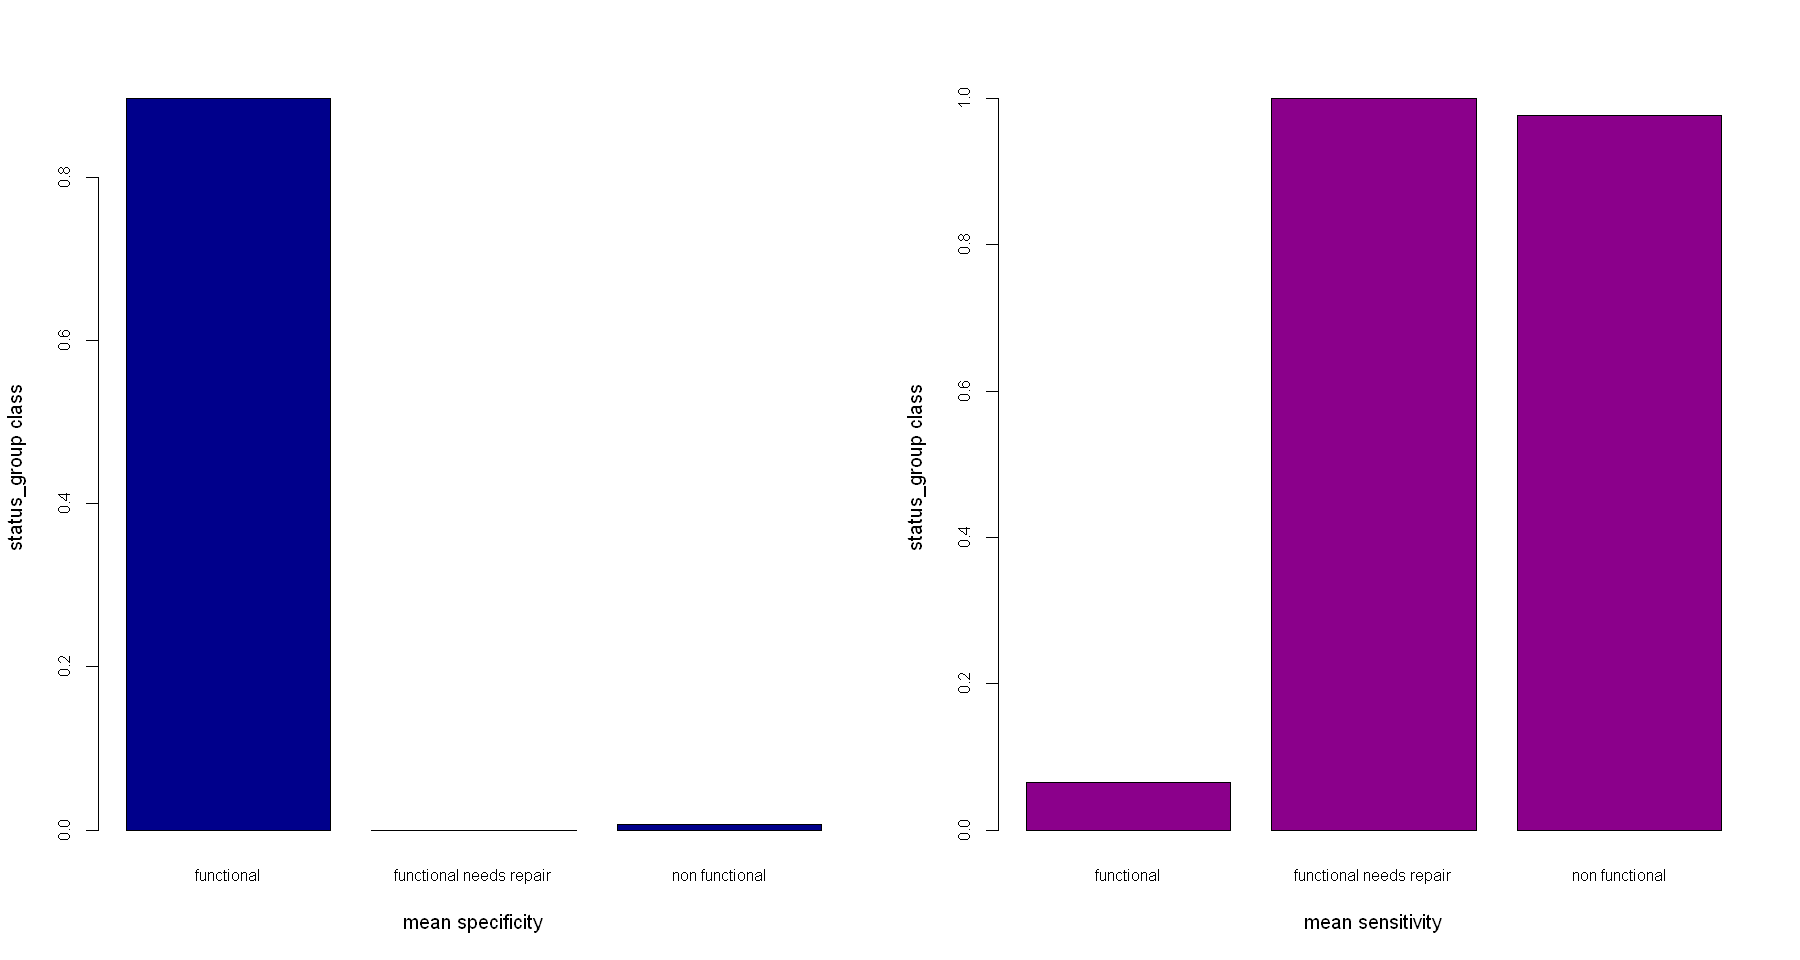

In [59]:
xg_corr_class<-c("functional","functional needs repair","non functional")
xg_corr_mean_sensitivity<-c(xg_corr_mean_sensitivity_fun,xg_corr_mean_sensitivity_repair,xg_corr_mean_sensitivity_nonfun)
xg_corr_mean_specificity<-c(xg_corr_mean_specificity_fun,xg_corr_mean_specificity_repair,xg_corr_mean_specificity_nonfun)
xg_corr_ss<-cbind("class"=xg_corr_class,"mean_specificity"=xg_corr_mean_specificity,"mean_sensitivity"=xg_corr_mean_sensitivity)
write.csv(xg_corr_ss,"dataset/results_dataframes/xg_corr_ss.csv")

xg_corr_ss_df<-read.csv("dataset/results_dataframes/xg_corr_ss.csv")
xg_corr_ss_df
par(mfrow=c(1,2))
barplot(height = xg_corr_ss_df$mean_specificity, names = xg_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = xg_corr_ss_df$mean_sensitivity, names = xg_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

### Building the model

In [43]:
# https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier
xgmodel <- xgboost(data = data_matrix, objective = "multi:softmax", booster = "gbtree",
                 eval_metric = "merror", nrounds = 50, 
                 num_class = 4,eta = .2, max_depth = 14, colsample_bytree = .4)
#merror - multiclass classification error 
# maxdepth - depth of tress normally set to 6, increasing may cause complexity
# multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
#for us its 3?
#ets learning rate eta [default=0.3, alias: learning_rate]
#Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get
# the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
#nrounds num of rounds for boosting 
#evalutaion metrics for validation data
#colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

[1]	train-merror:0.296582 
[2]	train-merror:0.250320 
[3]	train-merror:0.244815 
[4]	train-merror:0.238266 
[5]	train-merror:0.232306 
[6]	train-merror:0.233165 
[7]	train-merror:0.226448 
[8]	train-merror:0.222795 
[9]	train-merror:0.219175 
[10]	train-merror:0.219377 
[11]	train-merror:0.216094 
[12]	train-merror:0.211886 
[13]	train-merror:0.210236 
[14]	train-merror:0.210438 
[15]	train-merror:0.209226 
[16]	train-merror:0.206987 
[17]	train-merror:0.205118 
[18]	train-merror:0.204714 
[19]	train-merror:0.203165 
[20]	train-merror:0.200960 
[21]	train-merror:0.197710 
[22]	train-merror:0.195067 
[23]	train-merror:0.194226 
[24]	train-merror:0.191869 
[25]	train-merror:0.190084 
[26]	train-merror:0.189579 
[27]	train-merror:0.186549 
[28]	train-merror:0.185741 
[29]	train-merror:0.183687 
[30]	train-merror:0.182946 
[31]	train-merror:0.182441 
[32]	train-merror:0.179848 
[33]	train-merror:0.178838 
[34]	train-merror:0.178064 
[35]	train-merror:0.177795 
[36]	train-merror:0.176987 
[

In [44]:
xgpredict<-predict(xgmodel,test_matrix)
xgpredict

[1] 3 1 3 3 1 1 3 3 3 1 1 3 3 1 1 1 2 3 1 3 1 1 3 3 1 1 3 3 1 1 1 3 1 1 1 1
   [37] 1 1 3 3 1 1 3 3 1 3 1 1 1 1 1 1 3 3 3 3 2 3 1 1 1 1 1 3 1 1 1 3 1 1 3 2
   [73] 1 3 3 1 1 1 1 3 1 1 3 1 3 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 3 3 3 1 3 1 1 1
  [109] 1 1 1 3 1 1 1 1 3 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 2 1 2 1 1 1 3 3 3
  [145] 3 1 3 3 3 3 1 1 1 1 3 1 1 3 1 3 1 3 3 3 1 3 3 1 1 1 3 1 1 3 1 2 1 3 1 1
  [181] 3 1 1 1 3 1 1 3 3 1 1 1 2 1 1 1 1 3 2 3 1 3 1 1 3 3 3 1 1 1 1 1 1 3 1 1
  [217] 3 1 3 1 1 3 1 1 3 3 1 1 3 1 3 1 1 3 3 1 2 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 3 3 1 1 1 3 2 1 1 3 3 3 3 1 3 1 3 3 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1
  [325] 3 1 1 3 1 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1
  [361] 1 1 1 3 1 3 1 1 3 1 3 3 3 3 1 3 1 3 2 1 1 1 1 3 1 1 1 1 3 1 3 1 1 1 1 3
  [397] 1 1 1 1 1 3 1 1 1 3 1 1 1 3 1 1 3 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3
  [433] 1 1 3 1 1 3 1 1 1 3 1 3 1 1 3 3 3 1 3 3 3 1 1 3 1 3 1 1 1 3 1 1 3 1 1 3
  [469] 3 3 3 1 3 1 3 1 3 1 1 3 1 1 3 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 3 3 1 3 3 1
  [505] 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 1 1 3 1 3 3 1 2 3 3 1 1 1
  [541] 3 1 3 3 3 3 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 3 1 1 3 1 2 3 3 3 1 1 3 1 3 1
  [577] 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 1
  [613] 1 1 3 1 3 1 1 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 3
  [649] 1 3 1 1 1 3 3 1 3 3 1 1 1 3 3 1 1 1 1 1 3 1 1 1 2 3 1 1 1 1 1 1 3 3 3 1
  [685] 3 1 3 3 1 1 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 3 1 3 3 3 3
  [721] 3 3 1 1 1 1 1 1 3 1 1 1 1 3 2 3 1 1 3 2 3 1 2 1 3 1 3 3 3 1 1 1 1 1 1 3
  [757] 1 1 3 3 1 3 1 3 3 1 1 1 1 3 1 1 1 3 2 3 3 3 1 1 1 3 3 1 1 1 1 1 1 3 1 1
  [793] 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 3 3 1 1 3 1 1 3 1 1 1 1 3
  [829] 1 3 1 3 1 3 3 1 3 1 1 1 1 1 3 3 1 1 1 3 3 1 3 1 1 1 1 3 3 3 3 1 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 3 1 3 1 3 1 3 3 1 3 3 1 1 1 1 1 1
  [901] 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 3 3 1 1 3 3 3 1 3 1 3 1 3 1 3 3 1 1
  [937] 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 3 3 1 3 1 1 1 3 1
  [973] 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 3 3 1 1 1 1
 [1009] 3 1 1 1 1 1 2 3 1 3 1 3 3 1 1 3 1 1 3 1 1 1 1 1 3 1 1 3 1 2 1 1 1 1 1 3
 [1045] 3 1 1 3 3 1 1 3 3 3 3 1 3 1 1 3 1 3 1 1 1 3 1 3 3 3 1 3 1 1 1 3 3 3 3 3
 [1081] 1 3 3 1 1 1 1 1 1 2 1 1 3 3 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 3 1 1 3 1 1 1
 [1117] 3 1 1 3 1 1 1 1 1 3 1 3 3 1 1 1 3 3 1 1 3 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1
 [1153] 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 3 1 1 3 3 3 1 1 3 1 3 3 1 3 1 3
 [1189] 1 3 3 1 1 1 3 1 3 1 1 3 1 3 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1
 [1225] 1 1 3 3 1 1 1 1 3 1 3 1 1 2 3 3 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 1 3 1 1 1
 [1261] 1 3 2 1 3 3 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 3 1 3 1 1 1 1 1 1 3 1 1 1 3 3
 [1297] 3 1 1 3 2 1 3 1 1 3 3 1 1 1 3 3 3 1 1 1 1 3 1 3 1 3 3 1 1 1 3 1 3 1 3 3
 [1333] 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 3 1 3 3 3 1 1 3 1 1 3 3 3 3 1 1 1 3 3 1
 [1369] 1 1 1 1 3 1 1 1 1 3 1 3 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 3 1 3 3
 [1405] 1 2 1 1 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 3 1 3 1 1 1 2 3 3 1 1 3 1 1 3
 [1441] 3 3 1 1 1 1 3 1 1 1 3 1 1 1 3 3 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1
 [1477] 3 1 3 1 1 1 1 3 1 3 1 1 1 3 3 1 3 1 3 1 1 1 3 1 3 1 3 3 3 3 3 1 1 3 1 1
 [1513] 1 3 1 1 2 1 3 1 1 1 3 1 1 3 2 1 3 1 3 3 3 1 1 3 3 1 1 3 1 3 1 2 1 1 1 1
 [1549] 1 3 3 1 3 1 1 3 1 1 1 3 3 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 1 3 1 1 1 1 3
 [1585] 3 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 3 3 1 3 1 3 1 1 3 3 3 1 1 3 1 1
 [1621] 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 1 3 1 1 1 3 3 1 1 3 1 1 1 1
 [1657] 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 1 3 1 1 1 1
 [1693] 1 1 1 3 3 1 1 3 3 1 3 1 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 1 3 3 1
 [1729] 1 1 1 3 1 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 3 3 1 1 1 1 1 1 3
 [1765] 3 3 1 1 1 1 1 3 1 1 1 1 1 3 2 1 1 1 3 1 1 3 1 3 1 3 1 1 3 1 1 1 1 1 3 1
 [18

In [45]:
# decode the numerical status_group to factors
# xgboost coded it to numerical values like this:
# 'non functional'->3, 'functional needs repair'->2, 'functional'->1
xgpredict[xgpredict==1]<-"functional"
xgpredict[xgpredict==2]<-"functional needs repair"
xgpredict[xgpredict==3]<-"non functional"

In [46]:
head(xgpredict)

[1] "non functional" "functional"     "non functional" "non functional"
[5] "functional"     "functional"

In [47]:
# binding the predicted status group with id
xpred1<-cbind("id"=corr_test1$id,"status_group"=xgpredict)
# xpred1
write.csv(xpred1,"dataset/xgb_corr1.csv")

# score: 0.7769

## XGboost + mRMR

Used the data from the mRMR feature selection

In [48]:
# Adding a dummy status group with default value zero
mRMR_test1<-mRMR_test
mRMR_test1$status_group<-0
dim(mRMR_test1)
# corr_test1

[1] 14850    53

In [49]:
# mRMR_train_index <- sample(1:nrow(mRMR_test_merge), nrow(mRMR_test_merge)*1)

# converting train data to Dmatrix
mRMR_data_variables <- as.matrix(mRMR_X[,-1])
mRMR_data_label <- mRMR_Y
mRMR_data_matrix <- xgb.DMatrix(data = as.matrix(mRMR_X[,-1]), label = mRMR_data_label)

# # # split train data and make xgb.DMatrix
# mRMR_train_data   <- data_variables[mRMR_train_index,]
# mRMR_train_label  <- data_label[mRMR_train_index]
# mRMR_train_matrix <- xgb.DMatrix(data = mRMR_train_data, label = mRMR_train_label)

# converting test data to Dmatrix
mRMR_test_data  <- as.matrix(mRMR_test1[,-c(1,2,53)]) #eliminating columns "X","id" and "status_group"
mRMR_test_label <- corr_test1[,"status_group"]
mRMR_test_matrix <- xgb.DMatrix(data = mRMR_test_data, label = mRMR_test_label)

### Calculating the misclassification rate

In [50]:
# XGboost mRMR model misclassification rate calculation
CV_folds <- 10

size_CV <-floor(mNr/CV_folds)

CV_err<-numeric(CV_folds)
accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-mRMR_X[idx_ts,]  
     Y_ts<-mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:mNr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-mRMR_X[idx_tr,]
     Y_tr<-mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
     DS_matrix<-xgb.DMatrix(data = as.matrix(X_tr), label = Y_tr)
     cv_test_matrix<-xgb.DMatrix(data = as.matrix(X_ts), label = Y_ts)

    options(warn=-1)
     # Model fit (using rpart function)
     mRMR_xg_model<- xgboost(data = DS_matrix, objective = "multi:softmax", booster = "gbtree",
                 eval_metric = "merror", nrounds = 50, 
                 num_class = 4,eta = .2, max_depth = 14, colsample_bytree = .4)
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_xg_model,cv_test_matrix)
     
     # Cross validation error = Mean Squared Error
    #  CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
    #  CV_err[i]<-mean((unlist(Y_hat_ts)-Y_ts)^2)

    # confusion matrix
    mRMR_xg_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_xg_cm)
    # print(n_r)

    ## calculate the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+mRMR_xg_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_xg_cm)
    missclassification_rate_xg_mRMR <- 1-accuracy_vec[i]

    print(paste("Fold",i,"misclassification rate:",missclassification_rate_xg_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

xg_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
xg_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", xg_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", xg_mRMR_mean_misclass))

xg_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
xg_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",xg_mRMR_mean_specificity_fun,"\nmean sensitivity:",xg_mRMR_mean_sensitivity_fun))

xg_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
xg_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",xg_mRMR_mean_specificity_repair,"\nmean sensitivity:",xg_mRMR_mean_sensitivity_repair))

xg_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
xg_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",xg_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",xg_mRMR_mean_sensitivity_nonfun))

options(warn=1)

[1]	train-merror:0.241526 
[2]	train-merror:0.218799 
[3]	train-merror:0.209241 
[4]	train-merror:0.206865 
[5]	train-merror:0.203068 
[6]	train-merror:0.205462 
[7]	train-merror:0.204190 
[8]	train-merror:0.202189 
[9]	train-merror:0.195305 
[10]	train-merror:0.193528 
[11]	train-merror:0.193172 
[12]	train-merror:0.193210 
[13]	train-merror:0.190516 
[14]	train-merror:0.185728 
[15]	train-merror:0.183913 
[16]	train-merror:0.178376 
[17]	train-merror:0.174486 
[18]	train-merror:0.169622 
[19]	train-merror:0.165526 
[20]	train-merror:0.162177 
[21]	train-merror:0.160400 
[22]	train-merror:0.158698 
[23]	train-merror:0.156360 
[24]	train-merror:0.153891 
[25]	train-merror:0.151216 
[26]	train-merror:0.149420 
[27]	train-merror:0.147026 
[28]	train-merror:0.143921 
[29]	train-merror:0.143434 
[30]	train-merror:0.142293 
[31]	train-merror:0.140142 
[32]	train-merror:0.138664 
[33]	train-merror:0.137710 
[34]	train-merror:0.134549 
[35]	train-merror:0.131238 
[36]	train-merror:0.129443 
[


Mean accuracy : 0.7675
Mean misclassification rate : 0.2325
[Functional]
mean specificity: 0.8987 
mean sensitivity: 0.0704
[Functional needs repair]
mean specificity: 0 
mean sensitivity: 1
[Non functional]
mean specificity: 0.0065 
mean sensitivity: 0.9731

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.8987,0.0704
2,functional needs repair,0.0000,1.0000
3,non functional,0.0065,0.9731


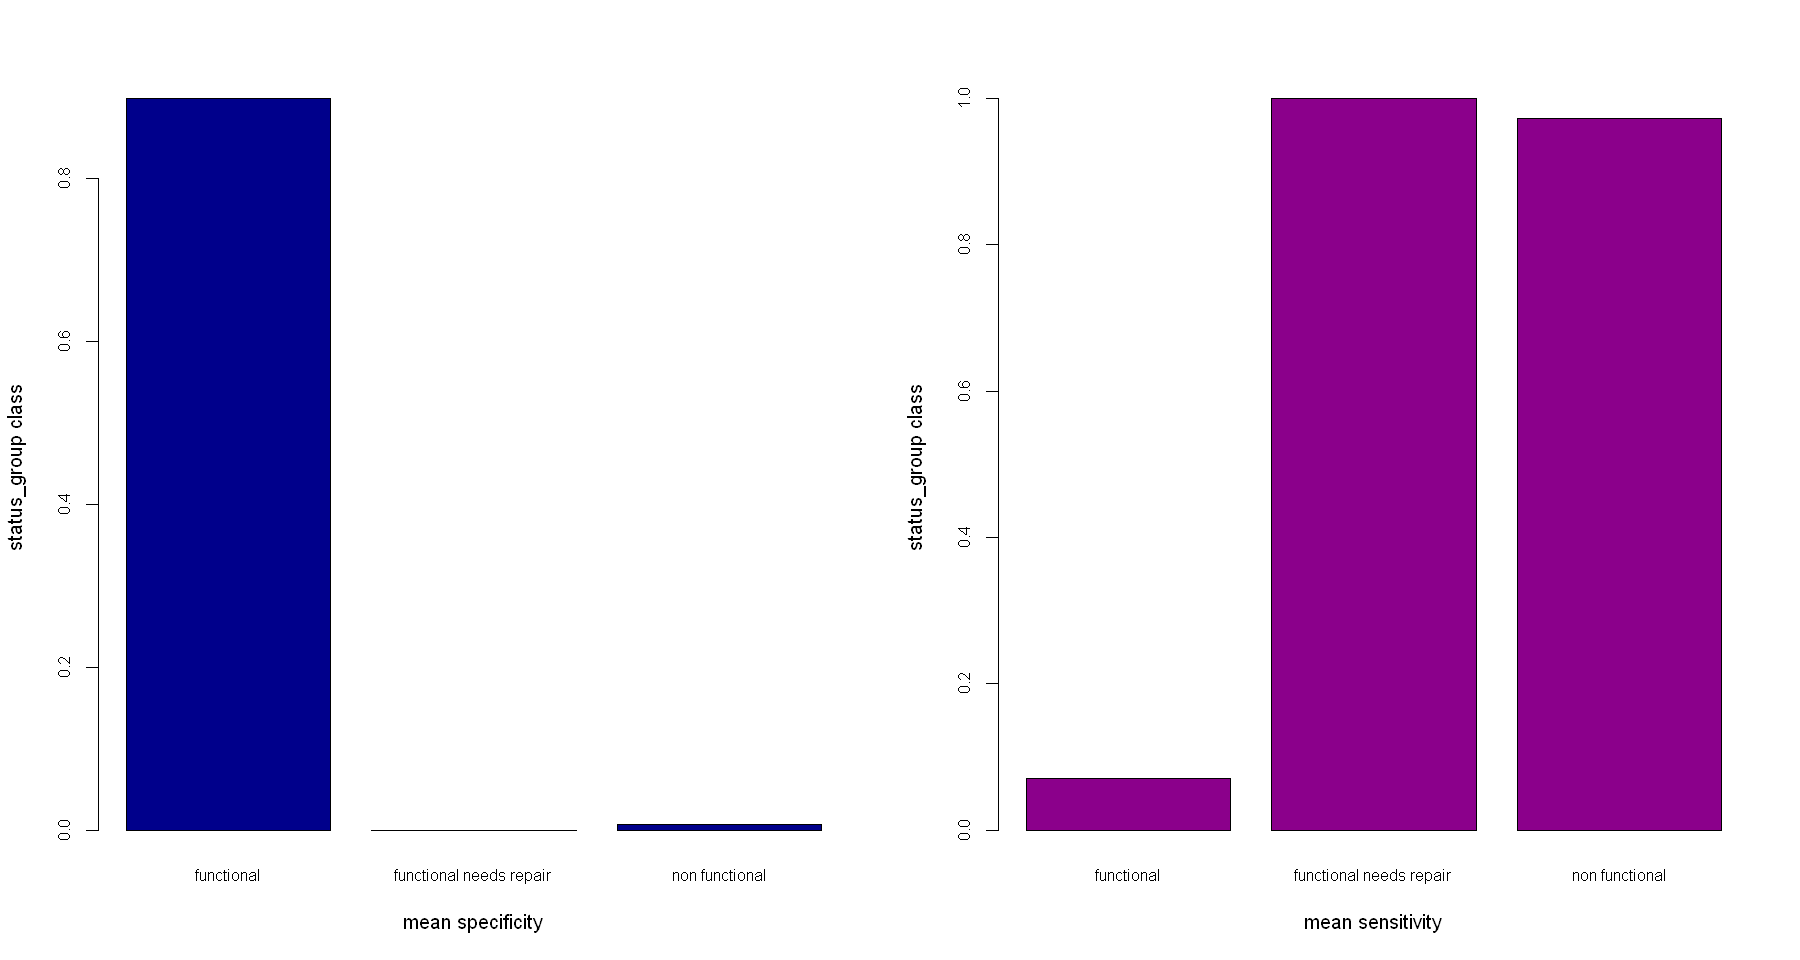

In [60]:
xg_mRMR_class<-c("functional","functional needs repair","non functional")
xg_mRMR_mean_sensitivity<-c(xg_mRMR_mean_sensitivity_fun,xg_mRMR_mean_sensitivity_repair,xg_mRMR_mean_sensitivity_nonfun)
xg_mRMR_mean_specificity<-c(xg_mRMR_mean_specificity_fun,xg_mRMR_mean_specificity_repair,xg_mRMR_mean_specificity_nonfun)
xg_mRMR_ss<-cbind("class"=xg_mRMR_class,"mean_specificity"=xg_mRMR_mean_specificity,"mean_sensitivity"=xg_mRMR_mean_sensitivity)
write.csv(xg_mRMR_ss,"dataset/results_dataframes/xg_mRMR_ss.csv")

xg_mRMR_ss_df<-read.csv("dataset/results_dataframes/xg_mRMR_ss.csv")
xg_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = xg_mRMR_ss_df$mean_specificity, names = xg_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = xg_mRMR_ss_df$mean_sensitivity, names = xg_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

### Building the model

In [51]:
mRMR_xgmodel <- xgboost(data = mRMR_data_matrix, objective = "multi:softmax", booster = "gbtree",
                 eval_metric = "merror", nrounds = 50, 
                 num_class = 4,eta = .2, max_depth = 14, colsample_bytree = .4)

[1]	train-merror:0.246970 
[2]	train-merror:0.223384 
[3]	train-merror:0.224293 
[4]	train-merror:0.229091 
[5]	train-merror:0.230724 
[6]	train-merror:0.227306 
[7]	train-merror:0.226515 
[8]	train-merror:0.222778 
[9]	train-merror:0.221145 
[10]	train-merror:0.216128 
[11]	train-merror:0.209226 
[12]	train-merror:0.209394 
[13]	train-merror:0.207407 
[14]	train-merror:0.206279 
[15]	train-merror:0.202222 
[16]	train-merror:0.202071 
[17]	train-merror:0.201498 
[18]	train-merror:0.199259 
[19]	train-merror:0.196498 
[20]	train-merror:0.192795 
[21]	train-merror:0.192576 
[22]	train-merror:0.192054 
[23]	train-merror:0.189646 
[24]	train-merror:0.188316 
[25]	train-merror:0.184966 
[26]	train-merror:0.183973 
[27]	train-merror:0.182811 
[28]	train-merror:0.182559 
[29]	train-merror:0.181313 
[30]	train-merror:0.181027 
[31]	train-merror:0.179865 
[32]	train-merror:0.179512 
[33]	train-merror:0.179259 
[34]	train-merror:0.177508 
[35]	train-merror:0.175690 
[36]	train-merror:0.174461 
[

In [52]:
mRMR_xgpredict<-predict(mRMR_xgmodel,mRMR_test_matrix)
head(mRMR_xgpredict)

[1] 3 1 1 3 1 1

In [53]:
# decode the numerical status_group to factors
# xgboost coded it to numerical values like this:
# 'non functional'->3, 'functional needs repair'->2, 'functional'->1
mRMR_xgpredict[mRMR_xgpredict==1]<-"functional"
mRMR_xgpredict[mRMR_xgpredict==2]<-"functional needs repair"
mRMR_xgpredict[mRMR_xgpredict==3]<-"non functional"

In [54]:
head(mRMR_xgpredict)

[1] "non functional" "functional"     "functional"     "non functional"
[5] "functional"     "functional"

In [55]:
# binding the predicted status group with id
mRMR_xpred1<-cbind("id"=mRMR_test1$id,"status_group"=mRMR_xgpredict)
head(mRMR_xpred1)
write.csv(mRMR_xpred1,"dataset/xgb_mRMR1.csv")

# score: 0.7769

id,status_group
50785,non functional
51630,functional
17168,functional
...,...
49871,functional
52449,functional



# Crossvalidating the models

When comparing the results, we observe that our best model in the end was XGboost, closely followed by Random Forest.

The feature selection technique in use didn't affect the results a lot, but overall mRMR seemed to yield very slightly better results than correlation when the models were applied to the test set.

The support vector machine and neural network both had quite bad mean cross-validated accuracy, but did score better than expected on the submissions. On the other hand, the decision tree had a better cross-validated mean accuracy but performed worse on the test set.

<img src="pictures/accuracy_comparison.png">

# Models: Using over-sampling

We observed right away that the dataset was very imbalanced. Since the beginning of the project, we were planning to address this issue eventually and observe how it would impact the resulting accuracy of our models.

We were thinking about what would be the use of this competition: supposedly the models should be able to detect the pumps that were faulty accurately, as this would be very useful information for the government of Tanzania. 

Because the dataset contains mostly functional pumps, the accuracy we obtain after subbmitting our results to the competition will be heavily influenced by how well our model classifies functional pumps, and lesser so by how well it classifies the other two classes. This has been shown by the bar plots after each crossvalidation of our models, the class "functional needs repair" is repeatedly not classified very accurately, and the same goes for the class "non functional", although less dramatically than the other.

This is why we wanted to try to classifiy these two other classes better, while not giving up too much accuracy as a result. Dropping in accuracy was expected when doing over-sampling, but we didn't expect it to drop so much. Due to these bad results, and also due to the fact that increasing the dataset size via over-sampling would also increase the execution time of all our models (that already for some of them have lengthy execution times), we decided to limit this experiment ton only the decision tree using both techniques of feature selection.

We do not think this gives good enough results to be included in our pipeline, but still wished to add it to our notebook as we thought it was an interesting technique to try nonetheless.

In [67]:
table(corr_data_merge$status_group)

'%ni%' <- Negate('%in%')
corr_data_merge_upsampled <- upSample(x = corr_data_merge[,colnames(corr_data_merge) %ni% "status_group"],
                                    y = corr_data_merge$status_group,
                                    yname = "status_group")

# Shuffling all the rows after upsampling the data
set.seed(132)
rows <- sample(nrow(corr_data_merge_upsampled))
corr_data_merge_upsampled <- corr_data_merge_upsampled[rows, ]

table(corr_data_merge_upsampled$status_group)

# Splitting the dataset into the features (up_corr_X) and target variable (up_corr_Y)
status_group_idx<-grep("status_group", colnames(corr_data_merge_upsampled))
up_corr_X<-as.data.frame(corr_data_merge_upsampled[,-status_group_idx])

up_corr_Y<-corr_data_merge_upsampled[,"status_group"] ### target variable

up_corr_Nr<-nrow(up_corr_X) #N
up_corr_Nc<-ncol(up_corr_X) #n


             functional functional needs repair          non functional 
                  32259                    4317                   22824 


             functional functional needs repair          non functional 
                  32259                   32259                   32259 

In [80]:
table(mRMR_data_merge$status_group)

'%ni%' <- Negate('%in%')
mRMR_data_merge_upsampled <- upSample(x = mRMR_data_merge[,colnames(mRMR_data_merge) %ni% "status_group"],
                                    y = mRMR_data_merge$status_group,
                                    yname = "status_group")

# Shuffling all the rows after upsampling the data
set.seed(132)
rows <- sample(nrow(mRMR_data_merge_upsampled))
mRMR_data_merge_upsampled <- mRMR_data_merge_upsampled[rows, ]

table(mRMR_data_merge_upsampled$status_group)

# Splitting the dataset into the features (up_mRMR_X) and target variable (up_mRMR_Y)
status_group_idx<-grep("status_group", colnames(mRMR_data_merge_upsampled))
up_mRMR_X<-as.data.frame(mRMR_data_merge_upsampled[,-status_group_idx])

up_mRMR_Y<-mRMR_data_merge_upsampled[,"status_group"] ### target variable

up_mRMR_Nr<-nrow(up_mRMR_X) #N
up_mRMR_Nc<-ncol(up_mRMR_X) #n


             functional functional needs repair          non functional 
                  32259                    4317                   22824 


             functional functional needs repair          non functional 
                  32259                   32259                   32259 

The dataset oversamples correctly the two last classes to contain as many observations as "functional"

## Decision tree + correlation + upsampling

In [81]:
# decision Tree correlation model Misclassification rate
CV_folds <- 10

size_CV <-floor(up_corr_Nr/CV_folds)

CV_err<-numeric(CV_folds)

accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set for the i-th fold
     X_ts<-up_corr_X[idx_ts,]  
     Y_ts<-up_corr_Y[idx_ts]  
     
     idx_tr<-setdiff(1:up_corr_Nr,idx_ts) ### idx_tr represents the indices of the training set for the i-th fold
     X_tr<-up_corr_X[idx_tr,]
     Y_tr<-up_corr_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using rpart function)
     corr_up_dt_model<- rpart(status_group~.,DS,method = 'class',control = rpart.control(cp = 0.002))
     
     # Model prediction 
     Y_hat_ts<- predict(corr_up_dt_model,X_ts, type='class')
     
     # Cross validation error = Mean Squared Error
    #  CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
    #  CV_err[i]<-mean((unlist(Y_hat_ts)-Y_ts)^2)

    # confusion matrix
    corr_up_dt_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(corr_up_dt_cm)
    # print(n_r)

    # compute the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+corr_up_dt_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(corr_up_dt_cm)
    missclassification_rate_up_dt_corr <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_up_dt_corr))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

up_dt_corr_mean_accuracy = round(mean(accuracy_vec), digits=4)
up_dt_corr_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", up_dt_corr_mean_accuracy))
cat(paste("\nMean misclassification rate :", up_dt_corr_mean_misclass))

up_dt_corr_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
up_dt_corr_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",up_dt_corr_mean_specificity_fun,"\nmean sensitivity:",up_dt_corr_mean_sensitivity_fun))

up_dt_corr_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
up_dt_corr_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",up_dt_corr_mean_specificity_repair,"\nmean sensitivity:",up_dt_corr_mean_sensitivity_repair))

up_dt_corr_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
up_dt_corr_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",up_dt_corr_mean_specificity_nonfun,"\nmean sensitivity:",up_dt_corr_mean_sensitivity_nonfun))

options(warn=1)

[1] "Fold 1 misclassification rate: 0.403224139712721"
[1] "Fold 2 misclassification rate: 0.379869794357755"
[1] "Fold 3 misclassification rate: 0.395370466053529"
[1] "Fold 4 misclassification rate: 0.39619716854397"
[1] "Fold 5 misclassification rate: 0.401364059109228"
[1] "Fold 6 misclassification rate: 0.394647101374393"
[1] "Fold 7 misclassification rate: 0.395887155110055"
[1] "Fold 8 misclassification rate: 0.393717061072646"
[1] "Fold 9 misclassification rate: 0.382453239640384"
[1] "Fold 10 misclassification rate: 0.391030277978712"

Mean accuracy : 0.6066
Mean misclassification rate : 0.3934
[Functional]
mean specificity: 0.6275 
mean sensitivity: 0.7308
[Functional needs repair]
mean specificity: 0.684 
mean sensitivity: 0.7327
[Non functional]
mean specificity: 0.5086 
mean sensitivity: 0.9464

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.6275,0.7308
2,functional needs repair,0.6840,0.7327
3,non functional,0.5086,0.9464


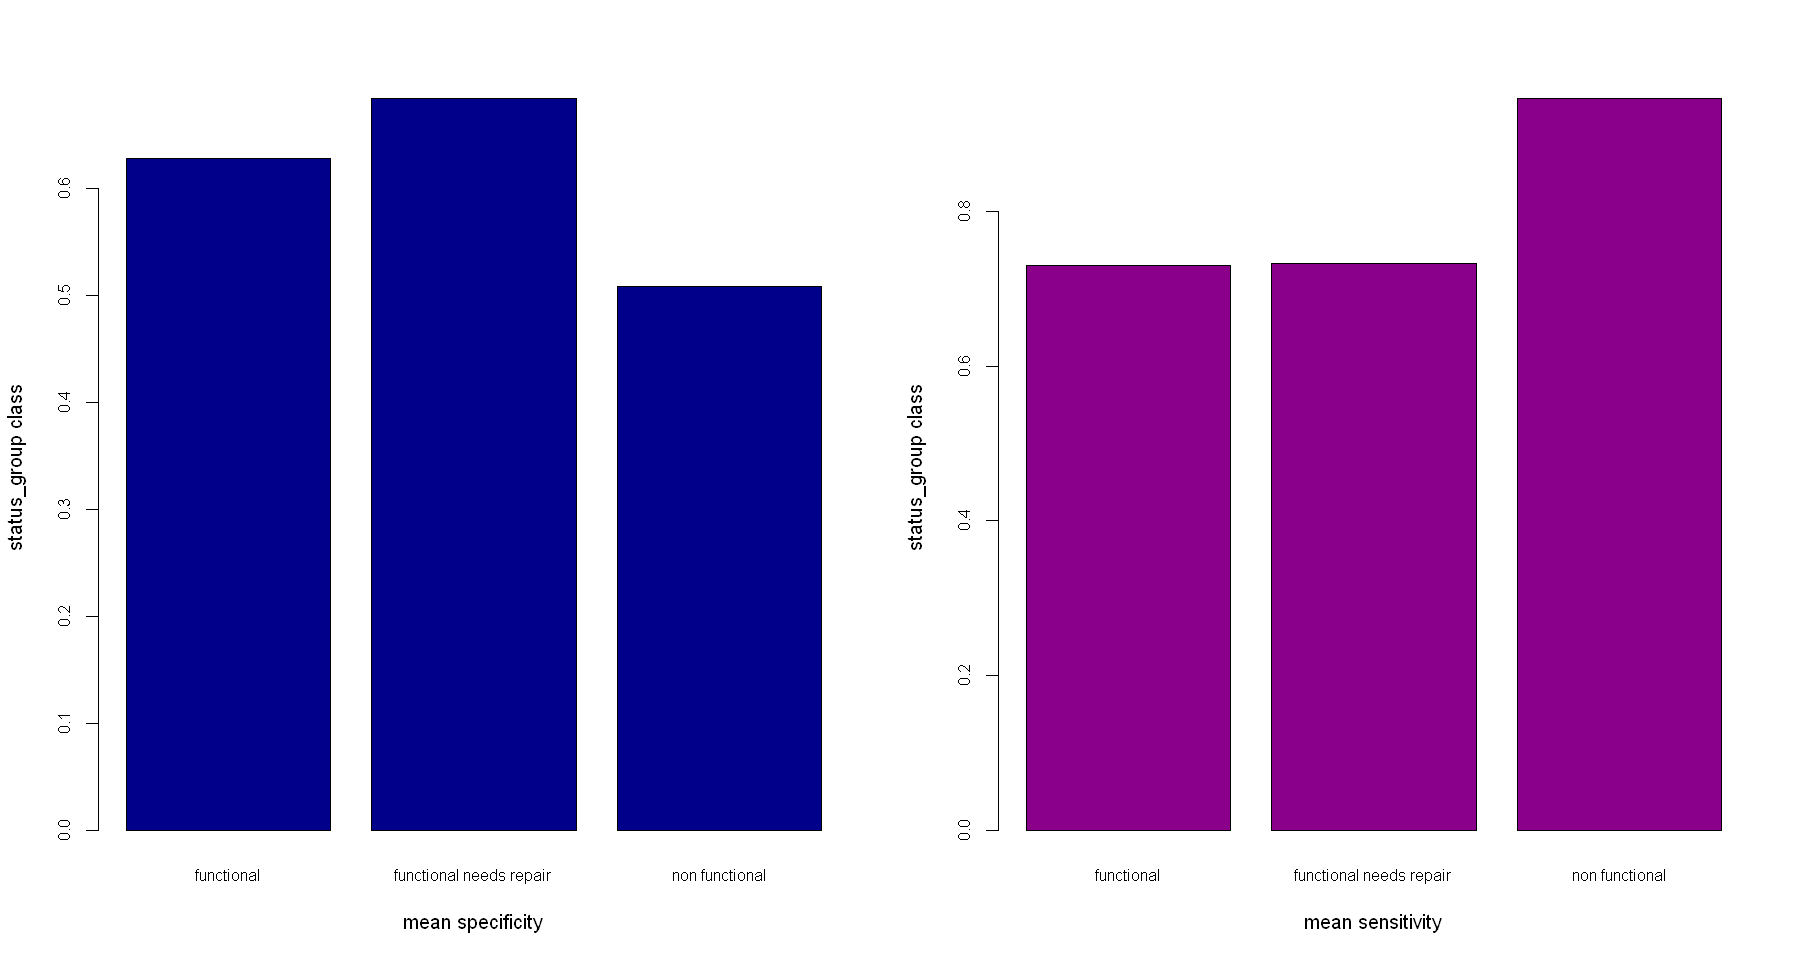

In [82]:
up_dt_corr_class<-c("functional","functional needs repair","non functional")
up_dt_corr_mean_sensitivity<-c(up_dt_corr_mean_sensitivity_fun,up_dt_corr_mean_sensitivity_repair,up_dt_corr_mean_sensitivity_nonfun)
up_dt_corr_mean_specificity<-c(up_dt_corr_mean_specificity_fun,up_dt_corr_mean_specificity_repair,up_dt_corr_mean_specificity_nonfun)
up_dt_corr_ss<-cbind("class"=up_dt_corr_class,"mean_specificity"=up_dt_corr_mean_specificity,"mean_sensitivity"=up_dt_corr_mean_sensitivity)
write.csv(up_dt_corr_ss,"dataset/results_dataframes/up_dt_corr_ss.csv")

up_dt_corr_ss_df<-read.csv("dataset/results_dataframes/up_dt_corr_ss.csv")
up_dt_corr_ss_df
par(mfrow=c(1,2))
barplot(height = up_dt_corr_ss_df$mean_specificity, names = up_dt_corr_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = up_dt_corr_ss_df$mean_sensitivity, names = up_dt_corr_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

We can here observe that the mean specificity has increased a lot. However, the mean accuracy of the model has dropped by around 10%, which is a problem that cannot be easily overlooked. The same happens with the mRMR version down below.

In [68]:
# Building model using entire training dataset

up_corr_model_dt_train<-rpart(status_group ~ . ,data = corr_data_merge_upsampled[,-1],method = 'class',control = rpart.control(cp = 0.002))

In [69]:
# predicting using the model created using the entire training dataset

up_corr_dt <- predict(up_corr_model_dt_train, corr_test[-1], type='class')

In [71]:
# saving the results to file

up_corr_dt1<-cbind(corr_test$id,data.frame(up_corr_dt))
colnames(up_corr_dt1)[1]<-"id"
colnames(up_corr_dt1)[2]<-"status_group"
up_corr_dt1
write.csv(up_corr_dt1,"dataset/upsampled/test_up_corr_dt1.csv")

,id,status_group
,<int>,<fct>
1,50785,non functional
2,51630,functional
3,17168,non functional
...,...,...
14849,33492,functional needs repair
14850,68707,non functional


## Decision tree + mRMR + upsampling: model only

In [83]:
# decision Tree mRMRelation model Misclassification rate
CV_folds <- 10

size_CV <-floor(up_mRMR_Nr/CV_folds)

CV_err<-numeric(CV_folds)

accuracy_vec<-numeric(CV_folds)

specificity_vec_fun<-numeric(CV_folds)
sensitivity_vec_fun<-numeric(CV_folds)

specificity_vec_repair<-numeric(CV_folds)
sensitivity_vec_repair<-numeric(CV_folds)

specificity_vec_nonfun<-numeric(CV_folds)
sensitivity_vec_nonfun<-numeric(CV_folds)

for (i in 1:CV_folds) {
     set.seed(123)
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set for the i-th fold
     X_ts<-up_mRMR_X[idx_ts,]  
     Y_ts<-up_mRMR_Y[idx_ts]  
     
     idx_tr<-setdiff(1:up_mRMR_Nr,idx_ts) ### idx_tr represents the indices of the training set for the i-th fold
     X_tr<-up_mRMR_X[idx_tr,]
     Y_tr<-up_mRMR_Y[idx_tr]                          
     
     DS<-cbind(X_tr,status_group=Y_tr)
    
    options(warn=-1)
     # Model fit (using rpart function)
     mRMR_up_dt_model<- rpart(status_group~.,DS,method = 'class',control = rpart.control(cp = 0.002))
     
     # Model prediction 
     Y_hat_ts<- predict(mRMR_up_dt_model,X_ts, type='class')
     
     # Cross validation error = Mean Squared Error
    #  CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
    #  CV_err[i]<-mean((unlist(Y_hat_ts)-Y_ts)^2)

    # confusion matrix
    mRMR_up_dt_cm<-confusionMatrix(Y_hat_ts,Y_ts)
    n_r<-nrow(mRMR_up_dt_cm)
    # print(n_r)

    # compute the accuracy
    accuracy_vec[i]<-0
    for (nn in 1:n_r){
      accuracy_vec[i] <- (accuracy_vec[i]+mRMR_up_dt_cm[nn,nn])
    }
    accuracy_vec[i]<- accuracy_vec[i]/sum(mRMR_up_dt_cm)
    missclassification_rate_up_dt_mRMR <- 1-accuracy_vec[i]
    
    print(paste("Fold",i,"misclassification rate:",missclassification_rate_up_dt_mRMR))
    
    sens_spec<-compute_sensitivity_specificity(Y_ts, Y_hat_ts)
    
    specificity_vec_fun[i]<-sens_spec$sensitivity_functional
    sensitivity_vec_fun[i]<-sens_spec$specificity_functional

    specificity_vec_repair[i]<-sens_spec$sensitivity_needsrepair
    sensitivity_vec_repair[i]<-sens_spec$specificity_needsrepair

    specificity_vec_nonfun[i]<-sens_spec$sensitivity_nonfunctional
    sensitivity_vec_nonfun[i]<-sens_spec$specificity_nonfunctional
}

up_dt_mRMR_mean_accuracy = round(mean(accuracy_vec), digits=4)
up_dt_mRMR_mean_misclass = round(1-mean(accuracy_vec), digits=4)

cat(paste("\nMean accuracy :", up_dt_mRMR_mean_accuracy))
cat(paste("\nMean misclassification rate :", up_dt_mRMR_mean_misclass))

up_dt_mRMR_mean_specificity_fun<-round(mean(specificity_vec_fun), digits=4)
up_dt_mRMR_mean_sensitivity_fun<-round(mean(sensitivity_vec_fun), digits=4)
cat(paste("\n[Functional]\nmean specificity:",up_dt_mRMR_mean_specificity_fun,"\nmean sensitivity:",up_dt_mRMR_mean_sensitivity_fun))

up_dt_mRMR_mean_specificity_repair<-round(mean(specificity_vec_repair), digits=4)
up_dt_mRMR_mean_sensitivity_repair<-round(mean(sensitivity_vec_repair), digits=4)
cat(paste("\n[Functional needs repair]\nmean specificity:",up_dt_mRMR_mean_specificity_repair,"\nmean sensitivity:",up_dt_mRMR_mean_sensitivity_repair))

up_dt_mRMR_mean_specificity_nonfun<-round(mean(specificity_vec_nonfun), digits=4)
up_dt_mRMR_mean_sensitivity_nonfun<-round(mean(sensitivity_vec_nonfun), digits=4)
cat(paste("\n[Non functional]\nmean specificity:",up_dt_mRMR_mean_specificity_nonfun,"\nmean sensitivity:",up_dt_mRMR_mean_sensitivity_nonfun))

options(warn=1)

[1] "Fold 1 misclassification rate: 0.406634287485791"
[1] "Fold 2 misclassification rate: 0.388033481450863"
[1] "Fold 3 misclassification rate: 0.391133615790018"
[1] "Fold 4 misclassification rate: 0.394853776997003"
[1] "Fold 5 misclassification rate: 0.395060452619614"
[1] "Fold 6 misclassification rate: 0.391133615790018"
[1] "Fold 7 misclassification rate: 0.391650304846543"
[1] "Fold 8 misclassification rate: 0.403637490957942"
[1] "Fold 9 misclassification rate: 0.382453239640384"
[1] "Fold 10 misclassification rate: 0.39258034514829"

Mean accuracy : 0.6063
Mean misclassification rate : 0.3937
[Functional]
mean specificity: 0.603 
mean sensitivity: 0.744
[Functional needs repair]
mean specificity: 0.6685 
mean sensitivity: 0.7454
[Non functional]
mean specificity: 0.5474 
mean sensitivity: 0.92

X,class,mean_specificity,mean_sensitivity
<int>,<chr>,<dbl>,<dbl>
1,functional,0.6030,0.7440
2,functional needs repair,0.6685,0.7454
3,non functional,0.5474,0.9200


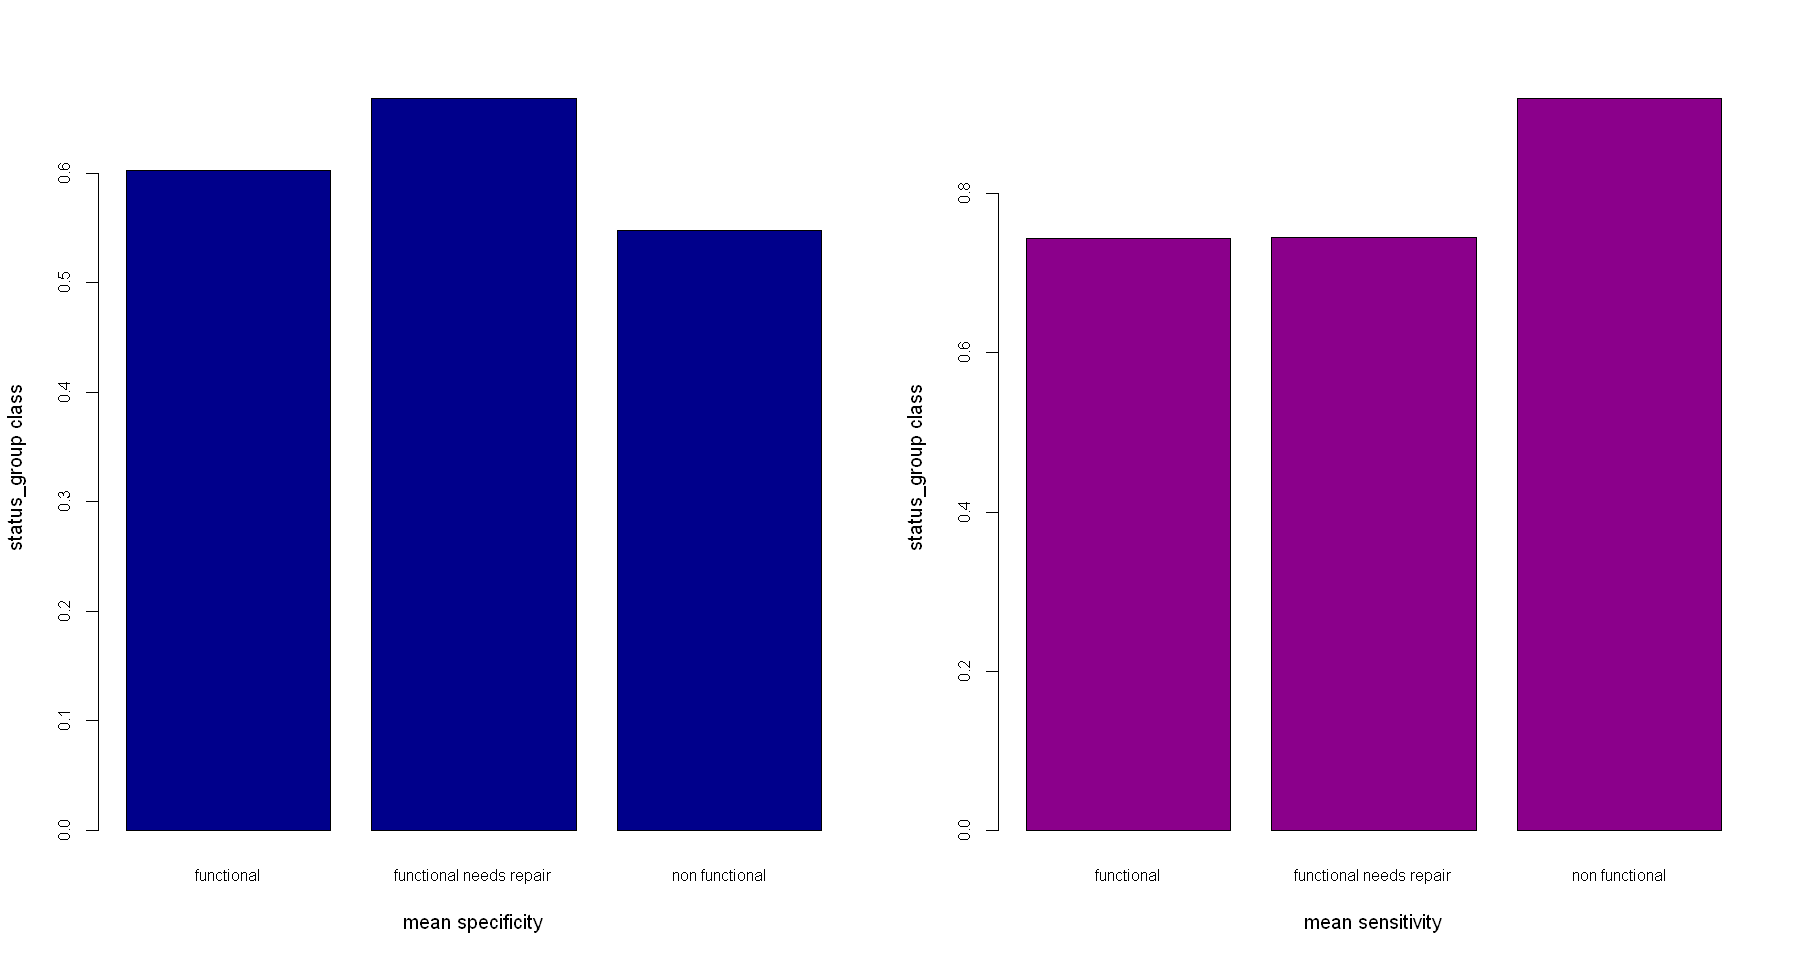

In [84]:
up_dt_mRMR_class<-c("functional","functional needs repair","non functional")
up_dt_mRMR_mean_sensitivity<-c(up_dt_mRMR_mean_sensitivity_fun,up_dt_mRMR_mean_sensitivity_repair,up_dt_mRMR_mean_sensitivity_nonfun)
up_dt_mRMR_mean_specificity<-c(up_dt_mRMR_mean_specificity_fun,up_dt_mRMR_mean_specificity_repair,up_dt_mRMR_mean_specificity_nonfun)
up_dt_mRMR_ss<-cbind("class"=up_dt_mRMR_class,"mean_specificity"=up_dt_mRMR_mean_specificity,"mean_sensitivity"=up_dt_mRMR_mean_sensitivity)
write.csv(up_dt_mRMR_ss,"dataset/results_dataframes/up_dt_mRMR_ss.csv")

up_dt_mRMR_ss_df<-read.csv("dataset/results_dataframes/up_dt_mRMR_ss.csv")
up_dt_mRMR_ss_df
par(mfrow=c(1,2))
barplot(height = up_dt_mRMR_ss_df$mean_specificity, names = up_dt_mRMR_ss_df$class, 
col= "darkblue",cex.names = 0.8,cex.axis = 0.8,
xlab= "mean specificity", ylab ="status_group class")
barplot(height = up_dt_mRMR_ss_df$mean_sensitivity, names = up_dt_mRMR_ss_df$class, 
col="darkmagenta" ,cex.names = 0.8,cex.axis = 0.8, 
xlab= "mean sensitivity", ylab ="status_group class")

In [85]:
# Building model using entire training dataset

up_mRMR_model_dt_train<-rpart(status_group ~ . ,data = mRMR_data_merge_upsampled[,-1],method = 'class',control = rpart.control(cp = 0.002))

# predicting using the model created using the entire training dataset

up_mRMR_dt <- predict(up_mRMR_model_dt_train, mRMR_test[-1], type='class')

In [86]:
# saving the results to file

up_mRMR_dt1<-cbind(mRMR_test$id,data.frame(up_mRMR_dt))
colnames(up_mRMR_dt1)[1]<-"id"
colnames(up_mRMR_dt1)[2]<-"status_group"
up_mRMR_dt1
write.csv(up_mRMR_dt1,"dataset/upsampled/test_up_mRMR_dt1.csv")

,id,status_group
,<int>,<fct>
1,50785,non functional
2,51630,functional
3,17168,non functional
...,...,...
14849,33492,functional needs repair
14850,68707,non functional


# About the project file structure

"Dataset"  contains:
* "Competition_submission" folder
 * Datasets manually prepared for submission (one column generated by jupyter had to be deleted)
* "results_dataframes" folder
 * These contain data about dataframes we use to plot several barplots
* "upsampled" folder
 * "prepared_for_submission" folder
   * Contains the upsampled submission csv files ready to be submitted
 * All upsampled rough submission csv files
* All csv datasets

# Conclusion

* From this project, We were able to learn efficiently about the importance of statistics in machine learning and its concepts. We divided our task decently and worked in parallel. We had our discussions through Microsoft teams calls and Whatsapp groups.


* What could have we done better?
  * We have only did two feature selection techniques, while it was required to use three. 
   * We tried PCA (Principal Compoent Analysis) but the results were underwhelming.
   * We tried Boruta (which should be a good feature selection technique for categorical variables): when we tried on the 40 categorical features (prior to one-hot encoding), Boruta was stating that all the features were important except the "recorded_by" column (which has only one distinct variable).
   * We tried boruta on the one hot encoded dataset and it took a long time to execute. So we thought it's better not to consider it: it seemed to take approximately 40mn/column in the dataset using 160+ one hot encoded features, including the numerical columns.
  * We should have done tuning on hyperparameters on other models than the svm. 
   * It was on our list of things to add, but time constraints coupled with very long execution times did not allow us to pursue this goal.
  * We should have tried to cross-validate the accuracy of the other models on the upsampled dataset, as we are aware than only trying it on the decision tree should not be enough to make an informed statement about its usefulness and impact on the resulting accuracy. 

# Screenshots of submissions

Here are the screenshots taken of our submission results. We did have to use different accounts to submit more tries during the later days, which is why you might see different usernames in some of the screenshots.

<img src="pictures/group1s.png">

<img src="pictures/group2s.png">

<img src="pictures/group3s.png">

<img src="pictures/group4s.png">

<img src="pictures/group5s.png">